# Tutorial 1 - Introduction to Constraint Programming
## In other words, get ready to have your mind blown.. 


## Introduction & Context


Constraint Programming is a rich declarative approach to solve combinatorial problems. This approach has been used to solve diverse real word applications such as scheduling, timetabling, planning, routing, supply chain, clustreing, data mining, classification, etc. See for instance https://www.a4cp.org/node/1281.

    
Constraint programming can be used to solve decision or optimisation problems. In both families, a problem must be stated as : 
- A set of variables (the unkown of the problem). Each variable $x$ is associated to a set of values $D(x)$ that is called to domain of $x$. The latter represents the possible values that $x$ can take. We will be using mostly integer finite variables. That is, a type of variables whose domain is a finite subset of  $\mathbb{Z}$
- A set of constraints. Each constraint restrics the possible combinantion of values allowed by the different varialbes in the scope of the constraint. For instance, the constraint $x<y$ restrics the value assigned to x to be less than the value assigned to y

A constraint can be seen as a (sub-)problem itself. In that sence, a problem can be defined as a conjunction of smaller problems. 


In a decision problem, for each variable $x$, the task is to assign a value from $\cal D(x)$ to $x$ such that every constraint is satisfied. In an opptimisation problem, the purpose is exactly the same, however, among all the possible solutions, we look for one that minimises or maximizes an objective function. 

We will be working on both decision and optimition problems. Throughout these tutorials, we focus on the modelling aspect of constraint programming along with a solid understanding of what is happening within a solver. 


We find many constraint solvers in the literature that are developped by both acamemics (for instance http://www.choco-solver.org/, miniCP http://www.minicp.org/, and GeCode https://www.gecode.org/) and industrials (for instance Google OR Tools https://developers.google.com/optimization and IBM ILOG CPLEX CP Optimizer https://www.ibm.com/products/ilog-cplex-optimization-studio). 

For an up-to-date list of solvers, you can have a look at the following two annual solver competitions: 
- Minizinc Challenge https://www.minizinc.org/challenge.html : the list of solvers can be found here https://www.minizinc.org/challenge2019/results2019.html
- http://xcsp.org/competition some  solvers can be found here http://www.cril.univ-artois.fr/XCSP19/results/results.php?idev=99 



## CpOptimizer


In these tutorials, we will be using [IBM ILOG CPLEX CP Optimizer](https://www.ibm.com/analytics/cplex-cp-optimizer). This tool is an industrial constraint programming solver developped by IBM (previously [ILOG](https://en.wikipedia.org/wiki/ILOG)). The solver supports many programming languages and plateforms. We will be using a python interface called docplex. 


### `docplex` - A python interface to CpOptimizer

`docplex` is a python package that can be used to solve constraint programming problems in python using either:

- a local installation of CpOptimizer;
- a cloud version of CpOptimizer (requires an account and credentials from IBM).

While being less versatile than the C++ interface of CpOptimizer, it is much easier and much more convenient to use.

Throughout the different tutorials, you are required to consult regularly the documentation [`docplex` constraint programming documentation](http://ibmdecisionoptimization.github.io/docplex-doc/cp/index.html).


*Note: While `docplex` is a python interface developped by IBM/ILOG and dedicated to `CpOptimizer` and `Cplex`, there are other interfaces that can be used to model and solve optimization problems in python using various backends such as Numberjack https://github.com/eomahony/Numberjack


### Working locally (<font color='red'>DON'T DO THIS DURING THE TUTORIALS</font> )

If you want to install the solver locally you need to request an academic liscence and follow the installation step (a bit tidious). Once it's installed you'll need to chance the init file in the config folder to include your path. 
 


### <font color='blue'>Few things</font>

Keep in mid that you are expected to read the documentation along the way. You will be trained to be autonomous. You will code everything by yourself. You can of course discuss with your friends but the work is individual. Your teacher is there to help on the modelling and high-level aspect of CP, not the technical details. 



### <font color='red'>Let's get started!</font>

## HELLO CP! 

First, you need to run the following python statements at the beginning of each notebook (and every time you restart a notebook). If you see a warning message, you need to run it again. 

In [1]:
#Make sure that you update the variable os.environ['PATH'] in the config/__init__.py file
from config import setup
setup()

C:\Users\Rostom\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


**Exercice 1**: Create a simple model using `docplex` with:

- 3 variables $x$, $y$, $z$
- the same domain $\cal{D} = \left\{1, 2, 3\right\}$ for each variable
- the following constraints: $x \ne y$, $x \ne z$, $y \ne z$

The first step is to import the following

```python
from docplex.cp.model import *
from docplex.cp.config import get_default
```

**Step by step guidance**:

To create the model :  
```python
mdl = CpoModel(name='My first docplex model')
```

- Create variable using [`CpoModel.integer_var`](http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.expression.py.html#docplex.cp.expression.integer_var), [`CpoModel.integer_var_list`](http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.expression.py.html#docplex.cp.expression.integer_var_list) or [`CpoModel.integer_var_dict`](http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.expression.py.html#docplex.cp.expression.integer_var_dict).

For instance: 
```python
x, y, z = mdl.integer_var_list(3, 1, 3, 'x')
```

- Add constraints using [`CpoModel.add`](http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.model.py.html#docplex.cp.model.CpoModel.add) using the common $!=$ logical expression.

```python
mdl.add(x != y)
```

In [2]:
## install docplex first with $pip install docplex
from docplex.cp.model import *
from docplex.cp.config import get_default

mdl = CpoModel(name='My first docplex model')
x, y, z = mdl.integer_var_list(3, 1, 3, 'x')
mdl.add(x != y)
mdl.add(x != z)
mdl.add(y != z)

**Exercice**: Solve the model you just created (see `CpoModel.solve()`) and print the solution found.

**Tips**: 

- Use [`CpoModel.solve`](http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.model.py.html#docplex.cp.model.CpoModel.solve) to solve the model:

```python
sol = mdl.solve()
```

- Use [`CpoSolveResult.print_solution`](http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.solution.py.html#docplex.cp.solution.CpoSolveResult.print_solution) to get an overview of the solution:

```python
sol.print_solution()
```


In [3]:
sol = mdl.solve()
sol.print_solution()


 ! --------------------------------------------------- CP Optimizer 22.1.0.0 --
 ! Satisfiability problem - 3 variables, 3 constraints
 ! Presolve             = Off
 ! Workers              = 1
 ! SearchType           = DepthFirst
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 4.8 (before), 4.8 (after)
 !  . Memory usage      : 266.9 kB (before), 266.9 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 *                      2  0.01s                  2  = x_1
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 2
 ! Number of fails        : 0
 ! Total memory usage     : 533.7 kB (494.1 kB CP Optimizer + 39.6 kB Concert)
 ! Time spent in


- Use [`CpoSolveResult.get_value`](http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.solution.py.html#docplex.cp.solution.CpoSolveResult.get_value) or `CpoSolveResult.__getitem__` to retrieve the value of a variable:

```python
value_of_x = sol.get_value('x_0')
```
Or
```python
value_of_x = sol[x]
```
                                   

In [4]:
value_of_x = sol[x]
print(value_of_x)

1


Consider again the solution objet sol. Use the sol.get_solver_log() to get the solver log at the end. Use 
sol.get_solver_infos() to get all the statistics about the run. 

Check the search status via sol.get_solve_status() 

What is the total running time of the algorithm ( sol.get_solver_infos()['TotalTime'])? ()

How many decisions are made (sol.get_solver_infos()['NumberOfChoicePoints'] ) ? 

How many fails did the algorithm encounter ( sol.get_solver_infos()['NumberOfFails']) ? 


In [5]:
sol.get_solver_log() 


' ! --------------------------------------------------- CP Optimizer 22.1.0.0 --\n ! Satisfiability problem - 3 variables, 3 constraints\n ! Presolve             = Off\n ! Workers              = 1\n ! SearchType           = DepthFirst\n ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)\n !  . Log search space  : 4.8 (before), 4.8 (after)\n !  . Memory usage      : 266.9 kB (before), 266.9 kB (after)\n ! Using sequential search.\n ! ----------------------------------------------------------------------------\n !               Branches  Non-fixed            Branch decision\n *                      2  0.01s                  2  = x_1\n ! ----------------------------------------------------------------------------\n ! Search completed, 1 solution found.\n ! ----------------------------------------------------------------------------\n ! Number of branches     : 2\n ! Number of fails        : 0\n ! Total memory usage     : 533.7 kB (494.1 kB CP Optimizer + 39.6 kB Concert

In [6]:
sol.get_solver_infos()

{'DepthFirstIdleTime': 0,
 'EffectiveDepthFirstWorkers': 1,
 'EffectiveIterativeDivingWorkers': 0,
 'EffectiveMultiPointWorkers': 0,
 'EffectiveNeighborhoodWorkers': 0,
 'EffectiveOptimalityTolerance': 'infinity',
 'EffectiveRestartWorkers': 0,
 'EffectiveWorkers': 1,
 'ExtractionTime': 0.001,
 'FailStatus': 'SearchHasNotFailed',
 'IterativeDivingIdleTime': 0,
 'MemoryUsage': 494122,
 'MultiPointIdleTime': 0,
 'NeighborhoodIdleTime': 0,
 'NumberOfAuxiliaryVariables': 0,
 'NumberOfBlackboxCalls': 0,
 'NumberOfBlackboxes': 0,
 'NumberOfBranches': 2,
 'NumberOfChoicePoints': 2,
 'NumberOfConstraints': 3,
 'NumberOfConstraintsAdded': 0,
 'NumberOfConstraintsAggregated': 0,
 'NumberOfConstraintsGenerated': 0,
 'NumberOfConstraintsRemoved': 0,
 'NumberOfCriteria': 0,
 'NumberOfEngineConstraints': 3,
 'NumberOfEngineVariables': 3,
 'NumberOfErrors': 0,
 'NumberOfFails': 0,
 'NumberOfIntegerVariables': 3,
 'NumberOfIntervalVariables': 0,
 'NumberOfPresolveTransformations': 0,
 'NumberOfSequenc

In the rest of the tutorials, we use 'nodes' or 'decisions' to talk about the the size of the search tree in terms of the choices made my the solver. 

**Question**: Is this the only possible solution? Print all possible solutions (see [`CpoModel.start_search`](http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.model.py.html#docplex.cp.model.CpoModel.start_search)).

In [7]:
lsols = mdl.start_search()
for sol in lsols:
    sol.write()

 ! --------------------------------------------------- CP Optimizer 22.1.0.0 --
 ! Satisfiability problem - 3 variables, 3 constraints
 ! Presolve             = Off
 ! Workers              = 1
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 4.8 (before), 4.8 (after)
 !  . Memory usage      : 266.9 kB (before), 266.9 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 *                      2  0.00s                  2  = x_1
-------------------------------------------------------------------------------
Model constraints: 3, variables: integer: 3, interval: 0, sequence: 0
Solve status: Feasible
Search status: SearchOngoing, stop cause: SearchHasNotBeenStopped
Solve time: 0 sec
-------------------------------------------------------------------------------
Variables:
   x_0

# The AllDifferent Global Constraint


We introduce in this section a magical concept in constraint programming called global constraints. A global constraint is any contstraint defined with a non-fixed arity. A global constraint in practice captures a sub-problem (or a pattern) that commonly occures in diverse problems. We will discover and understand the magic of global constraints step by step. 

**Exercice 2**: Consider the following CSP (Constraint Satisfaction Problem)

- Variables $w$, $x$, $y$, $z$
- Domains: $\cal{D}(w) = \cal{D}(x) = \cal{D}(y) = \cal{D}(z) =  \{1, 2 \}$ 
- Constraints: $w \ne x$,$w \ne y$,$w \ne z$, $x \ne y$, $x \ne z$, $y \ne z$


Without using the solver, how many solutions are there for this problem? 


Using a pen and a paper, draw by hand the binary search tree with a lexicographical ordering for both variables and value under the following assumptions: 
- We assume that every decision is of the form "Assign a value $v$ to a variable $x$"
- Before taking the next decision, make sure you filter/propagate all the constraints. That is, you look at each constraint individually and ask the question: can we remove a value from the current domain of a variable in the scope of the constraint? If so, such value is removed and the process is repeated until no more filtering can happen. 



You can upload a photo of your drawing in the notebook. 
Please check your drawing with your professor before moving to the next step! 


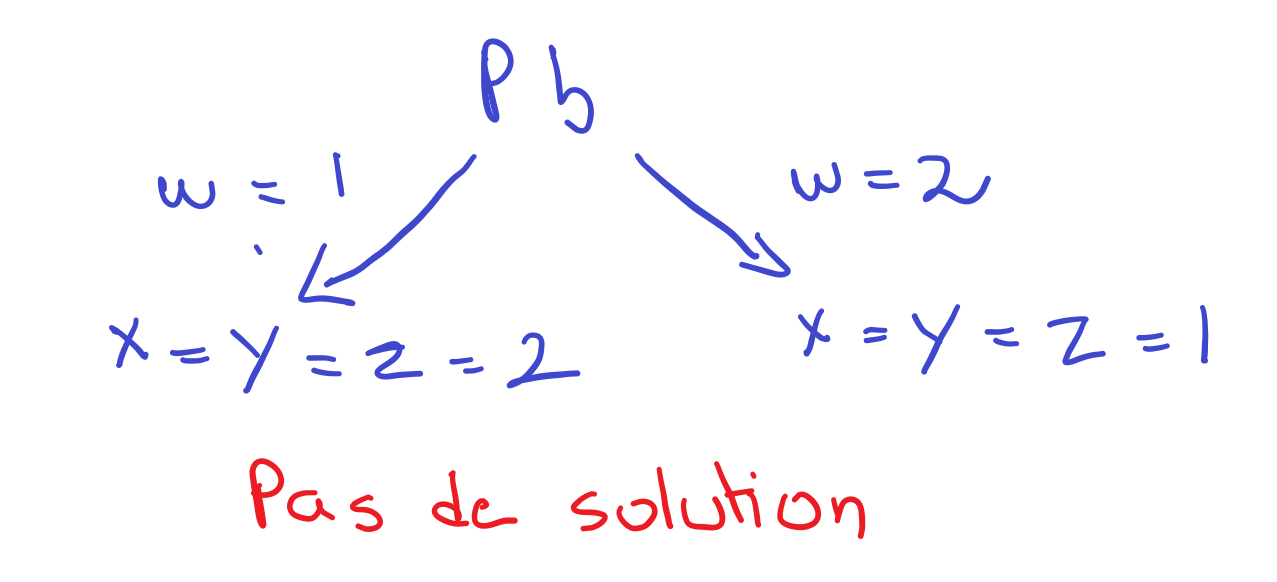

In [8]:
from IPython.display import Image
Image(filename='image-arbre.png') 

How many decisions did you take? 




Write the appropriate CP model (called model_1) and solve it. What is the size of the search tree explored? 

In [9]:
mdl = CpoModel(name='My first docplex model')
w, x, y, z = mdl.integer_var_list(4, 1, 2, 'x')
mdl.add(w != x)
mdl.add(w != y)
mdl.add(w != z)
mdl.add(x != y)
mdl.add(y != z)
sol = mdl.solve()
sol.print_solution()

 ! --------------------------------------------------- CP Optimizer 22.1.0.0 --
 ! Satisfiability problem - 4 variables, 5 constraints
 ! Presolve             = Off
 ! Workers              = 1
 ! SearchType           = DepthFirst
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 4.0 (before), 4.0 (after)
 !  . Memory usage      : 267.0 kB (before), 267.0 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 ! ----------------------------------------------------------------------------
 ! Search completed, model has no solution.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 2
 ! Number of fails        : 2
 ! Total memory usage     : 533.5 kB (493.7 kB CP Optimizer + 39.8 kB Concert)
 ! Time spent in solve    : 0.01s (0.00s engine + 0.01s extraction)
 !


How many failures did the solver encounter? 



**Exercice 3**: Create a new model (called model_2), similar to the previous one, however using one Alldifferent constraint (look for all_diff in the documentation) and solve it.

In [10]:
mdl = CpoModel(name='My first docplex model')
l = mdl.integer_var_list(4, 1, 2, 'x')
mdl.add(all_diff(l))
sol = mdl.solve()
sol.print_solution()

<ipython-input-10-fdbfeda7dc36>:3(stream:17:1): Warning: The constraint is always false, the model is infeasible.
                                                           allDiff([x_0, x_1, x_2, x_3])
 ! --------------------------------------------------- CP Optimizer 22.1.0.0 --
 ! Satisfiability problem - 4 variables, 1 constraint
 ! Presolve             = Off
 ! Workers              = 1
 ! SearchType           = DepthFirst
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 4.0 (before), 4.0 (after)
 !  . Memory usage      : 267.0 kB (before), 267.0 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 ! ----------------------------------------------------------------------------
 ! Search completed, model has no solution.
 ! ----------------------------------------------------------------------------
 ! Numb

What is the size of the search tree explored? How can you explain this? 

In [11]:
print(sol.get_solver_infos()['NumberOfBranches'])

0


We will push this observation to a larger scale. 

**Exercice 3**: Let $n$ be a natural number and consider the following CSP: 

- Variables $x_1, x_2, \ldots x_n$
- Domains: $\forall i \in [1,n], \cal{D}(x_i) = \{1, 2 , \ldots n-1\}$ 
- Constraints: $\forall i \neq j,  x_i \ne x_j$


Without using the solver, is this problem satisfiable? Why? 

Write a function model_decomposition(n) that takes as input an integer $n$ and returns the CSP model of this problem using only binary inequalities (i.e., no global constraints)

In [12]:
def model_decomposition(n):
    mdl = CpoModel(name='My first docplex model')
    l = mdl.integer_var_list(n, 1, n-1, 'x')
    for i in range(n):
        for j in range(i,n):
            if j!=i:
                mdl.add(l[i]!=l[j])
    return mdl
                


Call this function for $n= 10$ then solve this problem and plots the dlifferent statistics. How many nodes did the solver explore? What is the CPU time? 

In [13]:
mdl10 = model_decomposition(10)
sol = mdl10.solve()
sol.print_solution()
                    

 ! --------------------------------------------------- CP Optimizer 22.1.0.0 --
 ! Satisfiability problem - 10 variables, 45 constraints
 ! Presolve             = Off
 ! Workers              = 1
 ! SearchType           = DepthFirst
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 31.7 (before), 31.7 (after)
 !  . Memory usage      : 267.3 kB (before), 267.3 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
                     1000          3        F     5 != x_7
                     2000          3        F     7  = x_6
                     3000          3        F     4  = x_7
                     4000          3        F     4 != x_7
                     5000          3        F     7 != x_0
                     6000          3              5 != x_4
                     7000          3              6 != 

                     119k          3        F     4 != x_0
                     120k          3        F     1  = x_4
 ! Time = 0.22s, Average fail depth = 7, Memory usage = 547.5 kB
 !               Branches  Non-fixed            Branch decision
                     121k          3        F     5 != x_0
                     122k          3        F     5  = x_0
                     123k          3        F     1  = x_7
                     124k          3        F     5 != x_4
                     125k          3        F     5 != x_0
                     126k          3              3 != x_6
                     127k          3        F     4 != x_8
                     128k          3        F     4 != x_0
                     129k          3        F     1  = x_8
                     130k          3              1 != x_0
                     131k          3              4  = x_1
                     132k          3              4 != x_4
                     133k          3        F

                     243k          3        F     3  = x_2
                     244k          3        F     5 != x_1
                     245k          3        F     7 != x_0
                     246k          3              3 != x_6
                     247k          3        F     3 != x_9
                     248k          3        F     6  = x_1
                     249k          3        F     2 != x_8
                     250k          3        F     3 != x_0
                     251k          3              5 != x_1
                     252k          3        F     2 != x_1
                     253k          3        F     5 != x_8
                     254k          3        F     7  = x_9
                     255k          3        F     3  = x_0
                     256k          3        F     3 != x_1
                     257k          3        F     7 != x_3
                     258k          3              5 != x_1
                     259k          3              6 != x

                     369k          3        F     1  = x_4
                     370k          3              1 != x_7
                     371k          3        F     3 != x_8
                     372k          3        F     1  = x_9
                     373k          3        F     4 != x_8
                     374k          3        F     4  = x_0
                     375k          3        F     1  = x_9
                     376k          3        F     4 != x_4
                     377k          3        F     4 != x_9
                     378k          3              2 != x_7
                     379k          3        F     3 != x_0
                     380k          3        F     3 != x_7
 ! Time = 0.65s, Average fail depth = 7, Memory usage = 547.5 kB
 !               Branches  Non-fixed            Branch decision
                     381k          3        F     1  = x_4
                     382k          3              1 != x_1
                     383k          3         

                     495k          3        F     3  = x_7
                     496k          3        F     4 != x_7
                     497k          3        F     6 != x_8
                     498k          3              3 != x_7
                     499k          3        F     3 != x_4
                     500k          3        F     5  = x_3
 ! Time = 0.84s, Average fail depth = 7, Memory usage = 547.5 kB
 !               Branches  Non-fixed            Branch decision
                     501k          3        F     1 != x_9
                     502k          3        F     3 != x_4
                     503k          3              4 != x_8
                     504k          3        F     1 != x_4
                     505k          3        F     4 != x_2
                     506k          3        F     6  = x_0
                     507k          3        F     2  = x_2
                     508k          3        F     2 != x_8
                     509k          3        F

 ! Time = 1.02s, Average fail depth = 7, Memory usage = 547.5 kB
 !               Branches  Non-fixed            Branch decision
                     621k          3        F     1  = x_4
                     622k          3              1 != x_8
                     623k          3        F     3 != x_1
                     624k          3        F     1  = x_1
                     625k          3        F     4 != x_0
                     626k          3        F     4  = x_0
                     627k          3        F     1  = x_9
                     628k          3        F     4 != x_4
                     629k          3        F     4 != x_4
                     630k          3              2 != x_9
                     631k          3        F     3 != x_6
                     632k          3        F     3 != x_0
                     633k          3        F     1  = x_3
                     634k          3              1 != x_9
                     635k          3         

Write a function model_using_alldiff(n) that takes as input an integer $n$ and returns the CSP model of this problem using only one ALLDifferent constraint.


In [14]:
def model_using_alldiff(n):
    mdl = CpoModel(name='My first docplex model')
    l = mdl.integer_var_list(n, 1, n-1, 'x')
    mdl.add(all_diff(l))
    return mdl

Call this function for  n=10  then solve this problem and print the dlifferent statistics. How many nodes did the solver explore? What is the CPU time? 

In [15]:
mdl10 = model_using_alldiff(10)
sol = mdl10.solve()
sol.print_solution()


sol.get_solver_log() 

<ipython-input-14-af4ffd06be00>:4(stream:23:1): Warning: The constraint is always false, the model is infeasible.
                                                           allDiff([x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9])
 ! --------------------------------------------------- CP Optimizer 22.1.0.0 --
 ! Satisfiability problem - 10 variables, 1 constraint
 ! Presolve             = Off
 ! Workers              = 1
 ! SearchType           = DepthFirst
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 31.7 (before), 31.7 (after)
 !  . Memory usage      : 267.3 kB (before), 267.3 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 ! ----------------------------------------------------------------------------
 ! Search completed, model has no solution.
 ! ---------------------------------------------------

'<ipython-input-14-af4ffd06be00>:4(stream:23:1): Warning: The constraint is always false, the model is infeasible.\n                                                           allDiff([x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9])\n ! --------------------------------------------------- CP Optimizer 22.1.0.0 --\n ! Satisfiability problem - 10 variables, 1 constraint\n ! Presolve             = Off\n ! Workers              = 1\n ! SearchType           = DepthFirst\n ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)\n !  . Log search space  : 31.7 (before), 31.7 (after)\n !  . Memory usage      : 267.3 kB (before), 267.3 kB (after)\n ! Using sequential search.\n ! ----------------------------------------------------------------------------\n !               Branches  Non-fixed            Branch decision\n ! ----------------------------------------------------------------------------\n ! Search completed, model has no solution.\n ! -----------------------------------

Do you start to appretiate global constraints? Why?  

We will evaluate properly the model using the decomposition model_decomposition(n) with the model using the global constraint model_using_alldiff(n). For this reason we will increase the value of $n$ from 3 to $20$ and plot the runtime and the number of nodes for each model. 

In order to keep the runtime under control, we will limit the solver to 15 seconds per call using 

```
solve( TimeLimit=15, LogPeriod=100000)
```

You can use additionnal parameter as mentionned in the documentation such as 
LogVerbosity taht can gave the values ['Quiet', 'Terse', 'Normal', 'Verbose'], and LogPeriod used fot the solver log in size. You can play with these arguments

Have a look at the different parameters we can indicate to the solve function. A better and modular way to play with parameters is to use CpoParameters. 

Example : 

```
from docplex.cp.parameters import CpoParameters


params = CpoParameters(TimeLimit=10, LogVerbosity='Quiet’, LogPeriod=900000)


••• 
sol = model.solve(TimeLimit= params.TimeLimit , LogVerbosity = params.LogPeriod )


```


When a solver hits the time timit, it will simply stop the search and says that it couldn't solve the problem within the time limit. 

Write a function $run(model, params)$ that run the solver on the model $model$ using the parameters $params$. The function returns the tuple of statistics [number of nodes, total runtime, search status]

In [16]:
def run(model, params):
    sol = model.solve(
        TimeLimit = params.TimeLimit, 
        LogVerbosity = params.LogVerbosity,
        LogPeriod = params.LogPeriod,
    )
    return (sol.get_infos()["NumberOfChoicePoints"],
            sol.get_infos()["TotalTime"],
            sol.get_infos()["SearchStatus"])


Using the $run(model, params)$ function, run the two models model_decomposition(n) and model_using_alldiff(n) for $n \in [3,20]$ using a maximim timelimit of $15$s 

In [17]:
from docplex.cp.parameters import CpoParameters
params = CpoParameters(TimeLimit = 15)
res=[]
res_all_diff=[]

for n in range(3,20):
    res.append(run(model_decomposition(n), params))
    res_all_diff.append(run(model_using_alldiff(n), params))



 ! --------------------------------------------------- CP Optimizer 22.1.0.0 --
 ! Satisfiability problem - 3 variables, 3 constraints
 ! Presolve             = Off
 ! TimeLimit            = 15
 ! Workers              = 1
 ! SearchType           = DepthFirst
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 3.0 (before), 3.0 (after)
 !  . Memory usage      : 266.9 kB (before), 266.9 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 ! ----------------------------------------------------------------------------
 ! Search completed, model has no solution.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 2
 ! Number of fails        : 2
 ! Total memory usage     : 532.6 kB (493.0 kB CP Optimizer + 39.6 kB Concert)
 ! Time spent in solve    : 0.01s (0.01s 

 ! Number of fails        : 120
 ! Total memory usage     : 567.1 kB (527.2 kB CP Optimizer + 39.9 kB Concert)
 ! Time spent in solve    : 0.01s (0.00s engine + 0.01s extraction)
 ! Search speed (br. / s) : 23800.0
 ! ----------------------------------------------------------------------------
<ipython-input-14-af4ffd06be00>:4(stream:19:1): Warning: The constraint is always false, the model is infeasible.
                                                           allDiff([x_0, x_1, x_2, x_3, x_4, x_5])
 ! --------------------------------------------------- CP Optimizer 22.1.0.0 --
 ! Satisfiability problem - 6 variables, 1 constraint
 ! Presolve             = Off
 ! TimeLimit            = 15
 ! Workers              = 1
 ! SearchType           = DepthFirst
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 13.9 (before), 13.9 (after)
 !  . Memory usage      : 267.1 kB (before), 267.1 kB (after)
 ! Using sequential search.
 ! ----------------

                     7000          3              3  = x_6
                     8000          3        F     4 != x_0
                     9000          3              6 != x_0
                    10000          3              2  = x_4
                    11000          3              4 != x_3
                    12000          3        F     1  = x_4
                    13000          3              7 != x_3
                    14000          3        F     5 != x_3
                    15000          3        F     1 != x_6
                    16000          3              3 != x_8
                    17000          3              3 != x_4
                    18000          3        F     1  = x_6
                    19000          3              4  = x_6
                    20000          3              4  = x_6
 ! Time = 0.04s, Average fail depth = 6, Memory usage = 538.9 kB
 !               Branches  Non-fixed            Branch decision
                    21000          3        F

                    15000          3        F     2  = x_3
                    16000          3        F     5 != x_3
                    17000          3        F     5 != x_3
                    18000          3              4 != x_6
                    19000          3              7 != x_2
                    20000          3              2 != x_3
 ! Time = 0.04s, Average fail depth = 7, Memory usage = 547.5 kB
 !               Branches  Non-fixed            Branch decision
                    21000          3        F     3  = x_8
                    22000          3        F     6 != x_0
                    23000          3              5 != x_8
                    24000          3              3 != x_8
                    25000          3        F     3 != x_0
                    26000          3        F     6  = x_2
                    27000          3        F     2  = x_3
                    28000          3        F     3 != x_0
                    29000          3         

 ! Time = 0.23s, Average fail depth = 7, Memory usage = 547.5 kB
 !               Branches  Non-fixed            Branch decision
                     141k          3              5 != x_7
                     142k          3        F     4 != x_8
                     143k          3        F     6 != x_8
                     144k          3        F     1  = x_0
                     145k          3        F     3 != x_3
                     146k          3        F     6  = x_8
                     147k          3        F     3  = x_3
                     148k          3        F     3 != x_0
                     149k          3        F     5 != x_2
                     150k          3        F     3  = x_4
                     151k          3              3  = x_3
                     152k          3        F     5 != x_8
                     153k          3        F     1 != x_8
                     154k          3              4  = x_7
                     155k          3         

                     265k          3        F     6 != x_3
                     266k          3        F     6  = x_3
                     267k          3        F     1  = x_2
                     268k          3        F     5 != x_8
                     269k          3        F     5 != x_1
                     270k          3              2 != x_8
                     271k          3              7 != x_8
                     272k          3              1 != x_8
                     273k          3        F     2  = x_4
                     274k          3        F     6 != x_4
                     275k          3              3 != x_8
                     276k          3              2 != x_6
                     277k          3        F     2 != x_8
                     278k          3        F     6  = x_0
                     279k          3        F     1  = x_0
                     280k          3        F     2 != x_1
 ! Time = 0.45s, Average fail depth = 7, Memory usage = 

                     391k          3        F     2 != x_6
                     392k          3        F     4 != x_3
                     393k          3              4 != x_3
                     394k          3              2 != x_9
                     395k          3              4 != x_1
                     396k          3        F     1 != x_1
                     397k          3              6 != x_0
                     398k          3        F     6 != x_9
                     399k          3        F     2 != x_0
                     400k          3              1 != x_7
 ! Time = 0.65s, Average fail depth = 7, Memory usage = 547.5 kB
 !               Branches  Non-fixed            Branch decision
                     401k          3              2 != x_3
                     402k          3        F     2 != x_1
                     403k          3        F     3  = x_7
                     404k          3        F     5  = x_0
                     405k          3        F

                     517k          3        F     5 != x_7
                     518k          3        F     5  = x_8
                     519k          3        F     1  = x_1
                     520k          3        F     3 != x_8
 ! Time = 0.85s, Average fail depth = 7, Memory usage = 547.5 kB
 !               Branches  Non-fixed            Branch decision
                     521k          3        F     3 != x_4
                     522k          3              2 != x_4
                     523k          3              6 != x_2
                     524k          3              1 != x_8
                     525k          3        F     2  = x_0
                     526k          3        F     4 != x_1
                     527k          3              3 != x_2
                     528k          3              2 != x_2
                     529k          3        F     2 != x_4
                     530k          3        F     4  = x_0
                     531k          3        F

                     641k          3              3 != x_4
                     642k          3        F     1  = x_6
                     643k          3              5 != x_2
                     644k          3              1 != x_3
                     645k          3        F     1  = x_4
                     646k          3              3 != x_4
                     647k          3              5 != x_1
                     648k          3        F     2 != x_3
                     649k          3              6 != x_3
                     650k          3        F     6 != x_1
                     651k          3        F     3 != x_3
                     652k          3              2 != x_8
                     653k          3              3 != x_4
                     654k          3        F     3 != x_8
                     655k          3        F     4  = x_8
                     656k          3        F     5 != x_3
                     657k          3        F     1 != x

                     4000          3        F     5  = x_7
                     5000          3        F     8  = x_0
                     6000          3        F     5 != x_7
                     7000          3        F     5 != x_6
                     8000          3              4  = x_6
                     9000          3        F     4  = x_3
                    10000          3              4 != x_8
                    11000          3        F     7  = x_6
                    12000          3        F     3 != x_0
                    13000          3        F     7  = x_4
                    14000          3              3  = x_2
                    15000          3              9  = x_0
                    16000          3        F     6  = x_3
                    17000          3        F     6  = x_3
                    18000          3        F     3 != x_3
                    19000          3        F     6 != x_7
                    20000          3        F     6 != x

                     130k          3        F     5 != x_8
                     131k          3              4 != x_1
                     132k          3        F     4 != x_7
                     133k          3        F     5  = x_3
                     134k          3              4  = x_3
                     135k          3              7  = x_3
                     136k          3        F     4  = x_4
                     137k          3        F     6  = x_1
                     138k          3        F     2 != x_7
                     139k          3        F     4  = x_7
                     140k          3        F     6  = x_3
 ! Time = 0.24s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                     141k          3        F     2 != x_2
                     142k          3        F     5  = x_8
                     143k          3        F     7  = x_8
                     144k          3         

                     256k          3        F     4  = x_1
                     257k          3        F     8  = x_3
                     258k          3        F     4 != x_4
                     259k          3        F     4 != x_1
                     260k          3              2  = x_2
 ! Time = 0.44s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                     261k          3        F     2  = x_1
                     262k          3              2 != x_10
                     263k          3        F     7  = x_3
                     264k          3        F     2 != x_6
                     265k          3        F     7  = x_3
                     266k          3              2  = x_4
                     267k          3              9  = x_4
                     268k          3        F     6  = x_8
                     269k          3        F     6  = x_1
                     270k          3        

 !               Branches  Non-fixed            Branch decision
                     381k          3              7  = x_0
                     382k          3        F     4 != x_10
                     383k          3              3 != x_10
                     384k          3        F     3 != x_6
                     385k          3        F     4  = x_10
                     386k          3              3  = x_4
                     387k          3              7  = x_4
                     388k          3        F     3  = x_6
                     389k          3        F     5  = x_6
                     390k          3        F     2 != x_10
                     391k          3        F     3  = x_6
                     392k          3        F     5  = x_3
                     393k          3        F     2 != x_4
                     394k          3        F     4 != x_3
                     395k          3        F     7 != x_7
                     396k          3        F  

                     506k          3              2  = x_4
                     507k          3              9  = x_4
                     508k          3        F     3  = x_8
                     509k          3        F     7  = x_8
                     510k          3        F     3 != x_0
                     511k          3        F     3 != x_8
                     512k          3              2  = x_3
                     513k          3        F     2  = x_1
                     514k          3              2 != x_4
                     515k          3        F     6  = x_7
                     516k          3        F     2 != x_7
                     517k          3        F     6  = x_7
                     518k          3              2  = x_2
                     519k          3              9  = x_3
                     520k          3        F     4  = x_8
 ! Time = 0.87s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Br

                     632k          3        F     4  = x_0
                     633k          3              6  = x_4
                     634k          3        F     4 != x_4
                     635k          3              3 != x_3
                     636k          3              4 != x_4
                     637k          3        F     4 != x_8
                     638k          3        F     6  = x_6
                     639k          3        F     2  = x_6
                     640k          3        F     3 != x_8
 ! Time = 1.06s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                     641k          3        F     5 != x_6
                     642k          3              3 != x_3
                     643k          3        F     3 != x_0
                     644k          3        F     5 != x_4
                     645k          3              5 != x_0
                     646k          3        F

                     758k          3              3  = x_9
                     759k          3              9  = x_8
                     760k          3        F     4  = x_7
 ! Time = 1.27s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                     761k          3        F     8  = x_3
                     762k          3        F     4 != x_0
                     763k          3        F     4 != x_9
                     764k          3              3  = x_1
                     765k          3        F     3  = x_0
                     766k          3              3 != x_7
                     767k          3        F     6  = x_3
                     768k          3        F     3 != x_7
                     769k          3        F     6  = x_4
                     770k          3              3  = x_7
                     771k          3              9  = x_4
                     772k          3        F

                     882k          3              4 != x_0
                     883k          3        F     5 != x_10
                     884k          3        F     5 != x_8
                     885k          3        F     1  = x_10
                     886k          3              1 != x_10
                     887k          3              5  = x_7
                     888k          3        F     5 != x_3
                     889k          3        F     6  = x_1
                     890k          3              5  = x_10
                     891k          3              8  = x_10
                     892k          3        F     5  = x_4
                     893k          3        F     7  = x_3
                     894k          3        F     3 != x_6
                     895k          3        F     5  = x_6
                     896k          3        F     7  = x_1
                     897k          3        F     3 != x_10
                     898k          3        F     

                    1008k          3        F     1  = x_10
                    1009k          3        F     4  = x_7
                    1010k          3              1  = x_3
                    1011k          3              9  = x_7
                    1012k          3        F     3  = x_4
                    1013k          3        F     8  = x_3
                    1014k          3        F     3 != x_10
                    1015k          3        F     3 != x_7
                    1016k          3              1  = x_3
                    1017k          3        F     1  = x_8
                    1018k          3              1 != x_10
                    1019k          3        F     6  = x_1
                    1020k          3        F     1 != x_8
 ! Time = 1.69s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    1021k          3        F     6  = x_1
                    1022k          3      

                    1134k          3        F     3 != x_3
                    1135k          3        F     5  = x_4
                    1136k          3        F     5  = x_9
                    1137k          3              8  = x_6
                    1138k          3        F     5 != x_4
                    1139k          3              4 != x_10
                    1140k          3        F     4 != x_6
 ! Time = 1.89s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    1141k          3        F     5  = x_0
                    1142k          3              4  = x_9
                    1143k          3              8  = x_6
                    1144k          3        F     4  = x_8
                    1145k          3        F     6  = x_4
                    1146k          3        F     1 != x_0
                    1147k          3        F     4  = x_4
                    1148k          3        

                    1260k          3        F     1  = x_7
 ! Time = 2.07s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    1261k          3        F     4  = x_7
                    1262k          3              1  = x_0
                    1263k          3              9  = x_6
                    1264k          3        F     3  = x_3
                    1265k          3        F     6  = x_7
                    1266k          3        F     3 != x_7
                    1267k          3        F     3 != x_0
                    1268k          3              1  = x_3
                    1269k          3        F     1  = x_10
                    1270k          3              1 != x_3
                    1271k          3        F     5  = x_0
                    1272k          3        F     1 != x_10
                    1273k          3        F     5  = x_7
                    1274k          3       

                    1384k          3        F     6 != x_0
                    1385k          3        F     6 != x_4
                    1386k          3              4 != x_0
                    1387k          3        F     5 != x_6
                    1388k          3        F     5 != x_0
                    1389k          3        F     1  = x_4
                    1390k          3              1 != x_7
                    1391k          3              5  = x_6
                    1392k          3              5 != x_9
                    1393k          3        F     5 != x_9
                    1394k          3        F     7  = x_4
                    1395k          3        F     1  = x_9
                    1396k          3        F     3 != x_6
                    1397k          3        F     6 != x_0
                    1398k          3              3 != x_6
                    1399k          3        F     3 != x_0
                    1400k          3        F     6 != x

                    1510k          3        F     4  = x_7
                    1511k          3        F     6 != x_1
                    1512k          3        F     2  = x_2
                    1513k          3        F     5  = x_9
                    1514k          3              2  = x_8
                    1515k          3              8  = x_7
                    1516k          3        F     4  = x_8
                    1517k          3        F     7  = x_10
                    1518k          3        F     4 != x_2
                    1519k          3        F     4 != x_1
                    1520k          3              2  = x_7
 ! Time = 2.48s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    1521k          3        F     2  = x_2
                    1522k          3              2 != x_2
                    1523k          3        F     6 != x_9
                    1524k          3        

                    1636k          3        F     7  = x_10
                    1637k          3        F     7  = x_10
                    1638k          3        F     1 != x_10
                    1639k          3        F     6  = x_6
                    1640k          3        F     6  = x_2
 ! Time = 2.68s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    1641k          3              8  = x_6
                    1642k          3        F     6 != x_8
                    1643k          3              2 != x_6
                    1644k          3        F     2 != x_6
                    1645k          3        F     5  = x_9
                    1646k          3              2  = x_7
                    1647k          3              8  = x_9
                    1648k          3        F     2  = x_10
                    1649k          3        F     7  = x_9
                    1650k          3     

 !               Branches  Non-fixed            Branch decision
                    1761k          3        F     1  = x_8
                    1762k          3        F     2  = x_10
                    1763k          3        F     6 != x_2
                    1764k          3        F     1  = x_2
                    1765k          3        F     4 != x_8
                    1766k          3        F     7  = x_10
                    1767k          3        F     2  = x_7
                    1768k          3        F     2 != x_2
                    1769k          3        F     7 != x_10
                    1770k          3              4 != x_2
                    1771k          3              6 != x_3
                    1772k          3        F     4  = x_7
                    1773k          3        F     1 != x_1
                    1774k          3              2  = x_2
                    1775k          3        F     7  = x_1
                    1776k          3        F   

                    1886k          3              2  = x_6
                    1887k          3              9  = x_6
                    1888k          3        F     6  = x_0
                    1889k          3        F     6  = x_10
                    1890k          3        F     1 != x_0
                    1891k          3        F     4  = x_0
                    1892k          3        F     4  = x_6
                    1893k          3              8  = x_10
                    1894k          3        F     4 != x_9
                    1895k          3              2 != x_10
                    1896k          3        F     2 != x_0
                    1897k          3        F     4  = x_7
                    1898k          3              2  = x_7
                    1899k          3              8  = x_0
                    1900k          3        F     2  = x_8
 ! Time = 3.09s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed           

                    2012k          3        F     5  = x_2
                    2013k          3        F     1 != x_1
                    2014k          3        F     2 != x_2
                    2015k          3              4 != x_3
                    2016k          3        F     1 != x_3
                    2017k          3        F     5  = x_8
                    2018k          3              2  = x_2
                    2019k          3              8  = x_10
                    2020k          3        F     4  = x_7
 ! Time = 3.28s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    2021k          3        F     7  = x_10
                    2022k          3        F     4 != x_10
                    2023k          3        F     4 != x_10
                    2024k          3              2  = x_2
                    2025k          3        F     2  = x_8
                    2026k          3     

                    2138k          3        F     5  = x_6
                    2139k          3        F     1  = x_0
                    2140k          3        F     5 != x_2
 ! Time = 3.48s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    2141k          3        F     5 != x_3
                    2142k          3              2 != x_8
                    2143k          3        F     4 != x_7
                    2144k          3        F     4 != x_7
                    2145k          3        F     1  = x_0
                    2146k          3              1 != x_8
                    2147k          3              4  = x_6
                    2148k          3              4 != x_7
                    2149k          3        F     4 != x_7
                    2150k          3        F     6  = x_0
                    2151k          3        F     1  = x_7
                    2152k          3        F

                    2262k          3        F     3 != x_1
                    2263k          3        F     5  = x_3
                    2264k          3              3  = x_10
                    2265k          3        F     3  = x_2
                    2266k          3        F     5  = x_10
                    2267k          3        F     7 != x_7
                    2268k          3        F     3  = x_2
                    2269k          3        F     6  = x_1
                    2270k          3              1  = x_1
                    2271k          3              9  = x_2
                    2272k          3        F     5  = x_10
                    2273k          3        F     8  = x_4
                    2274k          3        F     5 != x_6
                    2275k          3        F     5 != x_4
                    2276k          3              1  = x_1
                    2277k          3        F     1  = x_7
                    2278k          3              1 !

                    2388k          3              5 != x_1
                    2389k          3        F     6  = x_7
                    2390k          3              2  = x_8
                    2391k          3              9  = x_7
                    2392k          3        F     6  = x_6
                    2393k          3        F     6  = x_7
                    2394k          3        F     1 != x_4
                    2395k          3        F     5  = x_6
                    2396k          3        F     5  = x_4
                    2397k          3              7  = x_10
                    2398k          3        F     5 != x_4
                    2399k          3              2 != x_1
                    2400k          3        F     2 != x_6
 ! Time = 3.91s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    2401k          3        F     5  = x_6
                    2402k          3        

                    2514k          3        F     1 != x_2
                    2515k          3        F     3  = x_10
                    2516k          3              1  = x_7
                    2517k          3        F     1  = x_10
                    2518k          3        F     3  = x_2
                    2519k          3        F     7 != x_1
                    2520k          3        F     1  = x_3
 ! Time = 4.11s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    2521k          3        F     5  = x_6
                    2522k          3              1  = x_3
                    2523k          3              9  = x_8
                    2524k          3        F     2  = x_2
                    2525k          3        F     8  = x_1
                    2526k          3        F     2 != x_3
                    2527k          3        F     2 != x_2
                    2528k          3       

                    2640k          3              3 != x_1
 ! Time = 4.30s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    2641k          3        F     5  = x_0
                    2642k          3              2  = x_1
                    2643k          3              8  = x_4
                    2644k          3        F     5  = x_1
                    2645k          3        F     5  = x_1
                    2646k          3        F     1 != x_10
                    2647k          3        F     3  = x_10
                    2648k          3        F     3  = x_7
                    2649k          3              6  = x_7
                    2650k          3        F     3 != x_7
                    2651k          3              2 != x_2
                    2652k          3              3 != x_3
                    2653k          3        F     3 != x_0
                    2654k          3       

                    2764k          3        F     5  = x_2
                    2765k          3        F     7  = x_10
                    2766k          3        F     1 != x_1
                    2767k          3        F     2  = x_6
                    2768k          3              1  = x_3
                    2769k          3        F     1  = x_10
                    2770k          3        F     2  = x_7
                    2771k          3        F     6 != x_1
                    2772k          3        F     1  = x_3
                    2773k          3        F     3  = x_6
                    2774k          3              1  = x_3
                    2775k          3              8  = x_6
                    2776k          3        F     2  = x_6
                    2777k          3        F     7  = x_1
                    2778k          3        F     2 != x_10
                    2779k          3        F     2 != x_7
                    2780k          3              1  

                    2890k          3              1 != x_10
                    2891k          3        F     3 != x_6
                    2892k          3        F     1  = x_0
                    2893k          3              7 != x_7
                    2894k          3        F     5 != x_4
                    2895k          3        F     1 != x_2
                    2896k          3              2 != x_2
                    2897k          3              2 != x_4
                    2898k          3        F     1  = x_0
                    2899k          3              7 != x_0
                    2900k          3              1 != x_7
 ! Time = 4.73s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    2901k          3        F     1 != x_6
                    2902k          3              3  = x_7
                    2903k          3        F     2  = x_10
                    2904k          3       

                    3016k          3        F     4  = x_3
                    3017k          3        F     8  = x_4
                    3018k          3        F     1 != x_0
                    3019k          3        F     3  = x_10
                    3020k          3              1  = x_6
 ! Time = 4.93s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    3021k          3        F     1  = x_1
                    3022k          3        F     3  = x_4
                    3023k          3        F     7 != x_3
                    3024k          3        F     1  = x_0
                    3025k          3        F     4  = x_10
                    3026k          3              1  = x_4
                    3027k          3              9  = x_0
                    3028k          3        F     3  = x_10
                    3029k          3        F     8  = x_1
                    3030k          3      

 !               Branches  Non-fixed            Branch decision
                    3141k          3        F     1  = x_10
                    3142k          3              1 != x_0
                    3143k          3        F     4 != x_8
                    3144k          3        F     1  = x_10
                    3145k          3        F     7  = x_7
                    3146k          3              3  = x_10
                    3147k          3              9  = x_10
                    3148k          3        F     7  = x_10
                    3149k          3        F     7  = x_6
                    3150k          3        F     2 != x_4
                    3151k          3        F     6  = x_0
                    3152k          3        F     6  = x_6
                    3153k          3              8  = x_7
                    3154k          3        F     6 != x_2
                    3155k          3              3 != x_6
                    3156k          3        F 

                    3266k          3              3  = x_4
                    3267k          3              8  = x_8
                    3268k          3        F     3  = x_0
                    3269k          3        F     8  = x_0
                    3270k          3        F     1 != x_7
                    3271k          3        F     2  = x_3
                    3272k          3              1  = x_7
                    3273k          3        F     1  = x_1
                    3274k          3        F     2  = x_1
                    3275k          3        F     4 != x_3
                    3276k          3        F     1  = x_4
                    3277k          3        F     3  = x_4
                    3278k          3              1  = x_4
                    3279k          3              9  = x_10
                    3280k          3        F     2  = x_10
 ! Time = 5.35s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            

                    3392k          3              2  = x_6
                    3393k          3              9  = x_7
                    3394k          3        F     3 != x_7
                    3395k          3        F     4  = x_4
                    3396k          3              4 != x_7
                    3397k          3        F     6  = x_3
                    3398k          3              3  = x_2
                    3399k          3              9  = x_4
                    3400k          3        F     6  = x_2
 ! Time = 5.55s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    3401k          3        F     6  = x_4
                    3402k          3        F     1 != x_2
                    3403k          3        F     4  = x_4
                    3404k          3        F     4  = x_4
                    3405k          3              7  = x_10
                    3406k          3        

                    3518k          3              3  = x_1
                    3519k          3              6  = x_6
                    3520k          3        F     3  = x_4
 ! Time = 5.76s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    3521k          3        F     6  = x_3
                    3522k          3        F     1 != x_3
                    3523k          3        F     2  = x_8
                    3524k          3              1  = x_3
                    3525k          3        F     1  = x_4
                    3526k          3        F     2  = x_6
                    3527k          3        F     4 != x_3
                    3528k          3        F     1  = x_0
                    3529k          3        F     3  = x_7
                    3530k          3              1  = x_4
                    3531k          3              7  = x_1
                    3532k          3        F

                    3642k          3        F     4 != x_7
                    3643k          3        F     4 != x_4
                    3644k          3              2  = x_6
                    3645k          3              9  = x_7
                    3646k          3        F     4 != x_0
                    3647k          3        F     5  = x_6
                    3648k          3              5 != x_2
                    3649k          3        F     7  = x_2
                    3650k          3              3  = x_4
                    3651k          3              9  = x_6
                    3652k          3        F     7  = x_1
                    3653k          3        F     7  = x_0
                    3654k          3        F     2 != x_4
                    3655k          3        F     5  = x_2
                    3656k          3        F     5  = x_0
                    3657k          3              8  = x_6
                    3658k          3        F     5 != x

                    3768k          3        F     1 != x_2
                    3769k          3        F     3 != x_6
                    3770k          3              4  = x_3
                    3771k          3              7  = x_3
                    3772k          3        F     4  = x_0
                    3773k          3        F     7  = x_3
                    3774k          3        F     1 != x_3
                    3775k          3        F     3  = x_3
                    3776k          3              1  = x_9
                    3777k          3        F     1  = x_9
                    3778k          3        F     3  = x_0
                    3779k          3        F     5 != x_1
                    3780k          3        F     1  = x_4
 ! Time = 6.18s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    3781k          3        F     4 != x_2
                    3782k          3        F

                    3894k          3        F     2 != x_1
                    3895k          3        F     2 != x_3
                    3896k          3              1  = x_3
                    3897k          3              9  = x_8
                    3898k          3        F     2 != x_0
                    3899k          3        F     5  = x_1
                    3900k          3              5 != x_9
 ! Time = 6.37s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    3901k          3        F     7  = x_2
                    3902k          3              2  = x_4
                    3903k          3              9  = x_8
                    3904k          3        F     7  = x_3
                    3905k          3        F     7  = x_3
                    3906k          3        F     1 != x_6
                    3907k          3        F     3  = x_8
                    3908k          3        F

                    4020k          3        F     1 != x_9
 ! Time = 6.58s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    4021k          3        F     2 != x_3
                    4022k          3        F     7  = x_7
                    4023k          3        F     2  = x_0
                    4024k          3        F     3 != x_6
                    4025k          3        F     7 != x_1
                    4026k          3              2 != x_1
                    4027k          3        F     2 != x_9
                    4028k          3        F     4  = x_9
                    4029k          3        F     1 != x_6
                    4030k          3        F     2 != x_0
                    4031k          3              3 != x_6
                    4032k          3        F     1 != x_6
                    4033k          3        F     4  = x_0
                    4034k          3         

                    4144k          3        F     3  = x_9
                    4145k          3        F     7  = x_2
                    4146k          3        F     2 != x_9
                    4147k          3        F     2 != x_4
                    4148k          3              1  = x_3
                    4149k          3              9  = x_0
                    4150k          3        F     2 != x_1
                    4151k          3        F     3  = x_9
                    4152k          3              3 != x_1
                    4153k          3        F     4  = x_9
                    4154k          3              2  = x_4
                    4155k          3              9  = x_9
                    4156k          3        F     4  = x_9
                    4157k          3        F     4  = x_7
                    4158k          3        F     1 != x_9
                    4159k          3        F     3  = x_4
                    4160k          3        F     3  = x

                    4270k          3        F     3 != x_7
                    4271k          3              2 != x_4
                    4272k          3              2 != x_0
                    4273k          3              5 != x_8
                    4274k          3        F     7  = x_9
                    4275k          3        F     3  = x_0
                    4276k          3        F     4 != x_3
                    4277k          3        F     7 != x_2
                    4278k          3              3 != x_7
                    4279k          3        F     3 != x_1
                    4280k          3        F     5  = x_0
 ! Time = 7.01s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    4281k          3        F     2 != x_7
                    4282k          3        F     3 != x_7
                    4283k          3              4 != x_0
                    4284k          3        F

                    4396k          3        F     4  = x_1
                    4397k          3        F     8  = x_0
                    4398k          3        F     3 != x_1
                    4399k          3        F     3 != x_7
                    4400k          3              2  = x_7
 ! Time = 7.19s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    4401k          3              9  = x_1
                    4402k          3        F     3 != x_1
                    4403k          3        F     4  = x_2
                    4404k          3              4 != x_0
                    4405k          3        F     5  = x_1
                    4406k          3              3  = x_10
                    4407k          3              9  = x_1
                    4408k          3        F     5  = x_0
                    4409k          3        F     5  = x_9
                    4410k          3        

 !               Branches  Non-fixed            Branch decision
                    4521k          3              9  = x_7
                    4522k          3        F     5  = x_7
                    4523k          3        F     5 != x_4
                    4524k          3        F     2 != x_1
                    4525k          3        F     4 != x_1
                    4526k          3              5  = x_10
                    4527k          3              8  = x_9
                    4528k          3        F     5  = x_6
                    4529k          3        F     8  = x_9
                    4530k          3        F     1 != x_10
                    4531k          3        F     4  = x_7
                    4532k          3              1  = x_9
                    4533k          3        F     1  = x_4
                    4534k          3        F     4  = x_6
                    4535k          3        F     6 != x_7
                    4536k          3        F    

                    4646k          3        F     5  = x_1
                    4647k          3              9  = x_10
                    4648k          3        F     3  = x_10
                    4649k          3        F     6  = x_2
                    4650k          3        F     2 != x_2
                    4651k          3        F     2 != x_8
                    4652k          3              1  = x_9
                    4653k          3              9  = x_7
                    4654k          3        F     2 != x_0
                    4655k          3        F     3  = x_10
                    4656k          3              3 != x_9
                    4657k          3        F     5  = x_2
                    4658k          3              2  = x_6
                    4659k          3              8  = x_0
                    4660k          3        F     5  = x_9
 ! Time = 7.61s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed           

                    4772k          3        F     5  = x_2
                    4773k          3              9  = x_9
                    4774k          3        F     4  = x_6
                    4775k          3        F     4 != x_6
                    4776k          3        F     1 != x_10
                    4777k          3        F     3 != x_9
                    4778k          3              4  = x_8
                    4779k          3              8  = x_2
                    4780k          3        F     4  = x_7
 ! Time = 7.80s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    4781k          3        F     8  = x_2
                    4782k          3        F     1 != x_9
                    4783k          3        F     2  = x_9
                    4784k          3              1  = x_7
                    4785k          3        F     1  = x_6
                    4786k          3        

                    4898k          3        F     4  = x_2
                    4899k          3              6  = x_9
                    4900k          3        F     3  = x_6
 ! Time = 8.00s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    4901k          3        F     5  = x_2
                    4902k          3        F     2 != x_4
                    4903k          3        F     2 != x_6
                    4904k          3              1  = x_1
                    4905k          3              6  = x_9
                    4906k          3        F     2 != x_1
                    4907k          3        F     3  = x_9
                    4908k          3              3 != x_0
                    4909k          3        F     4 != x_1
                    4910k          3        F     4  = x_10
                    4911k          3        F     1  = x_6
                    4912k          3        

                    5022k          3              4 != x_0
                    5023k          3        F     5 != x_7
                    5024k          3        F     5 != x_7
                    5025k          3        F     1  = x_4
                    5026k          3        F     4 != x_6
                    5027k          3              2 != x_0
                    5028k          3              2 != x_10
                    5029k          3              6 != x_6
                    5030k          3        F     6  = x_7
                    5031k          3        F     2  = x_4
                    5032k          3        F     3 != x_8
                    5033k          3        F     6 != x_6
                    5034k          3              2 != x_10
                    5035k          3        F     2 != x_8
                    5036k          3        F     5  = x_8
                    5037k          3        F     1 != x_10
                    5038k          3        F     2 !

                    5148k          3              3 != x_6
                    5149k          3        F     3  = x_9
                    5150k          3        F     5  = x_10
                    5151k          3        F     4  = x_4
                    5152k          3        F     4 != x_0
                    5153k          3        F     6 != x_8
                    5154k          3              5 != x_9
                    5155k          3              6 != x_9
                    5156k          3        F     4  = x_8
                    5157k          3        F     2  = x_4
                    5158k          3              2 != x_4
                    5159k          3        F     4 != x_6
                    5160k          3        F     2  = x_8
 ! Time = 8.46s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    5161k          3        F     6  = x_10
                    5162k          3       

                    5274k          3        F     1 != x_10
                    5275k          3        F     6  = x_9
                    5276k          3        F     6  = x_9
                    5277k          3              9  = x_3
                    5278k          3        F     4  = x_3
                    5279k          3        F     4 != x_4
                    5280k          3        F     1 != x_8
 ! Time = 8.68s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    5281k          3        F     2 != x_9
                    5282k          3              4  = x_9
                    5283k          3              7  = x_8
                    5284k          3        F     4  = x_1
                    5285k          3        F     7  = x_9
                    5286k          3        F     1 != x_9
                    5287k          3        F     2  = x_4
                    5288k          3        

                    5400k          3        F     1  = x_1
 ! Time = 8.89s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    5401k          3        F     2 != x_2
                    5402k          3        F     5 != x_4
                    5403k          3              9  = x_4
                    5404k          3        F     4  = x_1
                    5405k          3        F     7  = x_6
                    5406k          3        F     3 != x_4
                    5407k          3        F     3 != x_0
                    5408k          3              2  = x_10
                    5409k          3              9  = x_10
                    5410k          3        F     3 != x_10
                    5411k          3        F     4  = x_9
                    5412k          3              4 != x_0
                    5413k          3        F     6  = x_6
                    5414k          3      

                    5524k          3        F     4  = x_8
                    5525k          3        F     4  = x_3
                    5526k          3        F     1 != x_2
                    5527k          3        F     4  = x_3
                    5528k          3        F     4  = x_4
                    5529k          3              9  = x_1
                    5530k          3        F     3  = x_8
                    5531k          3        F     3 != x_6
                    5532k          3        F     1 != x_3
                    5533k          3        F     2 != x_8
                    5534k          3              3  = x_8
                    5535k          3              5  = x_1
                    5536k          3        F     3  = x_6
                    5537k          3        F     5  = x_8
                    5538k          3        F     1 != x_2
                    5539k          3        F     2  = x_9
                    5540k          3              1  = x

                    5650k          3        F     3  = x_2
                    5651k          3        F     5  = x_2
                    5652k          3              3 != x_0
                    5653k          3        F     3  = x_9
                    5654k          3        F     5  = x_1
                    5655k          3              7  = x_2
                    5656k          3        F     4  = x_8
                    5657k          3        F     6  = x_10
                    5658k          3        F     3 != x_0
                    5659k          3        F     3 != x_8
                    5660k          3              1  = x_0
 ! Time = 9.35s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    5661k          3              7  = x_1
                    5662k          3        F     3 != x_6
                    5663k          3        F     4  = x_8
                    5664k          3        

                    5776k          3        F     4 != x_6
                    5777k          3        F     4 != x_6
                    5778k          3              3 != x_3
                    5779k          3        F     4 != x_3
                    5780k          3        F     4 != x_0
 ! Time = 9.58s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    5781k          3        F     1  = x_1
                    5782k          3        F     3 != x_6
                    5783k          3              2 != x_0
                    5784k          3              2 != x_2
                    5785k          3              5 != x_1
                    5786k          3        F     5  = x_10
                    5787k          3        F     2  = x_3
                    5788k          3        F     3 != x_1
                    5789k          3        F     5 != x_3
                    5790k          3        

 !               Branches  Non-fixed            Branch decision
                    5901k          3        F     1  = x_0
                    5902k          3        F     4  = x_2
                    5903k          3        F     6  = x_3
                    5904k          3              4 != x_9
                    5905k          3        F     4  = x_1
                    5906k          3        F     6  = x_8
                    5907k          3              8  = x_4
                    5908k          3        F     5  = x_0
                    5909k          3        F     7  = x_0
                    5910k          3        F     3 != x_1
                    5911k          3        F     3 != x_10
                    5912k          3              1  = x_10
                    5913k          3              8  = x_9
                    5914k          3        F     3 != x_0
                    5915k          3        F     5  = x_0
                    5916k          3             

                    6026k          3              1  = x_0
                    6027k          3        F     1  = x_8
                    6028k          3        F     5  = x_2
                    6029k          3        F     5  = x_10
                    6030k          3        F     1 != x_2
                    6031k          3        F     5  = x_8
                    6032k          3        F     5  = x_1
                    6033k          3              7  = x_0
                    6034k          3        F     4  = x_2
                    6035k          3        F     4 != x_4
                    6036k          3        F     1 != x_4
                    6037k          3        F     2 != x_4
                    6038k          3        F     6  = x_10
                    6039k          3        F     2  = x_9
                    6040k          3        F     4 != x_1
 ! Time = 10.04s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed           

                    6152k          3              1  = x_0
                    6153k          3        F     1  = x_1
                    6154k          3        F     2  = x_4
                    6155k          3        F     6  = x_6
                    6156k          3              2 != x_8
                    6157k          3        F     2  = x_6
                    6158k          3        F     6  = x_4
                    6159k          3              8  = x_6
                    6160k          3        F     3  = x_4
 ! Time = 10.24s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    6161k          3        F     7  = x_8
                    6162k          3        F     2 != x_3
                    6163k          3        F     2 != x_4
                    6164k          3              1  = x_9
                    6165k          3              8  = x_3
                    6166k          3        

                    6278k          3              1  = x_0
                    6279k          3        F     1  = x_8
                    6280k          3        F     4 != x_0
 ! Time = 10.46s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    6281k          3        F     4 != x_9
                    6282k          3              3 != x_1
                    6283k          3        F     4 != x_6
                    6284k          3        F     4 != x_10
                    6285k          3        F     1  = x_10
                    6286k          3        F     3 != x_1
                    6287k          3              2 != x_6
                    6288k          3              2 != x_8
                    6289k          3              5 != x_1
                    6290k          3              4  = x_8
                    6291k          3              6  = x_10
                    6292k          3     

                    6402k          3        F     2 != x_3
                    6403k          3        F     3  = x_1
                    6404k          3              1  = x_0
                    6405k          3        F     1  = x_8
                    6406k          3        F     2  = x_8
                    6407k          3        F     5  = x_10
                    6408k          3              2 != x_10
                    6409k          3        F     2  = x_0
                    6410k          3        F     5  = x_4
                    6411k          3              7  = x_0
                    6412k          3        F     3  = x_8
                    6413k          3        F     6  = x_1
                    6414k          3        F     2 != x_8
                    6415k          3        F     2 != x_4
                    6416k          3              1  = x_0
                    6417k          3              7  = x_0
                    6418k          3        F     2 !=

                    6528k          3        F     1  = x_3
                    6529k          3              5 != x_9
                    6530k          3        F     3 != x_9
                    6531k          3              5 != x_10
                    6532k          3        F     6 != x_6
                    6533k          3        F     6 != x_1
                    6534k          3              5 != x_3
                    6535k          3        F     6 != x_1
                    6536k          3        F     6 != x_6
                    6537k          3        F     3  = x_3
                    6538k          3        F     5 != x_3
                    6539k          3              4 != x_6
                    6540k          3              4 != x_2
 ! Time = 10.93s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    6541k          3              7 != x_4
                    6542k          3       

                    6654k          3              4 != x_4
                    6655k          3        F     4 != x_4
                    6656k          3        F     7  = x_0
                    6657k          3        F     1 != x_4
                    6658k          3        F     3 != x_6
                    6659k          3        F     5 != x_4
                    6660k          3        F     1  = x_0
 ! Time = 11.14s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    6661k          3        F     3 != x_4
                    6662k          3        F     5 != x_6
                    6663k          3        F     4  = x_1
                    6664k          3        F     4 != x_1
                    6665k          3        F     6 != x_7
                    6666k          3              5 != x_1
                    6667k          3              6 != x_7
                    6668k          3        

                    6780k          3              5 != x_6
 ! Time = 11.35s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    6781k          3        F     5 != x_10
                    6782k          3        F     5  = x_9
                    6783k          3        F     2 != x_10
                    6784k          3        F     6 != x_1
                    6785k          3        F     6 != x_10
                    6786k          3              5 != x_2
                    6787k          3        F     6 != x_1
                    6788k          3        F     6 != x_1
                    6789k          3        F     1  = x_10
                    6790k          3        F     5 != x_2
                    6791k          3              3 != x_6
                    6792k          3              3 != x_0
                    6793k          3              7 != x_1
                    6794k          3    

                    6904k          3              1 != x_2
                    6905k          3        F     6 != x_4
                    6906k          3              3 != x_0
                    6907k          3        F     3 != x_0
                    6908k          3        F     6  = x_4
                    6909k          3        F     1 != x_0
                    6910k          3        F     2 != x_3
                    6911k          3        F     4 != x_2
                    6912k          3        F     1  = x_4
                    6913k          3        F     2 != x_7
                    6914k          3        F     4 != x_0
                    6915k          3        F     3  = x_4
                    6916k          3        F     3 != x_7
                    6917k          3        F     6 != x_3
                    6918k          3              4 != x_7
                    6919k          3              6 != x_3
                    6920k          3        F     3  = x

                    7030k          3              1 != x_10
                    7031k          3        F     4 != x_4
                    7032k          3              4 != x_7
                    7033k          3        F     4 != x_4
                    7034k          3        F     4  = x_4
                    7035k          3        F     1 != x_10
                    7036k          3        F     5 != x_6
                    7037k          3        F     5 != x_4
                    7038k          3              4 != x_7
                    7039k          3        F     5 != x_9
                    7040k          3        F     5 != x_1
 ! Time = 11.82s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    7041k          3        F     1  = x_7
                    7042k          3        F     4 != x_2
                    7043k          3              2 != x_4
                    7044k          3      

                    7156k          3              1 != x_4
                    7157k          3        F     5 != x_9
                    7158k          3              3 != x_1
                    7159k          3        F     3 != x_7
                    7160k          3        F     5  = x_4
 ! Time = 12.04s, Average fail depth = 8, Memory usage = 552.9 kB
 !               Branches  Non-fixed            Branch decision
                    7161k          3        F     1 != x_9
                    7162k          3        F     2 != x_0
                    7163k          3        F     4 != x_0
                    7164k          3        F     1  = x_0
                    7165k          3        F     2 != x_1
                    7166k          3        F     4 != x_9
                    7167k          3        F     3 != x_2
                    7168k          3              2 != x_0
                    7169k          3              3 != x_10
                    7170k          3       

 ! ----------------------------------------------------------------------------
 ! Number of branches     : 0
 ! Number of fails        : 1
 ! Total memory usage     : 537.2 kB (496.9 kB CP Optimizer + 40.3 kB Concert)
 ! Time spent in solve    : 0.01s (0.00s engine + 0.01s extraction)
 ! ----------------------------------------------------------------------------
 ! --------------------------------------------------- CP Optimizer 22.1.0.0 --
 ! Satisfiability problem - 12 variables, 66 constraints
 ! Presolve             = Off
 ! TimeLimit            = 15
 ! Workers              = 1
 ! SearchType           = DepthFirst
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 41.5 (before), 41.5 (after)
 !  . Memory usage      : 299.4 kB (before), 299.4 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
             

                     113k          3              6  = x_3
                     114k          3        F     5  = x_1
                     115k          3        F     5  = x_6
                     116k          3             10  = x_7
                     117k          3              3 != x_6
                     118k          3        F     5  = x_3
                     119k          3              5  = x_8
                     120k          3        F     3 != x_1
 ! Time = 0.22s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                     121k          3              9 != x_8
                     122k          3              9  = x_2
                     123k          3              3 != x_4
                     124k          3              9 != x_1
                     125k          3              5  = x_4
                     126k          3        F     3  = x_7
                     127k          3         

                     239k          3        F     6 != x_3
                     240k          3        F     3 != x_4
 ! Time = 0.41s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                     241k          3        F     4 != x_7
                     242k          3             10  = x_8
                     243k          3              5 != x_0
                     244k          3              9 != x_11
                     245k          3              8  = x_4
                     246k          3        F     4  = x_1
                     247k          3              7 != x_6
                     248k          3             10  = x_4
                     249k          3              8  = x_4
                     250k          3              7 != x_8
                     251k          3        F     8  = x_2
                     252k          3              5 != x_2
                     253k          3        

                     363k          3              5 != x_7
                     364k          3              6 != x_4
                     365k          3              5  = x_3
                     366k          3        F     4  = x_7
                     367k          3        F     4  = x_3
                     368k          3             10  = x_3
                     369k          3              3 != x_3
                     370k          3        F     4  = x_1
                     371k          3              4  = x_11
                     372k          3        F     3 != x_7
                     373k          3              8 != x_1
                     374k          3              8  = x_11
                     375k          3              3 != x_8
                     376k          3              8 != x_11
                     377k          3              4  = x_3
                     378k          3        F     3  = x_1
                     379k          3              6 !

                     489k          3              4 != x_2
                     490k          3              7 != x_3
                     491k          3        F     6  = x_1
                     492k          3        F     4  = x_0
                     493k          3        F     5  = x_1
                     494k          3             10  = x_1
                     495k          3              5 != x_8
                     496k          3              8 != x_3
                     497k          3              7  = x_2
                     498k          3        F     3  = x_11
                     499k          3              6 != x_2
                     500k          3             10  = x_2
 ! Time = 0.83s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                     501k          3              7  = x_7
                     502k          3              6 != x_7
                     503k          3        

                     615k          3              5 != x_6
                     616k          3              6 != x_0
                     617k          3              5  = x_6
                     618k          3        F     4  = x_8
                     619k          3        F     4  = x_8
                     620k          3              9  = x_6
 ! Time = 1.03s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                     621k          3              3 != x_0
                     622k          3        F     4  = x_6
                     623k          3              4  = x_8
                     624k          3        F     3 != x_11
                     625k          3              7 != x_6
                     626k          3              7  = x_6
                     627k          3              3 != x_6
                     628k          3              7 != x_0
                     629k          3        

 ! Time = 1.23s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                     741k          3              4 != x_1
                     742k          3              8 != x_0
                     743k          3        F     7  = x_9
                     744k          3        F     4  = x_1
                     745k          3        F     6  = x_0
                     746k          3             10  = x_4
                     747k          3              5 != x_3
                     748k          3              9 != x_7
                     749k          3              8  = x_4
                     750k          3        F     4  = x_9
                     751k          3              7 != x_11
                     752k          3             10  = x_11
                     753k          3              8  = x_7
                     754k          3              7 != x_1
                     755k          3       

                     865k          3              6 != x_7
                     866k          3              2  = x_7
                     867k          3              6 != x_3
                     868k          3              7 != x_0
                     869k          3              6  = x_1
                     870k          3        F     5  = x_0
                     871k          3        F     5  = x_8
                     872k          3              9  = x_8
                     873k          3              2 != x_7
                     874k          3        F     5  = x_7
                     875k          3              5  = x_4
                     876k          3        F     2 != x_11
                     877k          3        F     7  = x_3
                     878k          3              5  = x_11
                     879k          3              9  = x_11
                     880k          3        F     7  = x_0
 ! Time = 1.45s, Average fail depth = 9, Memory usage

                     991k          3              9 != x_6
                     992k          3              2  = x_6
                     993k          3              2 != x_0
                     994k          3              8 != x_4
                     995k          3        F     7  = x_6
                     996k          3        F     2  = x_0
                     997k          3        F     4  = x_8
                     998k          3             10  = x_7
                     999k          3              4 != x_0
                    1000k          3              9 != x_4
 ! Time = 1.64s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    1001k          3              8  = x_8
                    1002k          3        F     2  = x_11
                    1003k          3              5 != x_8
                    1004k          3             10  = x_11
                    1005k          3       

                    1117k          3              5 != x_6
                    1118k          3              2  = x_4
                    1119k          3              9  = x_7
                    1120k          3        F     5  = x_11
 ! Time = 1.84s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    1121k          3        F     8  = x_8
                    1122k          3        F     4 != x_4
                    1123k          3        F     4 != x_7
                    1124k          3              2  = x_6
                    1125k          3              9  = x_8
                    1126k          3        F     4 != x_4
                    1127k          3        F     5  = x_4
                    1128k          3              5 != x_1
                    1129k          3              9 != x_7
                    1130k          3              9  = x_4
                    1131k          3        

                    1241k          3              5  = x_0
                    1242k          3        F     2  = x_4
                    1243k          3              8 != x_0
                    1244k          3              2  = x_9
                    1245k          3              2 != x_0
                    1246k          3              7 != x_0
                    1247k          3        F     5  = x_1
                    1248k          3        F     2  = x_6
                    1249k          3        F     4  = x_6
                    1250k          3             10  = x_0
                    1251k          3              4 != x_3
                    1252k          3              8 != x_4
                    1253k          3              6  = x_11
                    1254k          3        F     2  = x_6
                    1255k          3              5 != x_3
                    1256k          3             10  = x_4
                    1257k          3              6  = 

                    1367k          3        F     6  = x_6
                    1368k          3              4 != x_7
                    1369k          3        F     4  = x_1
                    1370k          3        F     6  = x_11
                    1371k          3              9  = x_6
                    1372k          3        F     6  = x_4
                    1373k          3        F     8  = x_6
                    1374k          3        F     5 != x_4
                    1375k          3        F     5 != x_9
                    1376k          3              4  = x_4
                    1377k          3              9  = x_11
                    1378k          3        F     5 != x_9
                    1379k          3        F     6  = x_6
                    1380k          3              6 != x_11
 ! Time = 2.28s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    1381k          3      

                    1493k          3              6  = x_11
                    1494k          3        F     3  = x_6
                    1495k          3              9 != x_6
                    1496k          3              3  = x_0
                    1497k          3              3 != x_0
                    1498k          3              7 != x_0
                    1499k          3        F     6  = x_8
                    1500k          3        F     3  = x_0
 ! Time = 2.48s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    1501k          3        F     5  = x_6
                    1502k          3             10  = x_7
                    1503k          3              5 != x_2
                    1504k          3              8 != x_2
                    1505k          3              7  = x_7
                    1506k          3        F     3  = x_6
                    1507k          3        

                    1619k          3              7  = x_6
                    1620k          3        F     3 != x_11
 ! Time = 2.68s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    1621k          3              7 != x_6
                    1622k          3              3  = x_9
                    1623k          3              7 != x_11
                    1624k          3              8 != x_6
                    1625k          3              7  = x_11
                    1626k          3        F     6  = x_8
                    1627k          3        F     6  = x_1
                    1628k          3             10  = x_11
                    1629k          3              2 != x_8
                    1630k          3        F     6  = x_1
                    1631k          3              6  = x_3
                    1632k          3        F     2 != x_3
                    1633k          3     

                    1743k          3              9  = x_6
                    1744k          3              8 != x_0
                    1745k          3              5  = x_2
                    1746k          3        F     2  = x_0
                    1747k          3              8 != x_11
                    1748k          3              2  = x_6
                    1749k          3              2 != x_3
                    1750k          3              7 != x_7
                    1751k          3        F     5  = x_6
                    1752k          3        F     2  = x_2
                    1753k          3        F     3  = x_8
                    1754k          3              9  = x_11
                    1755k          3              3 != x_7
                    1756k          3              8 != x_6
                    1757k          3              7  = x_6
                    1758k          3        F     2  = x_11
                    1759k          3              5 !

                    1869k          3              9  = x_1
                    1870k          3              6 != x_9
                    1871k          3              6  = x_1
                    1872k          3        F     2 != x_3
                    1873k          3              6 != x_7
                    1874k          3              2  = x_9
                    1875k          3              6 != x_6
                    1876k          3              7 != x_7
                    1877k          3              6  = x_9
                    1878k          3        F     3  = x_7
                    1879k          3        F     3  = x_9
                    1880k          3             10  = x_6
 ! Time = 3.11s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    1881k          3              2 != x_9
                    1882k          3        F     3  = x_11
                    1883k          3        

                    1995k          3              7  = x_2
                    1996k          3              7 != x_7
                    1997k          3              5  = x_1
                    1998k          3        F     2  = x_6
                    1999k          3              7 != x_6
                    2000k          3              2  = x_1
 ! Time = 3.31s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    2001k          3              2 != x_6
                    2002k          3              6 != x_1
                    2003k          3        F     5  = x_9
                    2004k          3        F     2  = x_6
                    2005k          3        F     3  = x_2
                    2006k          3              5  = x_11
                    2007k          3              7  = x_3
                    2008k          3        F     5  = x_2
                    2009k          3        

 ! Time = 3.51s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    2121k          3        F     2  = x_9
                    2122k          3        F     3  = x_8
                    2123k          3        F     7  = x_6
                    2124k          3              3 != x_6
                    2125k          3        F     3  = x_7
                    2126k          3        F     7  = x_1
                    2127k          3              9  = x_8
                    2128k          3        F     5  = x_6
                    2129k          3        F     8  = x_3
                    2130k          3        F     3 != x_0
                    2131k          3        F     3 != x_9
                    2132k          3              2  = x_6
                    2133k          3              9  = x_1
                    2134k          3        F     3 != x_8
                    2135k          3        F

                    2245k          3              7 != x_0
                    2246k          3              7  = x_7
                    2247k          3              8  = x_3
                    2248k          3        F     7  = x_1
                    2249k          3        F     7  = x_8
                    2250k          3        F     3 != x_2
                    2251k          3        F     7  = x_0
                    2252k          3        F     7  = x_3
                    2253k          3              9  = x_4
                    2254k          3        F     6  = x_0
                    2255k          3        F     6 != x_2
                    2256k          3        F     3 != x_2
                    2257k          3        F     4 != x_7
                    2258k          3             10  = x_3
                    2259k          3              6 != x_7
                    2260k          3              9 != x_2
 ! Time = 3.74s, Average fail depth = 9, Memory usage = 

                    2371k          3              8 != x_1
                    2372k          3             10  = x_7
                    2373k          3              9  = x_8
                    2374k          3              6 != x_3
                    2375k          3              6  = x_8
                    2376k          3        F     2 != x_4
                    2377k          3              6 != x_6
                    2378k          3              2  = x_1
                    2379k          3              6 != x_6
                    2380k          3              7 != x_4
 ! Time = 3.94s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    2381k          3              6  = x_8
                    2382k          3        F     3  = x_3
                    2383k          3        F     3  = x_8
                    2384k          3             10  = x_6
                    2385k          3         

                    2497k          3        F     4  = x_8
                    2498k          3              2  = x_11
                    2499k          3        F     2  = x_6
                    2500k          3              9 != x_1
 ! Time = 4.12s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    2501k          3              6  = x_2
                    2502k          3        F     3  = x_3
                    2503k          3              9 != x_3
                    2504k          3              3  = x_3
                    2505k          3              3 != x_1
                    2506k          3              8 != x_6
                    2507k          3        F     6  = x_1
                    2508k          3        F     3  = x_7
                    2509k          3        F     4  = x_11
                    2510k          3             10  = x_11
                    2511k          3      

                    2621k          3              6  = x_11
                    2622k          3        F     3  = x_2
                    2623k          3              6 != x_3
                    2624k          3             10  = x_1
                    2625k          3              9  = x_1
                    2626k          3              4 != x_8
                    2627k          3              4  = x_3
                    2628k          3        F     2 != x_11
                    2629k          3              4 != x_11
                    2630k          3              2  = x_2
                    2631k          3              4 != x_11
                    2632k          3              6 != x_0
                    2633k          3              4  = x_7
                    2634k          3        F     3  = x_11
                    2635k          3        F     3  = x_2
                    2636k          3             10  = x_4
                    2637k          3              2

                    2747k          3              4  = x_8
                    2748k          3        F     3  = x_8
                    2749k          3              7 != x_3
                    2750k          3              7  = x_3
                    2751k          3              8  = x_11
                    2752k          3              8 != x_1
                    2753k          3              6  = x_2
                    2754k          3        F     2  = x_2
                    2755k          3              8 != x_4
                    2756k          3              2  = x_1
                    2757k          3              2 != x_4
                    2758k          3              7 != x_2
                    2759k          3        F     6  = x_2
                    2760k          3        F     2  = x_4
 ! Time = 4.55s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    2761k          3        

                    2873k          3        F     7  = x_0
                    2874k          3        F     3 != x_3
                    2875k          3        F     4  = x_6
                    2876k          3              2  = x_4
                    2877k          3        F     2  = x_7
                    2878k          3        F     3  = x_0
                    2879k          3        F     6  = x_4
                    2880k          3              3 != x_4
 ! Time = 4.74s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    2881k          3        F     3  = x_4
                    2882k          3        F     6  = x_7
                    2883k          3              8  = x_11
                    2884k          3        F     4  = x_6
                    2885k          3        F     7  = x_4
                    2886k          3        F     3 != x_6
                    2887k          3        

                    2999k          3              5  = x_7
                    3000k          3        F     2  = x_3
 ! Time = 4.93s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    3001k          3              8 != x_2
                    3002k          3              8  = x_1
                    3003k          3              9  = x_4
                    3004k          3              9 != x_6
                    3005k          3              7  = x_7
                    3006k          3        F     2  = x_7
                    3007k          3              9 != x_1
                    3008k          3              2  = x_2
                    3009k          3              2 != x_0
                    3010k          3              8 != x_1
                    3011k          3        F     7  = x_1
                    3012k          3        F     2  = x_3
                    3013k          3        F

                    3123k          3              2 != x_7
                    3124k          3        F     3  = x_4
                    3125k          3              7  = x_1
                    3126k          3        F     3  = x_1
                    3127k          3              7 != x_7
                    3128k          3              9  = x_11
                    3129k          3              8  = x_0
                    3130k          3              5 != x_0
                    3131k          3              5  = x_7
                    3132k          3        F     2 != x_0
                    3133k          3              5 != x_8
                    3134k          3              2  = x_8
                    3135k          3              9  = x_0
                    3136k          3        F     5  = x_7
                    3137k          3        F     8  = x_11
                    3138k          3        F     3 != x_8
                    3139k          3        F     3 !=

                    3249k          3              2 != x_2
                    3250k          3        F     3  = x_2
                    3251k          3              3  = x_2
                    3252k          3        F     2  = x_11
                    3253k          3              8 != x_4
                    3254k          3              8  = x_1
                    3255k          3              9  = x_3
                    3256k          3              9 != x_4
                    3257k          3              4  = x_2
                    3258k          3        F     2  = x_1
                    3259k          3              9 != x_7
                    3260k          3              2  = x_4
 ! Time = 5.38s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    3261k          3              2 != x_4
                    3262k          3              8 != x_11
                    3263k          3       

                    3375k          3              2 != x_1
                    3376k          3        F     3  = x_2
                    3377k          3        F     7  = x_4
                    3378k          3        F     3 != x_6
                    3379k          3        F     4  = x_1
                    3380k          3              2  = x_8
 ! Time = 5.64s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    3381k          3        F     2  = x_11
                    3382k          3        F     3  = x_3
                    3383k          3        F     5  = x_1
                    3384k          3              3 != x_11
                    3385k          3        F     3  = x_6
                    3386k          3        F     5  = x_1
                    3387k          3              5 != x_6
                    3388k          3              7 != x_6
                    3389k          3       

 ! Time = 5.86s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    3501k          3              2 != x_4
                    3502k          3        F     3  = x_0
                    3503k          3              3  = x_2
                    3504k          3        F     2  = x_4
                    3505k          3              7 != x_4
                    3506k          3              7  = x_2
                    3507k          3              8  = x_4
                    3508k          3              8 != x_3
                    3509k          3              4  = x_3
                    3510k          3        F     2  = x_1
                    3511k          3              8 != x_3
                    3512k          3              2  = x_1
                    3513k          3              2 != x_6
                    3514k          3              5 != x_3
                    3515k          3        F

                    3625k          3        F     3 != x_0
                    3626k          3        F     5  = x_1
                    3627k          3        F     2  = x_0
                    3628k          3              2 != x_1
                    3629k          3              8  = x_2
                    3630k          3        F     5  = x_3
                    3631k          3              8 != x_2
                    3632k          3             10  = x_4
                    3633k          3              9  = x_4
                    3634k          3              6 != x_1
                    3635k          3              6  = x_6
                    3636k          3        F     4 != x_3
                    3637k          3              6 != x_0
                    3638k          3              4  = x_4
                    3639k          3              6 != x_3
                    3640k          3              8 != x_0
 ! Time = 6.13s, Average fail depth = 9, Memory usage = 

                    3751k          3        F     5  = x_0
                    3752k          3             10  = x_9
                    3753k          3              2 != x_6
                    3754k          3        F     4  = x_0
                    3755k          3              4  = x_4
                    3756k          3        F     2  = x_9
                    3757k          3              6 != x_2
                    3758k          3              6  = x_0
                    3759k          3              9  = x_4
                    3760k          3              8 != x_2
 ! Time = 6.38s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    3761k          3              5  = x_2
                    3762k          3        F     2  = x_6
                    3763k          3              8 != x_0
                    3764k          3              2  = x_9
                    3765k          3         

                    3877k          3              8 != x_3
                    3878k          3              9  = x_9
                    3879k          3              3 != x_2
                    3880k          3        F     4  = x_6
 ! Time = 6.62s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    3881k          3              8  = x_1
                    3882k          3        F     4  = x_4
                    3883k          3              8 != x_0
                    3884k          3             10  = x_4
                    3885k          3              9  = x_4
                    3886k          3              6 != x_9
                    3887k          3              6  = x_9
                    3888k          3        F     2 != x_0
                    3889k          3              6 != x_3
                    3890k          3              2  = x_0
                    3891k          3         

                    4001k          3        F     5  = x_0
                    4002k          3        F     4  = x_6
                    4003k          3        F     4  = x_3
                    4004k          3             10  = x_0
                    4005k          3              2 != x_2
                    4006k          3        F     3  = x_9
                    4007k          3              3  = x_9
                    4008k          3        F     2  = x_3
                    4009k          3              5 != x_9
                    4010k          3              5  = x_6
                    4011k          3              8  = x_2
                    4012k          3              8 != x_3
                    4013k          3              4  = x_0
                    4014k          3        F     2  = x_6
                    4015k          3              8 != x_2
                    4016k          3              2  = x_8
                    4017k          3              2 != x

                    4127k          3        F     6  = x_7
                    4128k          3        F     2  = x_3
                    4129k          3              6 != x_9
                    4130k          3              8  = x_3
                    4131k          3              2 != x_3
                    4132k          3        F     4  = x_3
                    4133k          3              6  = x_7
                    4134k          3        F     3  = x_0
                    4135k          3              6 != x_1
                    4136k          3             10  = x_1
                    4137k          3              8  = x_7
                    4138k          3              5 != x_6
                    4139k          3              5  = x_7
                    4140k          3        F     2 != x_0
 ! Time = 7.17s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    4141k          3         

                    4253k          3        F     5  = x_4
                    4254k          3        F     4  = x_2
                    4255k          3        F     4  = x_9
                    4256k          3              8  = x_9
                    4257k          3              2 != x_8
                    4258k          3        F     3  = x_9
                    4259k          3              3  = x_2
                    4260k          3        F     2  = x_7
 ! Time = 7.43s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    4261k          3              5 != x_6
                    4262k          3              5  = x_7
                    4263k          3              6  = x_4
                    4264k          3        F     5  = x_9
                    4265k          3        F     5  = x_3
                    4266k          3        F     2 != x_8
                    4267k          3        F

                    4379k          3        F     7  = x_11
                    4380k          3        F     3  = x_1
 ! Time = 7.65s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    4381k          3              7 != x_6
                    4382k          3              9  = x_8
                    4383k          3              3 != x_7
                    4384k          3        F     4  = x_6
                    4385k          3              7  = x_8
                    4386k          3        F     4  = x_11
                    4387k          3              7 != x_11
                    4388k          3             10  = x_2
                    4389k          3              9  = x_9
                    4390k          3              5 != x_11
                    4391k          3              5  = x_6
                    4392k          3        F     3 != x_9
                    4393k          3     

                    4503k          3              4 != x_2
                    4504k          3              5 != x_6
                    4505k          3        F     6  = x_1
                    4506k          3        F     5 != x_6
                    4507k          3        F     5 != x_9
                    4508k          3              2  = x_6
                    4509k          3              9  = x_2
                    4510k          3        F     4 != x_1
                    4511k          3        F     5  = x_8
                    4512k          3        F     2 != x_6
                    4513k          3        F     5  = x_8
                    4514k          3              2  = x_1
                    4515k          3        F     2  = x_8
                    4516k          3              9 != x_7
                    4517k          3              6  = x_7
                    4518k          3        F     3  = x_6
                    4519k          3              9 != x

                    4629k          3              2 != x_2
                    4630k          3              9 != x_1
                    4631k          3        F     7  = x_6
                    4632k          3        F     2  = x_7
                    4633k          3              7 != x_7
                    4634k          3              9  = x_9
                    4635k          3              2 != x_6
                    4636k          3        F     3  = x_0
                    4637k          3              6  = x_0
                    4638k          3        F     3  = x_8
                    4639k          3              6 != x_8
                    4640k          3             10  = x_6
 ! Time = 8.20s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    4641k          3              9  = x_1
                    4642k          3              4 != x_1
                    4643k          3         

                    4755k          3              7  = x_7
                    4756k          3        F     3  = x_9
                    4757k          3        F     5 != x_0
                    4758k          3        F     5  = x_0
                    4759k          3        F     5  = x_8
                    4760k          3             10  = x_0
 ! Time = 8.47s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    4761k          3              3 != x_2
                    4762k          3        F     4  = x_6
                    4763k          3              4  = x_2
                    4764k          3        F     3  = x_9
                    4765k          3              6 != x_6
                    4766k          3              6  = x_11
                    4767k          3              9  = x_6
                    4768k          3              9 != x_11
                    4769k          3       

 ! Time = 8.73s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    4881k          3              2 != x_8
                    4882k          3              7 != x_2
                    4883k          3        F     5  = x_4
                    4884k          3        F     2  = x_8
                    4885k          3              5 != x_2
                    4886k          3              7  = x_1
                    4887k          3              2 != x_6
                    4888k          3        F     3  = x_2
                    4889k          3              5  = x_0
                    4890k          3        F     3  = x_8
                    4891k          3              5 != x_8
                    4892k          3             10  = x_9
                    4893k          3              6  = x_1
                    4894k          3              4 != x_4
                    4895k          3         

                    5005k          3        F     4  = x_6
                    5006k          3              3  = x_0
                    5007k          3              7  = x_1
                    5008k          3        F     4  = x_8
                    5009k          3        F     6 != x_6
                    5010k          3        F     5 != x_8
                    5011k          3        F     5 != x_7
                    5012k          3              2  = x_8
                    5013k          3              9  = x_11
                    5014k          3        F     4 != x_0
                    5015k          3        F     5  = x_1
                    5016k          3        F     2 != x_4
                    5017k          3        F     5  = x_1
                    5018k          3              2  = x_11
                    5019k          3        F     2  = x_7
                    5020k          3        F     6  = x_7
 ! Time = 9.04s, Average fail depth = 9, Memory usage 

                    5131k          3              7 != x_9
                    5132k          3              4  = x_3
                    5133k          3              3 != x_0
                    5134k          3              7 != x_2
                    5135k          3        F     6  = x_0
                    5136k          3        F     3  = x_0
                    5137k          3              6 != x_8
                    5138k          3              7  = x_2
                    5139k          3              3 != x_9
                    5140k          3        F     4  = x_2
 ! Time = 9.32s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    5141k          3              6  = x_9
                    5142k          3        F     4  = x_0
                    5143k          3              6 != x_0
                    5144k          3              8  = x_6
                    5145k          3         

                    5257k          3              6 != x_11
                    5258k          3             10  = x_6
                    5259k          3              5 != x_9
                    5260k          3              6 != x_3
 ! Time = 9.59s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    5261k          3        F     7  = x_11
                    5262k          3        F     6  = x_8
                    5263k          3        F     6  = x_11
                    5264k          3             10  = x_2
                    5265k          3              2 != x_9
                    5266k          3        F     3  = x_11
                    5267k          3              3  = x_8
                    5268k          3        F     2  = x_6
                    5269k          3              7 != x_2
                    5270k          3              7  = x_6
                    5271k          3     

                    5381k          3              3  = x_0
                    5382k          3        F     2 != x_8
                    5383k          3              7 != x_1
                    5384k          3              3  = x_0
                    5385k          3              2 != x_4
                    5386k          3              7 != x_4
                    5387k          3        F     6  = x_0
                    5388k          3        F     2  = x_8
                    5389k          3              6 != x_0
                    5390k          3              7  = x_2
                    5391k          3              2 != x_1
                    5392k          3        F     3  = x_0
                    5393k          3        F     7  = x_2
                    5394k          3        F     3 != x_8
                    5395k          3        F     4  = x_4
                    5396k          3              2  = x_0
                    5397k          3        F     2  = x

                    5507k          3              6  = x_8
                    5508k          3        F     2 != x_8
                    5509k          3              5 != x_0
                    5510k          3             10  = x_1
                    5511k          3              3 != x_3
                    5512k          3              5 != x_8
                    5513k          3        F     6  = x_2
                    5514k          3        F     4  = x_0
                    5515k          3        F     4  = x_3
                    5516k          3             10  = x_2
                    5517k          3              2 != x_0
                    5518k          3        F     3  = x_8
                    5519k          3              3  = x_4
                    5520k          3        F     2  = x_3
 ! Time = 10.16s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    5521k          3        

                    5633k          3              3  = x_0
                    5634k          3        F     2 != x_6
                    5635k          3        F     5  = x_6
                    5636k          3        F     5  = x_8
                    5637k          3              7  = x_6
                    5638k          3        F     5  = x_9
                    5639k          3        F     5 != x_6
                    5640k          3        F     2 != x_2
 ! Time = 10.42s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    5641k          3        F     3  = x_8
                    5642k          3              3  = x_8
                    5643k          3              5  = x_11
                    5644k          3        F     3 != x_6
                    5645k          3              6  = x_2
                    5646k          3        F     4  = x_4
                    5647k          3       

                    5759k          3        F     7  = x_11
                    5760k          3              3 != x_0
 ! Time = 10.68s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    5761k          3        F     3  = x_0
                    5762k          3              2  = x_3
                    5763k          3              7  = x_8
                    5764k          3        F     3  = x_3
                    5765k          3        F     6 != x_8
                    5766k          3        F     4 != x_1
                    5767k          3        F     4 != x_1
                    5768k          3              2  = x_0
                    5769k          3              8  = x_9
                    5770k          3        F     3 != x_2
                    5771k          3        F     4  = x_3
                    5772k          3        F     2 != x_11
                    5773k          3      

                    5883k          3              8  = x_4
                    5884k          3        F     5  = x_4
                    5885k          3        F     5  = x_6
                    5886k          3              4 != x_1
                    5887k          3              8 != x_9
                    5888k          3              5  = x_1
                    5889k          3              4 != x_9
                    5890k          3              8 != x_2
                    5891k          3        F     7  = x_2
                    5892k          3        F     4  = x_9
                    5893k          3              7 != x_9
                    5894k          3              8  = x_3
                    5895k          3              4 != x_1
                    5896k          3        F     5  = x_4
                    5897k          3              7  = x_3
                    5898k          3        F     5  = x_9
                    5899k          3              7 != x

                    6009k          3              8  = x_2
                    6010k          3              6 != x_4
                    6011k          3              6  = x_0
                    6012k          3        F     2 != x_0
                    6013k          3              5 != x_2
                    6014k          3              9  = x_1
                    6015k          3              3 != x_1
                    6016k          3              5 != x_2
                    6017k          3        F     6  = x_3
                    6018k          3        F     5  = x_2
                    6019k          3        F     5  = x_8
                    6020k          3              9  = x_4
 ! Time = 11.26s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    6021k          3              2 != x_4
                    6022k          3        F     3  = x_4
                    6023k          3        

                    6135k          3              3 != x_9
                    6136k          3              7 != x_3
                    6137k          3              4  = x_9
                    6138k          3        F     3 != x_0
                    6139k          3              8 != x_1
                    6140k          3              4  = x_4
 ! Time = 11.51s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    6141k          3              2 != x_9
                    6142k          3              8 != x_3
                    6143k          3        F     7  = x_8
                    6144k          3        F     2  = x_8
                    6145k          3              7 != x_8
                    6146k          3              8  = x_0
                    6147k          3              2 != x_3
                    6148k          3        F     4  = x_6
                    6149k          3        

 ! Time = 11.75s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    6261k          3              6  = x_8
                    6262k          3              5 != x_11
                    6263k          3              5  = x_8
                    6264k          3        F     2 != x_8
                    6265k          3              4 != x_11
                    6266k          3              9  = x_0
                    6267k          3              3 != x_0
                    6268k          3              4 != x_1
                    6269k          3        F     5  = x_2
                    6270k          3        F     4  = x_2
                    6271k          3        F     4  = x_0
                    6272k          3              8  = x_1
                    6273k          3              2 != x_2
                    6274k          3        F     3  = x_0
                    6275k          3      

                    6385k          3              7 != x_1
                    6386k          3              7  = x_8
                    6387k          3              2 != x_8
                    6388k          3              6 != x_6
                    6389k          3              4  = x_8
                    6390k          3        F     2 != x_6
                    6391k          3              7 != x_0
                    6392k          3              3  = x_11
                    6393k          3              2 != x_8
                    6394k          3              7 != x_4
                    6395k          3        F     6  = x_8
                    6396k          3        F     2  = x_6
                    6397k          3              6 != x_6
                    6398k          3              7  = x_0
                    6399k          3              2 != x_8
                    6400k          3        F     3  = x_1
 ! Time = 12.11s, Average fail depth = 9, Memory usage 

                    6511k          3        F     3 != x_0
                    6512k          3              3  = x_11
                    6513k          3        F     3  = x_2
                    6514k          3        F     4  = x_2
                    6515k          3        F     6  = x_3
                    6516k          3              3 != x_2
                    6517k          3        F     3  = x_3
                    6518k          3              2  = x_1
                    6519k          3              6  = x_6
                    6520k          3        F     3  = x_3
 ! Time = 12.40s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    6521k          3        F     5 != x_0
                    6522k          3              5 != x_2
                    6523k          3              6 != x_11
                    6524k          3        F     5  = x_3
                    6525k          3      

                    6637k          3        F     6  = x_6
                    6638k          3              2  = x_7
                    6639k          3              9  = x_2
                    6640k          3        F     6  = x_7
 ! Time = 12.71s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    6641k          3        F     6  = x_4
                    6642k          3              4 != x_9
                    6643k          3        F     7  = x_4
                    6644k          3        F     7  = x_3
                    6645k          3              9  = x_7
                    6646k          3        F     7  = x_6
                    6647k          3        F     7 != x_7
                    6648k          3        F     2 != x_9
                    6649k          3        F     4  = x_6
                    6650k          3              4  = x_1
                    6651k          3        

                    6761k          3        F     6  = x_4
                    6762k          3        F     2 != x_9
                    6763k          3        F     3 != x_7
                    6764k          3        F     7  = x_0
                    6765k          3        F     3 != x_2
                    6766k          3        F     5 != x_9
                    6767k          3        F     7 != x_3
                    6768k          3        F     2  = x_9
                    6769k          3        F     3 != x_7
                    6770k          3        F     6  = x_0
                    6771k          3        F     3  = x_2
                    6772k          3        F     3 != x_9
                    6773k          3              3 != x_11
                    6774k          3        F     6 != x_0
                    6775k          3        F     6 != x_0
                    6776k          3              3  = x_9
                    6777k          3              9  = 

                    6887k          3        F     7  = x_7
                    6888k          3        F     2 != x_2
                    6889k          3        F     4  = x_7
                    6890k          3              2  = x_4
                    6891k          3              9  = x_1
                    6892k          3        F     4  = x_7
                    6893k          3        F     4  = x_6
                    6894k          3              3 != x_3
                    6895k          3        F     5  = x_2
                    6896k          3        F     5  = x_1
                    6897k          3              9  = x_2
                    6898k          3        F     5  = x_2
                    6899k          3        F     5 != x_0
                    6900k          3        F     2 != x_1
 ! Time = 13.31s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    6901k          3        

                    7013k          3        F     5 != x_4
                    7014k          3              3 != x_9
                    7015k          3              6 != x_9
                    7016k          3              4  = x_4
                    7017k          3        F     4  = x_9
                    7018k          3        F     5  = x_4
                    7019k          3        F     7  = x_3
                    7020k          3              4 != x_6
 ! Time = 13.57s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    7021k          3        F     4  = x_1
                    7022k          3              3  = x_3
                    7023k          3              7  = x_9
                    7024k          3        F     4  = x_6
                    7025k          3        F     6 != x_1
                    7026k          3        F     5 != x_4
                    7027k          3        

                    7139k          3        F     5  = x_9
                    7140k          3        F     2 != x_11
 ! Time = 13.83s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    7141k          3        F     4  = x_9
                    7142k          3              2  = x_2
                    7143k          3              8  = x_3
                    7144k          3        F     4  = x_9
                    7145k          3        F     4  = x_3
                    7146k          3              3 != x_1
                    7147k          3        F     5  = x_2
                    7148k          3        F     5  = x_2
                    7149k          3              8  = x_11
                    7150k          3        F     5  = x_1
                    7151k          3        F     5 != x_9
                    7152k          3        F     2 != x_11
                    7153k          3     

                    7263k          3              5 != x_0
                    7264k          3              8 != x_8
                    7265k          3              7  = x_0
                    7266k          3        F     5  = x_4
                    7267k          3        F     6  = x_0
                    7268k          3             10  = x_6
                    7269k          3              9  = x_8
                    7270k          3              8 != x_6
                    7271k          3              8  = x_7
                    7272k          3        F     4 != x_8
                    7273k          3              7 != x_3
                    7274k          3             10  = x_7
                    7275k          3              6 != x_8
                    7276k          3              7 != x_3
                    7277k          3        F     8  = x_6
                    7278k          3        F     7  = x_7
                    7279k          3        F     7  = x

                    7389k          3              5 != x_4
                    7390k          3        F     6  = x_9
                    7391k          3              6  = x_2
                    7392k          3        F     3  = x_6
                    7393k          3              8 != x_7
                    7394k          3              8  = x_4
                    7395k          3              3 != x_9
                    7396k          3              7 != x_3
                    7397k          3              5  = x_8
                    7398k          3        F     3 != x_9
                    7399k          3              8 != x_2
                    7400k          3              5  = x_9
 ! Time = 14.42s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    7401k          3              3 != x_2
                    7402k          3              8 != x_2
                    7403k          3        

                    7515k          3              3 != x_7
                    7516k          3              8 != x_0
                    7517k          3              7  = x_8
                    7518k          3        F     3  = x_0
                    7519k          3        F     5  = x_8
                    7520k          3             10  = x_4
 ! Time = 14.69s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    7521k          3              9  = x_9
                    7522k          3              8 != x_0
                    7523k          3              8  = x_7
                    7524k          3        F     3 != x_7
                    7525k          3              7 != x_7
                    7526k          3             10  = x_3
                    7527k          3              4 != x_7
                    7528k          3              7 != x_4
                    7529k          3        

 ! Time = 14.94s, Average fail depth = 9, Memory usage = 553.3 kB
 !               Branches  Non-fixed            Branch decision
                    7641k          3              4 != x_0
                    7642k          3        F     5  = x_6
                    7643k          3              5  = x_3
                    7644k          3        F     3  = x_3
                    7645k          3              8 != x_7
                    7646k          3              8  = x_7
                    7647k          3              3 != x_2
                    7648k          3              6 != x_8
                    7649k          3              4  = x_2
                    7650k          3        F     3 != x_7
                    7651k          3        F     6  = x_6
                    7652k          3        F     6  = x_4
                    7653k          3              9  = x_4
                    7654k          3        F     6  = x_4
                    7655k          3        

                    55000          3        F     7 != x_8
                    56000          3              9  = x_4
                    57000          3        F    11 != x_6
                    58000          3        F     7 != x_8
                    59000          3              6  = x_8
                    60000          3        F     5  = x_11
 ! Time = 0.12s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    61000          3        F     7 != x_11
                    62000          3              9 != x_7
                    63000          3        F     9 != x_4
                    64000          3        F     6 != x_8
                    65000          3              6  = x_8
                    66000          3              6  = x_3
                    67000          3        F     6 != x_6
                    68000          3              8 != x_2
                    69000          3      

 ! Time = 0.38s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                     181k          3              8 != x_7
                     182k          3             10 != x_2
                     183k          3        F    11 != x_8
                     184k          3        F     8 != x_1
                     185k          3              4  = x_11
                     186k          3              8  = x_3
                     187k          3              8 != x_4
                     188k          3              8 != x_11
                     189k          3        F    10 != x_1
                     190k          3              8 != x_1
                     191k          3              5  = x_4
                     192k          3              9  = x_3
                     193k          3        F     9 != x_7
                     194k          3              9 != x_8
                     195k          3      

                     305k          3              4  = x_7
                     306k          3              5  = x_7
                     307k          3        F     6 != x_4
                     308k          3              9  = x_7
                     309k          3        F    10 != x_8
                     310k          3        F     6 != x_8
                     311k          3              5  = x_4
                     312k          3        F     4  = x_6
                     313k          3              9 != x_1
                     314k          3             10  = x_8
                     315k          3              4 != x_2
                     316k          3              9 != x_7
                     317k          3              6  = x_2
                     318k          3        F     4  = x_2
                     319k          3              6 != x_7
                     320k          3              9  = x_0
 ! Time = 0.67s, Average fail depth = 10, Memory usage =

                     431k          3              4  = x_0
                     432k          3        F     4  = x_11
                     433k          3              7 != x_11
                     434k          3             10 != x_7
                     435k          3        F    11 != x_11
                     436k          3        F     6 != x_2
                     437k          3              4  = x_6
                     438k          3              6  = x_3
                     439k          3              6 != x_2
                     440k          3              6 != x_4
 ! Time = 0.91s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                     441k          3        F    10 != x_4
                     442k          3              6 != x_1
                     443k          3              5  = x_11
                     444k          3              7  = x_3
                     445k          3    

                     557k          3              6  = x_0
                     558k          3        F     4  = x_3
                     559k          3              8 != x_3
                     560k          3              4  = x_2
 ! Time = 1.17s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                     561k          3              4 != x_0
                     562k          3              7 != x_4
                     563k          3        F     6  = x_3
                     564k          3        F     4 != x_2
                     565k          3        F     7 != x_8
                     566k          3              9 != x_11
                     567k          3        F     9 != x_11
                     568k          3        F     6 != x_1
                     569k          3              6  = x_1
                     570k          3              6  = x_4
                     571k          3      

                     681k          3              9  = x_6
                     682k          3              6 != x_8
                     683k          3              6  = x_0
                     684k          3        F     4 != x_4
                     685k          3        F     5  = x_4
                     686k          3             10  = x_1
                     687k          3              6 != x_1
                     688k          3              7 != x_0
                     689k          3              5  = x_11
                     690k          3        F     5  = x_4
                     691k          3        F     5  = x_0
                     692k          3             10  = x_0
                     693k          3              4 != x_1
                     694k          3        F     5  = x_4
                     695k          3        F     6  = x_7
                     696k          3        F     5  = x_4
                     697k          3              8 != 

                     807k          3        F    11 != x_3
                     808k          3        F     9 != x_2
                     809k          3              6  = x_7
                     810k          3              7  = x_2
                     811k          3        F     8 != x_6
                     812k          3             10  = x_4
                     813k          3        F    11 != x_3
                     814k          3        F     8 != x_0
                     815k          3              7  = x_0
                     816k          3        F     6  = x_7
                     817k          3        F     8 != x_4
                     818k          3             10 != x_0
                     819k          3        F    10 != x_4
                     820k          3        F     7 != x_2
 ! Time = 1.66s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                     821k          3        

                     933k          3              3 != x_1
                     934k          3        F     5 != x_12
                     935k          3              3  = x_7
                     936k          3        F     3  = x_7
                     937k          3              7 != x_7
                     938k          3              9 != x_2
                     939k          3        F    11 != x_3
                     940k          3        F     7 != x_6
 ! Time = 1.88s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                     941k          3              3  = x_3
                     942k          3              7  = x_12
                     943k          3              7 != x_1
                     944k          3              7 != x_12
                     945k          3        F     9 != x_8
                     946k          3              7 != x_6
                     947k          3     

                    1059k          3        F    11 != x_7
                    1060k          3        F     9 != x_3
 ! Time = 2.12s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    1061k          3              3  = x_7
                    1062k          3              6  = x_3
                    1063k          3        F     7 != x_4
                    1064k          3             10  = x_0
                    1065k          3        F    11 != x_6
                    1066k          3        F     7 != x_3
                    1067k          3              6  = x_8
                    1068k          3        F     3  = x_2
                    1069k          3        F     7 != x_1
                    1070k          3             10 != x_4
                    1071k          3        F    10 != x_7
                    1072k          3        F     5 != x_8
                    1073k          3        

                    1183k          3        F     5 != x_6
                    1184k          3              8 != x_1
                    1185k          3              3 != x_4
                    1186k          3        F     5 != x_8
                    1187k          3              3  = x_6
                    1188k          3        F     3  = x_2
                    1189k          3              6 != x_6
                    1190k          3              8 != x_4
                    1191k          3        F    10 != x_12
                    1192k          3        F     6 != x_7
                    1193k          3              3  = x_3
                    1194k          3              6  = x_7
                    1195k          3              6 != x_4
                    1196k          3              6 != x_12
                    1197k          3        F     8 != x_2
                    1198k          3              6 != x_12
                    1199k          3              5  

                    1309k          3              8 != x_8
                    1310k          3              8  = x_2
                    1311k          3        F    10 != x_4
                    1312k          3        F     8 != x_1
                    1313k          3              3  = x_1
                    1314k          3              5  = x_3
                    1315k          3        F     7 != x_0
                    1316k          3              9  = x_8
                    1317k          3        F    10 != x_4
                    1318k          3        F     7 != x_1
                    1319k          3              5  = x_8
                    1320k          3        F     3  = x_0
 ! Time = 2.64s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    1321k          3        F     6 != x_7
                    1322k          3              9 != x_0
                    1323k          3        

                    1435k          3              7 != x_12
                    1436k          3              9  = x_8
                    1437k          3              8  = x_1
                    1438k          3              6 != x_1
                    1439k          3              6  = x_3
                    1440k          3        F     3 != x_7
 ! Time = 2.88s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    1441k          3        F     5  = x_4
                    1442k          3              5  = x_7
                    1443k          3              9  = x_1
                    1444k          3        F     6  = x_12
                    1445k          3        F     8  = x_1
                    1446k          3        F     5 != x_3
                    1447k          3        F     5 != x_12
                    1448k          3              3  = x_1
                    1449k          3     

 ! Time = 3.11s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    1561k          3              9 != x_11
                    1562k          3              9  = x_4
                    1563k          3        F    11 != x_1
                    1564k          3        F     9 != x_6
                    1565k          3              3  = x_3
                    1566k          3              6  = x_6
                    1567k          3        F     7 != x_2
                    1568k          3             10  = x_12
                    1569k          3        F    11 != x_3
                    1570k          3        F     7 != x_4
                    1571k          3              6  = x_4
                    1572k          3        F     3  = x_3
                    1573k          3        F     7 != x_11
                    1574k          3             10 != x_1
                    1575k          3     

                    1684k          3              9 != x_2
                    1685k          3              8  = x_6
                    1686k          3        F     3  = x_11
                    1687k          3              8 != x_3
                    1688k          3             10  = x_0
                    1689k          3              9  = x_6
                    1690k          3              7 != x_1
                    1691k          3              7  = x_12
                    1692k          3        F     3 != x_3
                    1693k          3        F     4  = x_3
                    1694k          3             10 != x_1
                    1695k          3        F    11 != x_7
                    1696k          3        F     8 != x_7
                    1697k          3              4  = x_7
                    1698k          3              8  = x_3
                    1699k          3              8 != x_1
                    1700k          3              8 !=

                    1810k          3              6 != x_6
                    1811k          3              3  = x_4
                    1812k          3              6  = x_0
                    1813k          3              9 != x_11
                    1814k          3              9  = x_0
                    1815k          3        F    11 != x_2
                    1816k          3        F     7 != x_4
                    1817k          3              3  = x_2
                    1818k          3              4  = x_7
                    1819k          3        F     6 != x_11
                    1820k          3             10  = x_11
 ! Time = 3.62s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    1821k          3        F    11 != x_12
                    1822k          3        F     6 != x_11
                    1823k          3              4  = x_0
                    1824k          3   

                    1936k          3        F     7 != x_11
                    1937k          3              7  = x_11
                    1938k          3              7  = x_7
                    1939k          3        F     6 != x_1
                    1940k          3              9 != x_1
 ! Time = 3.84s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    1941k          3              4 != x_4
                    1942k          3        F     6 != x_12
                    1943k          3              4  = x_4
                    1944k          3        F     4  = x_3
                    1945k          3              7 != x_1
                    1946k          3              9 != x_7
                    1947k          3        F    11 != x_2
                    1948k          3        F     7 != x_4
                    1949k          3              3  = x_2
                    1950k          3     

 !               Branches  Non-fixed            Branch decision
                    2061k          3        F    10 != x_11
                    2062k          3              6 != x_11
                    2063k          3              3  = x_11
                    2064k          3              6  = x_11
                    2065k          3              7 != x_6
                    2066k          3              7  = x_1
                    2067k          3        F    10 != x_2
                    2068k          3        F     7 != x_6
                    2069k          3              3  = x_0
                    2070k          3              4  = x_6
                    2071k          3        F     6 != x_0
                    2072k          3              8  = x_4
                    2073k          3        F    10 != x_1
                    2074k          3        F     6 != x_4
                    2075k          3              4  = x_1
                    2076k          3        F  

                    2185k          3        F     7 != x_0
                    2186k          3             10  = x_0
                    2187k          3              5 != x_3
                    2188k          3        F     8 != x_6
                    2189k          3              8  = x_0
                    2190k          3              8  = x_4
                    2191k          3        F     7 != x_3
                    2192k          3             10 != x_4
                    2193k          3              4 != x_3
                    2194k          3        F     7 != x_4
                    2195k          3              4  = x_4
                    2196k          3        F     4  = x_8
                    2197k          3              8 != x_0
                    2198k          3             10 != x_3
                    2199k          3        F    11 != x_1
                    2200k          3        F     8 != x_1
 ! Time = 4.37s, Average fail depth = 10, Memory usage =

                    2311k          3              8 != x_0
                    2312k          3              8 != x_2
                    2313k          3        F    11 != x_1
                    2314k          3              7 != x_2
                    2315k          3              3  = x_0
                    2316k          3              7  = x_2
                    2317k          3              8 != x_4
                    2318k          3              8  = x_0
                    2319k          3        F    10 != x_7
                    2320k          3        F     8 != x_7
 ! Time = 4.59s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    2321k          3              3  = x_0
                    2322k          3              5  = x_7
                    2323k          3        F     7 != x_0
                    2324k          3              9  = x_0
                    2325k          3        

                    2437k          3        F     5 != x_3
                    2438k          3             10  = x_2
                    2439k          3              3 != x_4
                    2440k          3        F     8 != x_3
 ! Time = 4.82s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    2441k          3              8  = x_7
                    2442k          3              8  = x_4
                    2443k          3        F     4 != x_2
                    2444k          3             10 != x_3
                    2445k          3              3 != x_2
                    2446k          3        F     4 != x_7
                    2447k          3              3  = x_4
                    2448k          3        F     3  = x_4
                    2449k          3              8 != x_4
                    2450k          3             10 != x_1
                    2451k          3        

                    2561k          3              4  = x_2
                    2562k          3              7  = x_3
                    2563k          3              7 != x_2
                    2564k          3              7 != x_2
                    2565k          3        F    10 != x_0
                    2566k          3              5 != x_0
                    2567k          3              3  = x_3
                    2568k          3              5  = x_8
                    2569k          3              7 != x_2
                    2570k          3              7  = x_8
                    2571k          3              4 != x_7
                    2572k          3              9 != x_7
                    2573k          3              5  = x_1
                    2574k          3        F     3  = x_3
                    2575k          3              9 != x_1
                    2576k          3              3  = x_2
                    2577k          3              3 != x

                    2687k          3              4  = x_3
                    2688k          3              4  = x_11
                    2689k          3        F     4 != x_3
                    2690k          3              9  = x_1
                    2691k          3              3 != x_8
                    2692k          3        F     5 != x_11
                    2693k          3              5  = x_2
                    2694k          3              5  = x_0
                    2695k          3        F     4 != x_4
                    2696k          3              9 != x_2
                    2697k          3              3 != x_8
                    2698k          3        F     4 != x_4
                    2699k          3              3  = x_2
                    2700k          3        F     3  = x_11
 ! Time = 5.32s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    2701k          3     

                    2813k          3              5  = x_3
                    2814k          3        F     5  = x_8
                    2815k          3        F     5  = x_1
                    2816k          3              9  = x_8
                    2817k          3              3 != x_1
                    2818k          3        F     4  = x_11
                    2819k          3              4  = x_8
                    2820k          3        F     3  = x_8
 ! Time = 5.56s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    2821k          3        F     5  = x_6
                    2822k          3              3  = x_8
                    2823k          3              5 != x_11
                    2824k          3              9 != x_3
                    2825k          3              7  = x_2
                    2826k          3        F     4  = x_8
                    2827k          3      

                    2939k          3              5  = x_4
                    2940k          3              5  = x_4
 ! Time = 5.81s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    2941k          3        F     5 != x_4
                    2942k          3             10  = x_4
                    2943k          3              4 != x_6
                    2944k          3        F     6 != x_3
                    2945k          3              6  = x_7
                    2946k          3              6  = x_8
                    2947k          3        F     5 != x_4
                    2948k          3             10 != x_8
                    2949k          3              4 != x_4
                    2950k          3        F     5 != x_1
                    2951k          3              4  = x_1
                    2952k          3        F     4  = x_1
                    2953k          3        

                    3063k          3              9  = x_2
                    3064k          3        F     5  = x_2
                    3065k          3              6  = x_3
                    3066k          3              9  = x_8
                    3067k          3              9 != x_3
                    3068k          3              9 != x_8
                    3069k          3        F    11 != x_4
                    3070k          3              8 != x_4
                    3071k          3              4  = x_8
                    3072k          3              8  = x_6
                    3073k          3              9 != x_8
                    3074k          3              9  = x_0
                    3075k          3        F    11 != x_6
                    3076k          3        F     9 != x_8
                    3077k          3              3  = x_11
                    3078k          3              6  = x_1
                    3079k          3        F     8 != 

                    3189k          3        F    11 != x_11
                    3190k          3        F     5 != x_1
                    3191k          3              4  = x_1
                    3192k          3              4  = x_1
                    3193k          3        F     4 != x_8
                    3194k          3             10  = x_1
                    3195k          3              3 != x_3
                    3196k          3        F     5 != x_2
                    3197k          3              5  = x_3
                    3198k          3              5  = x_3
                    3199k          3        F     4 != x_4
                    3200k          3              9 != x_6
 ! Time = 6.34s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    3201k          3              3 != x_6
                    3202k          3        F     4 != x_1
                    3203k          3       

                    3315k          3              5 != x_8
                    3316k          3              6 != x_0
                    3317k          3              5  = x_0
                    3318k          3              8  = x_8
                    3319k          3              8 != x_0
                    3320k          3              8 != x_8
 ! Time = 6.57s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    3321k          3        F    11 != x_11
                    3322k          3              6 != x_3
                    3323k          3              3  = x_7
                    3324k          3              6  = x_8
                    3325k          3              8 != x_7
                    3326k          3              8  = x_3
                    3327k          3        F    11 != x_7
                    3328k          3        F     8 != x_8
                    3329k          3       

 ! Time = 6.78s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    3441k          3        F    11 != x_3
                    3442k          3        F     5 != x_11
                    3443k          3              4  = x_6
                    3444k          3              4  = x_6
                    3445k          3        F     4 != x_2
                    3446k          3              8  = x_1
                    3447k          3              3 != x_1
                    3448k          3        F     5 != x_7
                    3449k          3              5  = x_3
                    3450k          3              5  = x_7
                    3451k          3        F     4 != x_8
                    3452k          3              8 != x_7
                    3453k          3              3 != x_4
                    3454k          3        F     4 != x_8
                    3455k          3       

                    3565k          3              6 != x_2
                    3566k          3              9  = x_0
                    3567k          3              9  = x_11
                    3568k          3        F     5  = x_2
                    3569k          3              6  = x_2
                    3570k          3        F     6  = x_3
                    3571k          3        F     6  = x_1
                    3572k          3             10  = x_2
                    3573k          3              3 != x_2
                    3574k          3        F     4  = x_4
                    3575k          3              4  = x_0
                    3576k          3        F     3  = x_0
                    3577k          3        F     6  = x_2
                    3578k          3              3  = x_0
                    3579k          3              4 != x_4
                    3580k          3              9 != x_3
 ! Time = 7.05s, Average fail depth = 10, Memory usage 

                    3691k          3        F     7 != x_2
                    3692k          3              9  = x_4
                    3693k          3        F    10 != x_2
                    3694k          3        F     6 != x_4
                    3695k          3              5  = x_7
                    3696k          3              5  = x_3
                    3697k          3        F     5 != x_3
                    3698k          3              9  = x_4
                    3699k          3              4 != x_11
                    3700k          3              9 != x_3
 ! Time = 7.29s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    3701k          3              7  = x_4
                    3702k          3        F     4  = x_3
                    3703k          3              7 != x_7
                    3704k          3             10  = x_11
                    3705k          3      

                    3817k          3        F     4 != x_6
                    3818k          3              9 != x_8
                    3819k          3              4 != x_11
                    3820k          3              7 != x_3
 ! Time = 7.56s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    3821k          3              4  = x_12
                    3822k          3              9  = x_12
                    3823k          3              9 != x_3
                    3824k          3              9 != x_8
                    3825k          3        F    11 != x_4
                    3826k          3              6 != x_3
                    3827k          3              3  = x_6
                    3828k          3              6  = x_6
                    3829k          3              9 != x_6
                    3830k          3              9  = x_0
                    3831k          3     

                    3941k          3              4  = x_12
                    3942k          3        F     4  = x_4
                    3943k          3              9 != x_4
                    3944k          3              3  = x_4
                    3945k          3              3 != x_4
                    3946k          3              9 != x_4
                    3947k          3        F     5  = x_0
                    3948k          3        F     3  = x_12
                    3949k          3              7 != x_4
                    3950k          3              4  = x_6
                    3951k          3              7  = x_11
                    3952k          3        F     6 != x_6
                    3953k          3              6  = x_2
                    3954k          3              6  = x_2
                    3955k          3        F     5 != x_2
                    3956k          3             10 != x_4
                    3957k          3              4 !

                    4067k          3              3  = x_7
                    4068k          3        F     3  = x_3
                    4069k          3        F     4 != x_2
                    4070k          3              7 != x_12
                    4071k          3              4 != x_0
                    4072k          3              5 != x_2
                    4073k          3              4  = x_3
                    4074k          3              6  = x_7
                    4075k          3              6 != x_8
                    4076k          3              6 != x_12
                    4077k          3        F    11 != x_7
                    4078k          3              5 != x_11
                    4079k          3              3  = x_12
                    4080k          3              5  = x_12
 ! Time = 8.05s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    4081k          3   

                    4193k          3        F     5  = x_0
                    4194k          3              6  = x_8
                    4195k          3        F     7 != x_2
                    4196k          3              9  = x_7
                    4197k          3        F    10 != x_2
                    4198k          3        F     6 != x_6
                    4199k          3              5  = x_3
                    4200k          3              5  = x_8
 ! Time = 8.31s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    4201k          3        F     5 != x_12
                    4202k          3              9  = x_2
                    4203k          3              4 != x_4
                    4204k          3        F     6 != x_12
                    4205k          3              6  = x_6
                    4206k          3              6  = x_7
                    4207k          3      

                    4319k          3              5  = x_0
                    4320k          3        F     3 != x_8
 ! Time = 8.58s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    4321k          3              5 != x_12
                    4322k          3              9  = x_0
                    4323k          3              9  = x_3
                    4324k          3        F     4  = x_0
                    4325k          3              5  = x_4
                    4326k          3        F     5  = x_8
                    4327k          3        F     5  = x_12
                    4328k          3             10  = x_11
                    4329k          3              3 != x_12
                    4330k          3        F     4  = x_8
                    4331k          3              4  = x_3
                    4332k          3        F     3  = x_3
                    4333k          3    

                    4442k          3              7 != x_11
                    4443k          3        F    10 != x_11
                    4444k          3              8 != x_12
                    4445k          3              6  = x_7
                    4446k          3              7  = x_12
                    4447k          3        F     8 != x_1
                    4448k          3             10  = x_1
                    4449k          3        F    11 != x_1
                    4450k          3        F     7 != x_4
                    4451k          3              6  = x_0
                    4452k          3              6  = x_7
                    4453k          3        F     6 != x_4
                    4454k          3             10  = x_4
                    4455k          3              3 != x_12
                    4456k          3        F     7 != x_6
                    4457k          3              7  = x_11
                    4458k          3              

                    4568k          3              8 != x_6
                    4569k          3              3 != x_6
                    4570k          3        F     4 != x_6
                    4571k          3              3  = x_4
                    4572k          3        F     3  = x_0
                    4573k          3        F     4 != x_6
                    4574k          3              7 != x_0
                    4575k          3              4 != x_6
                    4576k          3              6 != x_8
                    4577k          3              4  = x_7
                    4578k          3              7  = x_12
                    4579k          3              7 != x_8
                    4580k          3              7 != x_12
 ! Time = 9.13s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    4581k          3        F    10 != x_0
                    4582k          3      

                    4694k          3              6 != x_7
                    4695k          3        F    10 != x_11
                    4696k          3              8 != x_8
                    4697k          3              5  = x_12
                    4698k          3              6  = x_11
                    4699k          3        F     8 != x_8
                    4700k          3             10  = x_4
 ! Time = 9.40s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    4701k          3        F    11 != x_6
                    4702k          3        F     6 != x_6
                    4703k          3              4  = x_4
                    4704k          3              4  = x_8
                    4705k          3        F     4 != x_7
                    4706k          3             10  = x_4
                    4707k          3              3 != x_3
                    4708k          3     

                    4820k          3              7 != x_3
 ! Time = 9.66s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    4821k          3              3 != x_4
                    4822k          3        F     4 != x_1
                    4823k          3              3  = x_7
                    4824k          3        F     3  = x_8
                    4825k          3        F     4 != x_7
                    4826k          3              6 != x_1
                    4827k          3              4 != x_3
                    4828k          3              5 != x_7
                    4829k          3              5  = x_6
                    4830k          3        F     5  = x_3
                    4831k          3        F     5  = x_6
                    4832k          3             10  = x_6
                    4833k          3              3 != x_11
                    4834k          3       

                    4944k          3              6  = x_11
                    4945k          3        F     6 != x_8
                    4946k          3              6 != x_11
                    4947k          3        F     8 != x_8
                    4948k          3              7 != x_6
                    4949k          3              4  = x_4
                    4950k          3              5  = x_11
                    4951k          3        F     7 != x_11
                    4952k          3              8  = x_1
                    4953k          3        F    10 != x_4
                    4954k          3        F     5 != x_0
                    4955k          3              4  = x_4
                    4956k          3              4  = x_4
                    4957k          3        F     4 != x_1
                    4958k          3              8  = x_6
                    4959k          3              3 != x_12
                    4960k          3        F     5

                    5070k          3        F     3 != x_7
                    5071k          3        F     5  = x_11
                    5072k          3              3  = x_0
                    5073k          3        F     3  = x_8
                    5074k          3        F     4  = x_1
                    5075k          3        F     7  = x_1
                    5076k          3              4 != x_0
                    5077k          3        F     4  = x_3
                    5078k          3              3  = x_0
                    5079k          3        F     4  = x_1
                    5080k          3        F     4 != x_4
 ! Time = 10.21s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    5081k          3              6  = x_12
                    5082k          3              8  = x_6
                    5083k          3              8 != x_8
                    5084k          3     

                    5196k          3              6  = x_2
                    5197k          3        F     6 != x_11
                    5198k          3              6 != x_6
                    5199k          3        F     9 != x_6
                    5200k          3              8 != x_1
 ! Time = 10.47s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    5201k          3              5  = x_4
                    5202k          3              6  = x_6
                    5203k          3        F     7 != x_4
                    5204k          3              9  = x_4
                    5205k          3        F    11 != x_4
                    5206k          3        F     6 != x_0
                    5207k          3              5  = x_0
                    5208k          3              5  = x_4
                    5209k          3        F     5 != x_0
                    5210k          3      

 !               Branches  Non-fixed            Branch decision
                    5321k          3        F     7  = x_12
                    5322k          3        F     3 != x_6
                    5323k          3        F     7 != x_6
                    5324k          3              9 != x_12
                    5325k          3              4 != x_1
                    5326k          3        F     5 != x_1
                    5327k          3              4  = x_8
                    5328k          3        F     4  = x_4
                    5329k          3        F     5 != x_8
                    5330k          3              8 != x_0
                    5331k          3              5 != x_11
                    5332k          3              7 != x_4
                    5333k          3              5  = x_0
                    5334k          3              8  = x_0
                    5335k          3              8 != x_1
                    5336k          3            

                    5445k          3        F    11 != x_8
                    5446k          3              6 != x_2
                    5447k          3              3  = x_8
                    5448k          3              5  = x_2
                    5449k          3        F     5 != x_4
                    5450k          3              5 != x_0
                    5451k          3        F     9 != x_12
                    5452k          3              6 != x_8
                    5453k          3              4  = x_11
                    5454k          3              5  = x_2
                    5455k          3        F     6 != x_11
                    5456k          3              8  = x_2
                    5457k          3        F    11 != x_0
                    5458k          3        F     5 != x_2
                    5459k          3              4  = x_7
                    5460k          3              4  = x_11
 ! Time = 11.02s, Average fail depth = 10, Memory us

                    5570k          3              7 != x_8
                    5571k          3        F     7 != x_6
                    5572k          3        F     5 != x_2
                    5573k          3              6  = x_8
                    5574k          3        F     4  = x_1
                    5575k          3        F     6 != x_7
                    5576k          3              8 != x_4
                    5577k          3              3 != x_4
                    5578k          3        F     5 != x_4
                    5579k          3              3  = x_8
                    5580k          3        F     3  = x_1
 ! Time = 11.30s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    5581k          3        F     5 != x_7
                    5582k          3              7 != x_7
                    5583k          3              5 != x_1
                    5584k          3       

                    5695k          3        F     4  = x_11
                    5696k          3              6 != x_11
                    5697k          3        F     9 != x_4
                    5698k          3              6 != x_6
                    5699k          3              3  = x_1
                    5700k          3              5  = x_4
 ! Time = 11.57s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    5701k          3        F     5 != x_1
                    5702k          3              5 != x_1
                    5703k          3        F     7 != x_4
                    5704k          3              6 != x_7
                    5705k          3              4  = x_1
                    5706k          3              5  = x_8
                    5707k          3        F     6 != x_8
                    5708k          3              7  = x_1
                    5709k          3     

 ! Time = 11.81s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    5821k          3        F     6 != x_1
                    5822k          3              8 != x_1
                    5823k          3        F     8 != x_2
                    5824k          3        F     6 != x_12
                    5825k          3              7  = x_8
                    5826k          3        F     4  = x_12
                    5827k          3        F     7 != x_8
                    5828k          3              9 != x_2
                    5829k          3              4 != x_8
                    5830k          3        F     5 != x_6
                    5831k          3              4  = x_0
                    5832k          3        F     4  = x_8
                    5833k          3        F     5 != x_7
                    5834k          3              8 != x_7
                    5835k          3     

                    5944k          3        F     5 != x_8
                    5945k          3              3  = x_6
                    5946k          3        F     5  = x_6
                    5947k          3        F     5  = x_6
                    5948k          3              7 != x_0
                    5949k          3        F     9 != x_11
                    5950k          3              7 != x_12
                    5951k          3              3  = x_6
                    5952k          3              6  = x_11
                    5953k          3        F     6 != x_12
                    5954k          3              6 != x_12
                    5955k          3        F     8 != x_8
                    5956k          3              7 != x_2
                    5957k          3              5  = x_0
                    5958k          3        F     5  = x_11
                    5959k          3              8 != x_0
                    5960k          3              

                    6070k          3        F     8 != x_2
                    6071k          3              7  = x_6
                    6072k          3              4  = x_11
                    6073k          3        F     4 != x_2
                    6074k          3              8 != x_8
                    6075k          3        F     8 != x_2
                    6076k          3        F     4 != x_2
                    6077k          3              7  = x_8
                    6078k          3        F     3  = x_12
                    6079k          3        F     5 != x_0
                    6080k          3              9 != x_6
 ! Time = 12.36s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    6081k          3              3 != x_4
                    6082k          3        F     4 != x_8
                    6083k          3              3  = x_4
                    6084k          3     

                    6196k          3        F     4 != x_8
                    6197k          3              3  = x_2
                    6198k          3        F     4  = x_12
                    6199k          3        F     4  = x_8
                    6200k          3              9  = x_4
 ! Time = 12.61s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    6201k          3              3 != x_8
                    6202k          3        F     5  = x_12
                    6203k          3              4  = x_7
                    6204k          3        F     3  = x_2
                    6205k          3              6 != x_12
                    6206k          3              6  = x_7
                    6207k          3              3 != x_12
                    6208k          3        F     5  = x_6
                    6209k          3        F     5  = x_6
                    6210k          3   

 ! Time = 12.88s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    6321k          3        F    10 != x_8
                    6322k          3        F     7 != x_6
                    6323k          3              5  = x_0
                    6324k          3              4  = x_6
                    6325k          3        F     4 != x_6
                    6326k          3              7 != x_1
                    6327k          3        F     7 != x_2
                    6328k          3        F     4 != x_2
                    6329k          3              5  = x_0
                    6330k          3        F     3  = x_6
                    6331k          3        F     5 != x_12
                    6332k          3              8 != x_11
                    6333k          3              3 != x_1
                    6334k          3        F     4 != x_2
                    6335k          3     

                    6445k          3              6 != x_7
                    6446k          3              8  = x_0
                    6447k          3              4 != x_0
                    6448k          3              5 != x_2
                    6449k          3              4  = x_11
                    6450k          3        F     4 != x_6
                    6451k          3        F     4 != x_0
                    6452k          3              9  = x_8
                    6453k          3              4 != x_4
                    6454k          3        F     6  = x_4
                    6455k          3              5  = x_4
                    6456k          3        F     4  = x_11
                    6457k          3              7 != x_12
                    6458k          3              7  = x_8
                    6459k          3              4 != x_11
                    6460k          3        F     6  = x_1
 ! Time = 13.20s, Average fail depth = 10, Memory us

                    6571k          3        F     6  = x_12
                    6572k          3        F     6  = x_8
                    6573k          3              5 != x_1
                    6574k          3              9 != x_1
                    6575k          3        F     7  = x_2
                    6576k          3        F     4  = x_1
                    6577k          3              9 != x_1
                    6578k          3             10  = x_12
                    6579k          3              4 != x_8
                    6580k          3              7 != x_12
 ! Time = 13.44s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    6581k          3        F     7  = x_11
                    6582k          3        F     4 != x_8
                    6583k          3              7 != x_2
                    6584k          3             10  = x_8
                    6585k          3   

                    6697k          3              8 != x_12
                    6698k          3             10  = x_12
                    6699k          3              6 != x_12
                    6700k          3              7 != x_8
 ! Time = 13.68s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    6701k          3              6  = x_8
                    6702k          3        F     6 != x_11
                    6703k          3        F     6 != x_2
                    6704k          3             10  = x_4
                    6705k          3              3 != x_0
                    6706k          3        F     7  = x_3
                    6707k          3              6  = x_4
                    6708k          3        F     3  = x_1
                    6709k          3              8 != x_12
                    6710k          3              8  = x_3
                    6711k          3  

 !               Branches  Non-fixed            Branch decision
                    6821k          3              4  = x_11
                    6822k          3        F     3  = x_3
                    6823k          3        F     5  = x_0
                    6824k          3        F     5  = x_11
                    6825k          3              4 != x_1
                    6826k          3              8 != x_7
                    6827k          3        F     7  = x_11
                    6828k          3        F     3  = x_0
                    6829k          3              8 != x_8
                    6830k          3             10  = x_11
                    6831k          3              3 != x_0
                    6832k          3              7 != x_8
                    6833k          3        F     7  = x_12
                    6834k          3        F     3 != x_1
                    6835k          3              7 != x_1
                    6836k          3          

                    6946k          3              7 != x_0
                    6947k          3              7  = x_3
                    6948k          3        F     3 != x_4
                    6949k          3              7 != x_4
                    6950k          3             10  = x_8
                    6951k          3              5 != x_0
                    6952k          3              6 != x_0
                    6953k          3              5  = x_2
                    6954k          3        F     5 != x_12
                    6955k          3        F     5 != x_8
                    6956k          3             10  = x_1
                    6957k          3              3 != x_12
                    6958k          3        F     6  = x_0
                    6959k          3              4  = x_1
                    6960k          3        F     3  = x_11
 ! Time = 14.23s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed         

                    7071k          3              3 != x_3
                    7072k          3              6 != x_11
                    7073k          3              4  = x_7
                    7074k          3        F     3  = x_3
                    7075k          3        F     5  = x_11
                    7076k          3        F     5  = x_2
                    7077k          3              4 != x_1
                    7078k          3              7 != x_0
                    7079k          3        F     6  = x_7
                    7080k          3        F     3  = x_11
 ! Time = 14.50s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    7081k          3              7 != x_3
                    7082k          3              8  = x_0
                    7083k          3              3 != x_12
                    7084k          3              6 != x_2
                    7085k          3   

                    7196k          3        F     7  = x_3
                    7197k          3        F     3 != x_8
                    7198k          3        F     6  = x_4
                    7199k          3        F     8  = x_3
                    7200k          3              6 != x_2
 ! Time = 14.75s, Average fail depth = 10, Memory usage = 561.8 kB
 !               Branches  Non-fixed            Branch decision
                    7201k          3        F     4  = x_8
                    7202k          3              3  = x_1
                    7203k          3              9  = x_4
                    7204k          3        F     4  = x_8
                    7205k          3        F     7  = x_4
                    7206k          3              6 != x_8
                    7207k          3              7 != x_8
                    7208k          3              4  = x_7
                    7209k          3              9  = x_7
                    7210k          3       

 ! --------------------------------------------------- CP Optimizer 22.1.0.0 --
 ! Satisfiability problem - 13 variables, 1 constraint
 ! Presolve             = Off
 ! TimeLimit            = 15
 ! Workers              = 1
 ! SearchType           = DepthFirst
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 46.6 (before), 46.6 (after)
 !  . Memory usage      : 267.4 kB (before), 267.4 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 ! ----------------------------------------------------------------------------
 ! Search completed, model has no solution.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 0
 ! Number of fails        : 1
 ! Total memory usage     : 537.5 kB (497.0 kB CP Optimizer + 40.4 kB Concert)
 ! Time spent in solve    : 0.01s (0.00

 !               Branches  Non-fixed            Branch decision
                     101k          3             12 != x_12
                     102k          3              7 != x_6
                     103k          3        F     9  = x_0
                     104k          3        F     5 != x_12
                     105k          3        F    11 != x_3
                     106k          3        F     7  = x_2
                     107k          3             12 != x_2
                     108k          3              7  = x_2
                     109k          3        F     7  = x_0
                     110k          3             10 != x_8
                     111k          3        F    12  = x_0
                     112k          3        F     8  = x_6
                     113k          3             12 != x_0
                     114k          3              7 != x_12
                     115k          3        F     7 != x_0
                     116k          3        F   

                     226k          3        F     6 != x_12
                     227k          3             11 != x_4
                     228k          3              5 != x_6
                     229k          3        F     8  = x_6
                     230k          3        F     5 != x_2
                     231k          3        F    10 != x_2
                     232k          3        F     9 != x_0
                     233k          3              6  = x_6
                     234k          3              8  = x_8
                     235k          3        F     9 != x_13
                     236k          3             10  = x_0
                     237k          3        F    11 != x_13
                     238k          3        F     8 != x_13
                     239k          3              6  = x_0
                     240k          3              6  = x_7
 ! Time = 0.45s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed         

                     352k          3        F     6 != x_7
                     353k          3             12 != x_3
                     354k          3              6 != x_4
                     355k          3        F     7  = x_12
                     356k          3        F     5 != x_0
                     357k          3        F    11 != x_7
                     358k          3        F     6  = x_7
                     359k          3             12 != x_4
                     360k          3              6  = x_0
 ! Time = 0.67s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                     361k          3        F     6  = x_6
                     362k          3             10 != x_0
                     363k          3        F    12  = x_3
                     364k          3        F     7  = x_13
                     365k          3             12 != x_6
                     366k          3      

                     478k          3              8 != x_8
                     479k          3              5  = x_3
                     480k          3              7  = x_0
 ! Time = 0.91s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                     481k          3        F     7 != x_7
                     482k          3              7 != x_13
                     483k          3              5 != x_0
                     484k          3        F     9  = x_6
                     485k          3             10 != x_12
                     486k          3              6 != x_13
                     487k          3        F     9  = x_3
                     488k          3              9 != x_13
                     489k          3        F    12  = x_3
                     490k          3        F     8  = x_3
                     491k          3              6  = x_3
                     492k          3    

                     601k          3        F     6  = x_0
                     602k          3        F     6 != x_6
                     603k          3        F     9  = x_8
                     604k          3        F     6 != x_6
                     605k          3             11 != x_4
                     606k          3              6 != x_3
                     607k          3        F     7  = x_2
                     608k          3        F     5 != x_3
                     609k          3        F    10 != x_8
                     610k          3        F     6  = x_0
                     611k          3             11 != x_3
                     612k          3              6  = x_2
                     613k          3        F     6  = x_2
                     614k          3              8 != x_2
                     615k          3        F    11  = x_6
                     616k          3        F     7  = x_7
                     617k          3             11 != x

                     727k          3        F     9 != x_8
                     728k          3        F     7 != x_1
                     729k          3        F    12  = x_1
                     730k          3        F     8 != x_8
                     731k          3             12 != x_1
                     732k          3              7 != x_1
                     733k          3        F     9  = x_13
                     734k          3        F     7 != x_12
                     735k          3        F    11 != x_13
                     736k          3        F    10  = x_6
                     737k          3             11 != x_13
                     738k          3              6 != x_1
                     739k          3        F    10  = x_8
                     740k          3             10 != x_12
 ! Time = 1.46s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                     741k          3   

                     853k          3        F     7  = x_3
                     854k          3        F     7 != x_8
                     855k          3        F     9  = x_7
                     856k          3        F     7 != x_0
                     857k          3             12 != x_6
                     858k          3              7 != x_6
                     859k          3        F     8  = x_4
                     860k          3        F     4 != x_6
 ! Time = 1.68s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                     861k          3        F    10 != x_13
                     862k          3        F     7  = x_6
                     863k          3             12 != x_0
                     864k          3              7  = x_6
                     865k          3        F     7  = x_7
                     866k          3              9 != x_8
                     867k          3       

                     979k          3        F     9 != x_7
                     980k          3        F     4 != x_3
 ! Time = 1.91s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                     981k          3        F    12  = x_7
                     982k          3        F     7 != x_3
                     983k          3             12 != x_8
                     984k          3              4 != x_13
                     985k          3        F     9  = x_3
                     986k          3        F     4 != x_12
                     987k          3        F    11 != x_8
                     988k          3        F    10  = x_4
                     989k          3             11 != x_3
                     990k          3              4 != x_13
                     991k          3        F    10  = x_12
                     992k          3             10 != x_12
                     993k          3   

                    1102k          3        F     8  = x_3
                    1103k          3              4  = x_13
                    1104k          3              4 != x_3
                    1105k          3        F     6  = x_13
                    1106k          3        F     6 != x_6
                    1107k          3        F     8  = x_3
                    1108k          3        F     6 != x_4
                    1109k          3             11 != x_0
                    1110k          3              6 != x_12
                    1111k          3        F     7  = x_3
                    1112k          3        F     4 != x_3
                    1113k          3        F    10 != x_6
                    1114k          3        F     6  = x_3
                    1115k          3             11 != x_4
                    1116k          3              6  = x_3
                    1117k          3        F     6  = x_13
                    1118k          3              8 

                    1228k          3        F     7  = x_7
                    1229k          3              4  = x_0
                    1230k          3              8 != x_8
                    1231k          3        F     8 != x_4
                    1232k          3        F     4 != x_0
                    1233k          3        F    12  = x_1
                    1234k          3        F     6 != x_8
                    1235k          3             12 != x_12
                    1236k          3              4 != x_4
                    1237k          3        F     8  = x_1
                    1238k          3        F     4 != x_0
                    1239k          3        F    10 != x_7
                    1240k          3        F     9  = x_7
 ! Time = 2.45s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    1241k          3             10 != x_1
                    1242k          3       

                    1354k          3        F     8  = x_7
                    1355k          3              4  = x_12
                    1356k          3              4 != x_6
                    1357k          3        F     6  = x_13
                    1358k          3        F     6 != x_3
                    1359k          3        F     8  = x_0
                    1360k          3        F     6 != x_13
 ! Time = 2.70s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    1361k          3              7  = x_6
                    1362k          3              7  = x_0
                    1363k          3        F     7 != x_13
                    1364k          3              9 != x_0
                    1365k          3              4 != x_13
                    1366k          3        F     6 != x_8
                    1367k          3              4  = x_13
                    1368k          3  

                    1480k          3        F     7  = x_0
 ! Time = 2.94s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    1481k          3              5  = x_0
                    1482k          3              8 != x_1
                    1483k          3        F     8 != x_13
                    1484k          3        F     5 != x_6
                    1485k          3        F    12  = x_2
                    1486k          3        F     7 != x_13
                    1487k          3             12 != x_0
                    1488k          3              5 != x_13
                    1489k          3        F     8  = x_3
                    1490k          3        F     5 != x_6
                    1491k          3        F    11 != x_2
                    1492k          3        F     9  = x_3
                    1493k          3             11 != x_13
                    1494k          3    

                    1604k          3             10  = x_3
                    1605k          3        F    11 != x_6
                    1606k          3        F     9 != x_8
                    1607k          3              7  = x_13
                    1608k          3              7  = x_13
                    1609k          3        F     7 != x_8
                    1610k          3              9 != x_6
                    1611k          3        F     9 != x_3
                    1612k          3              9 != x_13
                    1613k          3             12 != x_7
                    1614k          3              8 != x_3
                    1615k          3        F     9  = x_7
                    1616k          3        F     5 != x_13
                    1617k          3        F    11 != x_1
                    1618k          3        F     8  = x_0
                    1619k          3             12 != x_2
                    1620k          3              8 

                    1730k          3        F     4 != x_4
                    1731k          3        F    11  = x_13
                    1732k          3        F     5  = x_4
                    1733k          3              4  = x_7
                    1734k          3              7 != x_0
                    1735k          3        F     7 != x_8
                    1736k          3        F     4 != x_7
                    1737k          3        F    12  = x_3
                    1738k          3        F     5 != x_13
                    1739k          3             12 != x_3
                    1740k          3              4 != x_6
 ! Time = 3.45s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    1741k          3        F     7  = x_0
                    1742k          3        F     4 != x_8
                    1743k          3        F    11 != x_13
                    1744k          3     

                    1856k          3              9 != x_8
                    1857k          3        F    12  = x_1
                    1858k          3        F     9  = x_13
                    1859k          3              5  = x_3
                    1860k          3              5 != x_4
 ! Time = 3.67s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    1861k          3        F     7  = x_3
                    1862k          3        F     7 != x_4
                    1863k          3        F     9  = x_7
                    1864k          3        F     7 != x_8
                    1865k          3             12 != x_13
                    1866k          3              7 != x_3
                    1867k          3        F     8  = x_1
                    1868k          3        F     4 != x_7
                    1869k          3        F    11 != x_3
                    1870k          3      

 !               Branches  Non-fixed            Branch decision
                    1981k          3        F     5  = x_4
                    1982k          3        F     4 != x_13
                    1983k          3        F    10  = x_6
                    1984k          3        F     5  = x_1
                    1985k          3              4  = x_2
                    1986k          3              7 != x_6
                    1987k          3        F     7 != x_1
                    1988k          3        F     4 != x_6
                    1989k          3        F    12  = x_4
                    1990k          3        F     5 != x_2
                    1991k          3             12 != x_2
                    1992k          3              4 != x_13
                    1993k          3        F     7  = x_13
                    1994k          3        F     4 != x_2
                    1995k          3        F     9 != x_0
                    1996k          3        F   

                    2106k          3        F     5  = x_3
                    2107k          3        F     9 != x_13
                    2108k          3             10  = x_0
                    2109k          3        F    11 != x_4
                    2110k          3        F     9 != x_0
                    2111k          3              7  = x_4
                    2112k          3              7  = x_0
                    2113k          3        F     7 != x_0
                    2114k          3              9 != x_13
                    2115k          3        F     9 != x_6
                    2116k          3              9 != x_2
                    2117k          3              8  = x_3
                    2118k          3              8  = x_13
                    2119k          3        F     8 != x_3
                    2120k          3             10 != x_2
 ! Time = 4.19s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed          

                    2232k          3              6  = x_13
                    2233k          3        F     6  = x_13
                    2234k          3        F     5 != x_8
                    2235k          3        F    10  = x_12
                    2236k          3        F     6  = x_4
                    2237k          3              5  = x_12
                    2238k          3              8 != x_8
                    2239k          3        F     8 != x_12
                    2240k          3        F     5 != x_13
 ! Time = 4.43s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    2241k          3        F    11  = x_2
                    2242k          3        F     6 != x_12
                    2243k          3             11 != x_12
                    2244k          3              5 != x_13
                    2245k          3        F     8  = x_8
                    2246k          

                    2358k          3              8  = x_0
                    2359k          3        F    10  = x_3
                    2360k          3             10 != x_13
 ! Time = 4.66s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    2361k          3        F    12  = x_7
                    2362k          3        F    10  = x_6
                    2363k          3              4  = x_2
                    2364k          3              4 != x_8
                    2365k          3        F     5  = x_8
                    2366k          3        F     5 != x_2
                    2367k          3        F    10  = x_7
                    2368k          3        F     5 != x_3
                    2369k          3             12 != x_6
                    2370k          3              5 != x_12
                    2371k          3        F     8  = x_8
                    2372k          3      

                    2481k          3        F    10 != x_13
                    2482k          3        F     6  = x_0
                    2483k          3             11 != x_7
                    2484k          3              5  = x_0
                    2485k          3        F     5  = x_8
                    2486k          3        F     4 != x_2
                    2487k          3        F    10  = x_4
                    2488k          3        F     5  = x_0
                    2489k          3              4  = x_13
                    2490k          3              9  = x_13
                    2491k          3              9 != x_4
                    2492k          3              9 != x_8
                    2493k          3        F    11 != x_4
                    2494k          3              9 != x_13
                    2495k          3              4  = x_4
                    2496k          3              6  = x_4
                    2497k          3        F     6 

                    2606k          3        F     4 != x_4
                    2607k          3        F    12  = x_7
                    2608k          3        F     8  = x_8
                    2609k          3              9 != x_7
                    2610k          3              5  = x_13
                    2611k          3        F     9  = x_12
                    2612k          3              9 != x_12
                    2613k          3        F    12  = x_6
                    2614k          3        F     9  = x_7
                    2615k          3              4  = x_6
                    2616k          3              4 != x_8
                    2617k          3        F     5  = x_7
                    2618k          3        F     5 != x_12
                    2619k          3        F     9  = x_4
                    2620k          3        F     5 != x_8
 ! Time = 5.18s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed         

                    2732k          3              9 != x_7
                    2733k          3              5 != x_0
                    2734k          3        F     6 != x_12
                    2735k          3              4  = x_7
                    2736k          3        F     4  = x_8
                    2737k          3        F     5 != x_7
                    2738k          3              8 != x_0
                    2739k          3        F     9 != x_0
                    2740k          3        F     5 != x_2
 ! Time = 5.43s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    2741k          3              5  = x_6
                    2742k          3              8 != x_0
                    2743k          3        F     8 != x_3
                    2744k          3        F     5 != x_6
                    2745k          3        F    11  = x_0
                    2746k          3       

                    2858k          3              6 != x_12
                    2859k          3        F    11 != x_6
                    2860k          3        F     6 != x_12
 ! Time = 5.67s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    2861k          3              4  = x_8
                    2862k          3        F     4  = x_8
                    2863k          3        F     8 != x_13
                    2864k          3             10  = x_7
                    2865k          3        F    11 != x_12
                    2866k          3        F     8 != x_6
                    2867k          3              5  = x_7
                    2868k          3              5  = x_8
                    2869k          3        F     5 != x_2
                    2870k          3              8 != x_13
                    2871k          3        F     8 != x_2
                    2872k          3   

                    2981k          3              6  = x_4
                    2982k          3              6  = x_6
                    2983k          3              7 != x_7
                    2984k          3        F     7 != x_13
                    2985k          3        F    11 != x_6
                    2986k          3        F     9  = x_2
                    2987k          3             12 != x_7
                    2988k          3              7  = x_2
                    2989k          3        F     7  = x_6
                    2990k          3        F     6 != x_0
                    2991k          3        F    11  = x_8
                    2992k          3        F     7  = x_13
                    2993k          3              6  = x_7
                    2994k          3              9 != x_6
                    2995k          3        F     9 != x_2
                    2996k          3        F     4 != x_0
                    2997k          3        F    12  =

                    3107k          3             12 != x_3
                    3108k          3              4 != x_13
                    3109k          3        F     7  = x_4
                    3110k          3        F     4 != x_4
                    3111k          3        F    12  = x_2
                    3112k          3        F     7  = x_6
                    3113k          3              9 != x_6
                    3114k          3              5  = x_12
                    3115k          3        F     9  = x_2
                    3116k          3              9 != x_0
                    3117k          3        F    12  = x_0
                    3118k          3        F     9  = x_4
                    3119k          3              4  = x_7
                    3120k          3              4 != x_12
 ! Time = 6.20s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    3121k          3     

                    3233k          3             11 != x_7
                    3234k          3              5 != x_13
                    3235k          3        F     6 != x_8
                    3236k          3        F     6 != x_12
                    3237k          3        F    11 != x_6
                    3238k          3        F     7  = x_8
                    3239k          3             12 != x_6
                    3240k          3              6  = x_6
 ! Time = 6.44s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    3241k          3        F     6  = x_7
                    3242k          3        F     4 != x_12
                    3243k          3        F    11  = x_4
                    3244k          3        F     6  = x_3
                    3245k          3              4  = x_8
                    3246k          3              7 != x_3
                    3247k          3     

                    3359k          3             12 != x_0
                    3360k          3              4 != x_12
 ! Time = 6.66s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    3361k          3        F     6  = x_6
                    3362k          3        F     4 != x_7
                    3363k          3        F    12  = x_2
                    3364k          3        F     6  = x_2
                    3365k          3              7 != x_8
                    3366k          3              5  = x_12
                    3367k          3        F     7  = x_0
                    3368k          3              7 != x_13
                    3369k          3        F    11  = x_0
                    3370k          3        F     7  = x_12
                    3371k          3              4  = x_8
                    3372k          3              4 != x_6
                    3373k          3    

                    3482k          3        F     6 != x_2
                    3483k          3        F    10  = x_6
                    3484k          3        F     6  = x_3
                    3485k          3             10 != x_13
                    3486k          3              4 != x_0
                    3487k          3        F     6 != x_8
                    3488k          3        F     5 != x_6
                    3489k          3        F    10 != x_13
                    3490k          3        F     7  = x_6
                    3491k          3             11 != x_0
                    3492k          3              5  = x_12
                    3493k          3        F     5  = x_4
                    3494k          3        F     4 != x_3
                    3495k          3        F    10  = x_13
                    3496k          3        F     5  = x_0
                    3497k          3              4  = x_8
                    3498k          3              6 

                    3608k          3              9  = x_0
                    3609k          3        F    10 != x_0
                    3610k          3              7 != x_4
                    3611k          3              4  = x_2
                    3612k          3              7  = x_0
                    3613k          3        F     6 != x_3
                    3614k          3              6 != x_3
                    3615k          3        F    10 != x_0
                    3616k          3        F     6 != x_7
                    3617k          3              4  = x_6
                    3618k          3        F     4  = x_7
                    3619k          3              9 != x_6
                    3620k          3              5  = x_3
 ! Time = 7.16s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    3621k          3              4 != x_6
                    3622k          3        

                    3734k          3        F     6 != x_4
                    3735k          3        F    11  = x_8
                    3736k          3        F     6  = x_0
                    3737k          3             11 != x_12
                    3738k          3              4 != x_1
                    3739k          3        F     6 != x_0
                    3740k          3        F     6 != x_12
 ! Time = 7.41s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    3741k          3        F    11 != x_1
                    3742k          3        F     7  = x_13
                    3743k          3             12 != x_12
                    3744k          3              6  = x_1
                    3745k          3        F     6  = x_6
                    3746k          3        F     4 != x_6
                    3747k          3        F    11  = x_8
                    3748k          3    

                    3859k          3        F     5 != x_2
                    3860k          3              7 != x_0
 ! Time = 7.65s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    3861k          3        F    11 != x_13
                    3862k          3              8 != x_2
                    3863k          3              4  = x_13
                    3864k          3              8  = x_12
                    3865k          3        F     7 != x_2
                    3866k          3              7 != x_12
                    3867k          3        F    11 != x_4
                    3868k          3        F     7 != x_4
                    3869k          3              4  = x_1
                    3870k          3        F     4  = x_2
                    3871k          3        F    10  = x_0
                    3872k          3             10 != x_8
                    3873k          3    

                    3983k          3              5  = x_13
                    3984k          3              4 != x_1
                    3985k          3        F     5  = x_4
                    3986k          3        F     5 != x_8
                    3987k          3        F    11  = x_4
                    3988k          3        F     5  = x_13
                    3989k          3             11 != x_13
                    3990k          3              4 != x_2
                    3991k          3        F     5 != x_8
                    3992k          3        F     5 != x_13
                    3993k          3        F    11 != x_2
                    3994k          3        F     6  = x_1
                    3995k          3             12 != x_13
                    3996k          3              5  = x_8
                    3997k          3        F     5  = x_6
                    3998k          3        F     4 != x_8
                    3999k          3        F    11

                    4109k          3              4  = x_8
                    4110k          3              6  = x_8
                    4111k          3              6 != x_0
                    4112k          3              8  = x_6
                    4113k          3        F    12  = x_12
                    4114k          3        F     7 != x_0
                    4115k          3             12 != x_8
                    4116k          3              5 != x_6
                    4117k          3        F     7  = x_1
                    4118k          3        F     5 != x_1
                    4119k          3        F    12  = x_6
                    4120k          3        F     7  = x_2
 ! Time = 8.17s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    4121k          3              8 != x_4
                    4122k          3              6  = x_6
                    4123k          3       

                    4235k          3              5  = x_0
                    4236k          3              4 != x_4
                    4237k          3        F     5  = x_4
                    4238k          3        F     5 != x_13
                    4239k          3        F    10  = x_0
                    4240k          3        F     5  = x_3
 ! Time = 8.44s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    4241k          3             10 != x_4
                    4242k          3              4 != x_8
                    4243k          3        F     5 != x_4
                    4244k          3        F     5 != x_3
                    4245k          3        F     8 != x_8
                    4246k          3        F     6  = x_2
                    4247k          3             11 != x_8
                    4248k          3              5  = x_8
                    4249k          3       

 ! Time = 8.73s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    4361k          3             12 != x_0
                    4362k          3              7 != x_2
                    4363k          3        F     7 != x_0
                    4364k          3              8 != x_4
                    4365k          3        F    12  = x_4
                    4366k          3        F     8 != x_13
                    4367k          3             12 != x_0
                    4368k          3              5 != x_6
                    4369k          3        F     8  = x_4
                    4370k          3        F     5 != x_6
                    4371k          3        F    12  = x_6
                    4372k          3        F     8  = x_2
                    4373k          3              9 != x_0
                    4374k          3              7  = x_13
                    4375k          3      

                    4485k          3        F    11 != x_12
                    4486k          3        F     8  = x_2
                    4487k          3              6  = x_6
                    4488k          3              4 != x_1
                    4489k          3        F     6  = x_6
                    4490k          3        F     6 != x_4
                    4491k          3        F     9  = x_6
                    4492k          3        F     6  = x_3
                    4493k          3              9 != x_3
                    4494k          3              4 != x_4
                    4495k          3        F     6 != x_0
                    4496k          3        F     6 != x_7
                    4497k          3        F     9 != x_0
                    4498k          3        F     7  = x_4
                    4499k          3             11 != x_12
                    4500k          3              6  = x_7
 ! Time = 9.04s, Average fail depth = 11, Memory usage

                    4611k          3        F    12  = x_0
                    4612k          3        F     6  = x_13
                    4613k          3             12 != x_1
                    4614k          3              6 != x_3
                    4615k          3        F     6 != x_3
                    4616k          3              8 != x_2
                    4617k          3        F    12  = x_1
                    4618k          3        F     8 != x_2
                    4619k          3             12 != x_4
                    4620k          3              4 != x_2
 ! Time = 9.32s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    4621k          3        F     8  = x_13
                    4622k          3        F     4 != x_6
                    4623k          3        F    12  = x_3
                    4624k          3        F     8  = x_7
                    4625k          3      

                    4737k          3        F     9 != x_6
                    4738k          3        F     7  = x_2
                    4739k          3              5  = x_4
                    4740k          3              4 != x_0
 ! Time = 9.65s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    4741k          3        F     5  = x_3
                    4742k          3        F     5 != x_12
                    4743k          3        F     9  = x_1
                    4744k          3        F     5  = x_4
                    4745k          3              9 != x_0
                    4746k          3              4 != x_12
                    4747k          3        F     5 != x_4
                    4748k          3              9 != x_6
                    4749k          3              5 != x_6
                    4750k          3        F     6 != x_1
                    4751k          3      

                    4861k          3        F     7  = x_7
                    4862k          3        F     4 != x_12
                    4863k          3        F    12  = x_0
                    4864k          3        F     5  = x_1
                    4865k          3             12 != x_2
                    4866k          3              5 != x_7
                    4867k          3        F     5 != x_0
                    4868k          3              7 != x_12
                    4869k          3        F    12  = x_1
                    4870k          3        F     6 != x_3
                    4871k          3             12 != x_3
                    4872k          3              4 != x_7
                    4873k          3        F     6  = x_3
                    4874k          3        F     4 != x_12
                    4875k          3        F    12  = x_12
                    4876k          3        F     6  = x_1
                    4877k          3              8 

                    4987k          3        F     6  = x_12
                    4988k          3              6 != x_6
                    4989k          3        F     8 != x_6
                    4990k          3        F     7 != x_3
                    4991k          3              6  = x_2
                    4992k          3              6  = x_12
                    4993k          3        F     5 != x_3
                    4994k          3              8 != x_7
                    4995k          3        F     8 != x_3
                    4996k          3        F     5 != x_4
                    4997k          3              5  = x_4
                    4998k          3              5  = x_1
                    4999k          3              6 != x_3
                    5000k          3              9 != x_6
 ! Time = 10.19s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    5001k          3     

                    5113k          3        F     7  = x_8
                    5114k          3        F     5 != x_3
                    5115k          3        F    12  = x_2
                    5116k          3        F     6  = x_2
                    5117k          3             12 != x_1
                    5118k          3              6 != x_4
                    5119k          3        F     6 != x_1
                    5120k          3              7 != x_0
 ! Time = 10.45s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    5121k          3        F    12  = x_4
                    5122k          3        F     7 != x_12
                    5123k          3             12 != x_7
                    5124k          3              5 != x_7
                    5125k          3        F     7  = x_0
                    5126k          3        F     5 != x_4
                    5127k          3      

                    5239k          3        F     7 != x_6
                    5240k          3              8  = x_6
 ! Time = 10.70s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    5241k          3              4 != x_4
                    5242k          3        F     9  = x_0
                    5243k          3              7  = x_3
                    5244k          3              5 != x_3
                    5245k          3        F     7  = x_6
                    5246k          3        F     7 != x_2
                    5247k          3        F    10  = x_2
                    5248k          3        F     7  = x_3
                    5249k          3             10 != x_6
                    5250k          3              5 != x_3
                    5251k          3        F     7 != x_0
                    5252k          3        F     7 != x_7
                    5253k          3       

                    5363k          3             12 != x_3
                    5364k          3              6  = x_3
                    5365k          3        F     6  = x_1
                    5366k          3        F     4 != x_7
                    5367k          3        F    12  = x_6
                    5368k          3        F     5  = x_4
                    5369k          3             12 != x_1
                    5370k          3              5 != x_8
                    5371k          3        F     5 != x_1
                    5372k          3              6 != x_1
                    5373k          3        F    12  = x_8
                    5374k          3        F     6 != x_6
                    5375k          3             12 != x_12
                    5376k          3              4 != x_3
                    5377k          3        F     6  = x_8
                    5378k          3        F     4 != x_12
                    5379k          3        F    12  =

                    5489k          3             10 != x_6
                    5490k          3              5 != x_12
                    5491k          3        F     7  = x_12
                    5492k          3              7 != x_1
                    5493k          3        F    10 != x_3
                    5494k          3        F     8  = x_4
                    5495k          3              6  = x_3
                    5496k          3              4 != x_8
                    5497k          3        F     6  = x_0
                    5498k          3        F     6 != x_1
                    5499k          3        F    10  = x_1
                    5500k          3        F     6  = x_0
 ! Time = 11.27s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    5501k          3             10 != x_4
                    5502k          3              4 != x_4
                    5503k          3     

                    5615k          3             12 != x_8
                    5616k          3              6  = x_3
                    5617k          3        F     6  = x_0
                    5618k          3        F     4 != x_12
                    5619k          3        F    12  = x_12
                    5620k          3        F     5  = x_2
 ! Time = 11.54s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    5621k          3             12 != x_3
                    5622k          3              5 != x_2
                    5623k          3        F     5 != x_7
                    5624k          3              6 != x_12
                    5625k          3        F     9  = x_2
                    5626k          3        F     6 != x_12
                    5627k          3              9 != x_3
                    5628k          3              4 != x_8
                    5629k          3   

 ! Time = 11.79s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    5741k          3              4  = x_0
                    5742k          3              6  = x_0
                    5743k          3        F     7 != x_6
                    5744k          3              8  = x_4
                    5745k          3              4 != x_3
                    5746k          3        F     8 != x_0
                    5747k          3              7  = x_1
                    5748k          3              7  = x_8
                    5749k          3        F     5 != x_0
                    5750k          3              9 != x_1
                    5751k          3        F     9 != x_0
                    5752k          3        F     5 != x_7
                    5753k          3              5  = x_8
                    5754k          3              5  = x_6
                    5755k          3       

                    5865k          3        F     8 != x_0
                    5866k          3        F     6 != x_12
                    5867k          3             10 != x_4
                    5868k          3              7  = x_8
                    5869k          3        F     7  = x_4
                    5870k          3        F     5 != x_6
                    5871k          3        F    10  = x_1
                    5872k          3        F     6  = x_8
                    5873k          3             10 != x_3
                    5874k          3              6 != x_3
                    5875k          3        F     6 != x_3
                    5876k          3              7 != x_6
                    5877k          3        F    10 != x_6
                    5878k          3              8 != x_7
                    5879k          3              5  = x_12
                    5880k          3              8  = x_0
 ! Time = 12.12s, Average fail depth = 11, Memory usag

                    5991k          3        F    11  = x_7
                    5992k          3        F     8  = x_6
                    5993k          3             10 != x_7
                    5994k          3              4 != x_4
                    5995k          3        F     8  = x_12
                    5996k          3              8 != x_4
                    5997k          3        F    10 != x_12
                    5998k          3        F     9  = x_7
                    5999k          3              5  = x_7
                    6000k          3              4 != x_12
 ! Time = 12.36s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    6001k          3        F     5  = x_3
                    6002k          3        F     5 != x_1
                    6003k          3        F    10  = x_7
                    6004k          3        F     5  = x_7
                    6005k          3    

                    6117k          3        F     8 != x_2
                    6118k          3        F     5 != x_0
                    6119k          3              5  = x_0
                    6120k          3        F     5  = x_3
 ! Time = 12.61s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    6121k          3        F     6 != x_8
                    6122k          3              9 != x_0
                    6123k          3        F    10 != x_2
                    6124k          3        F     5 != x_4
                    6125k          3              4  = x_6
                    6126k          3              6  = x_4
                    6127k          3              6 != x_8
                    6128k          3              9  = x_12
                    6129k          3        F    11  = x_7
                    6130k          3        F     7 != x_8
                    6131k          3      

                    6241k          3        F     8  = x_7
                    6242k          3        F     4 != x_3
                    6243k          3        F    11  = x_12
                    6244k          3        F     6  = x_12
                    6245k          3             10 != x_12
                    6246k          3              4 != x_0
                    6247k          3        F     6  = x_3
                    6248k          3              6 != x_2
                    6249k          3        F    10 != x_0
                    6250k          3        F     7  = x_0
                    6251k          3              5  = x_2
                    6252k          3              4 != x_0
                    6253k          3        F     5  = x_6
                    6254k          3        F     5 != x_4
                    6255k          3        F    10  = x_4
                    6256k          3        F     5  = x_7
                    6257k          3             10 !

                    6367k          3        F     5 != x_3
                    6368k          3              7 != x_8
                    6369k          3              4 != x_6
                    6370k          3              6 != x_12
                    6371k          3             10 != x_2
                    6372k          3              7  = x_0
                    6373k          3        F     7  = x_7
                    6374k          3        F     5 != x_3
                    6375k          3        F    10  = x_4
                    6376k          3        F     6  = x_0
                    6377k          3             10 != x_3
                    6378k          3              6 != x_0
                    6379k          3        F     6 != x_4
                    6380k          3              7 != x_7
 ! Time = 13.19s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    6381k          3      

                    6493k          3        F     7 != x_12
                    6494k          3              7 != x_12
                    6495k          3        F    10 != x_7
                    6496k          3        F     6 != x_8
                    6497k          3              4  = x_1
                    6498k          3              5  = x_12
                    6499k          3        F     6 != x_6
                    6500k          3              7  = x_2
 ! Time = 13.46s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    6501k          3              4 != x_1
                    6502k          3        F     7 != x_0
                    6503k          3              6  = x_4
                    6504k          3              6  = x_4
                    6505k          3        F     5 != x_12
                    6506k          3              8 != x_4
                    6507k          3   

                    6619k          3        F     7 != x_6
                    6620k          3              9 != x_8
 ! Time = 13.72s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    6621k          3              6 != x_13
                    6622k          3              8 != x_8
                    6623k          3              7  = x_8
                    6624k          3        F     7  = x_0
                    6625k          3        F     8 != x_13
                    6626k          3             10 != x_4
                    6627k          3        F    11 != x_2
                    6628k          3        F     7 != x_12
                    6629k          3              4  = x_8
                    6630k          3              8  = x_1
                    6631k          3              8 != x_13
                    6632k          3             10  = x_8
                    6633k          3   

                    6742k          3              7 != x_4
                    6743k          3              5  = x_4
                    6744k          3              8  = x_2
                    6745k          3        F     8 != x_8
                    6746k          3              8 != x_2
                    6747k          3        F    11 != x_4
                    6748k          3        F     7 != x_2
                    6749k          3              4  = x_6
                    6750k          3              5  = x_7
                    6751k          3        F     7 != x_4
                    6752k          3              8  = x_2
                    6753k          3              4 != x_2
                    6754k          3        F     8 != x_13
                    6755k          3              7  = x_8
                    6756k          3              7  = x_8
                    6757k          3        F     5 != x_8
                    6758k          3              9 != 

                    6868k          3        F     6 != x_6
                    6869k          3              6  = x_12
                    6870k          3              6  = x_13
                    6871k          3        F     6 != x_6
                    6872k          3              9 != x_13
                    6873k          3              4 != x_6
                    6874k          3              7 != x_13
                    6875k          3              5  = x_0
                    6876k          3        F     5  = x_8
                    6877k          3        F     7 != x_7
                    6878k          3             10 != x_4
                    6879k          3        F    11 != x_0
                    6880k          3        F     5 != x_7
 ! Time = 14.29s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    6881k          3              4  = x_7
                    6882k          3   

                    6993k          3        F     8 != x_13
                    6994k          3              6 != x_4
                    6995k          3              5  = x_12
                    6996k          3              7  = x_13
                    6997k          3        F     7 != x_12
                    6998k          3              7 != x_12
                    6999k          3        F    10 != x_13
                    7000k          3        F     6 != x_13
 ! Time = 14.57s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    7001k          3              4  = x_4
                    7002k          3              5  = x_12
                    7003k          3        F     6 != x_2
                    7004k          3              7  = x_4
                    7005k          3              4 != x_4
                    7006k          3              8 != x_2
                    7007k          

                    7118k          3              9 != x_12
                    7119k          3        F     9 != x_2
                    7120k          3        F     5 != x_12
 ! Time = 14.84s, Average fail depth = 11, Memory usage = 570.4 kB
 !               Branches  Non-fixed            Branch decision
                    7121k          3              5  = x_8
                    7122k          3              5  = x_12
                    7123k          3        F     5 != x_7
                    7124k          3              8 != x_6
                    7125k          3              4 != x_7
                    7126k          3              7 != x_8
                    7127k          3              5  = x_4
                    7128k          3        F     5  = x_6
                    7129k          3        F     6 != x_6
                    7130k          3              9 != x_8
                    7131k          3        F    10 != x_13
                    7132k          3   

                    12000          3        F    11 != x_8
                    13000          3             12  = x_4
                    14000          3        F     7  = x_0
                    15000          3              7  = x_4
                    16000          3             11  = x_3
                    17000          3        F     7 != x_8
                    18000          3        F     9 != x_11
                    19000          3        F    10  = x_11
                    20000          3             10 != x_2
 ! Time = 0.05s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    21000          3              8  = x_11
                    22000          3             12  = x_11
                    23000          3             12 != x_0
                    24000          3        F     8 != x_8
                    25000          3             12  = x_14
                    26000          3   

                     138k          3        F     8 != x_11
                     139k          3              9  = x_2
                     140k          3        F     6 != x_8
 ! Time = 0.31s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                     141k          3        F    10 != x_6
                     142k          3             10  = x_8
                     143k          3        F     6 != x_3
                     144k          3              6 != x_11
                     145k          3             10  = x_14
                     146k          3        F     6  = x_11
                     147k          3              8  = x_2
                     148k          3              9  = x_11
                     149k          3        F     6 != x_4
                     150k          3              8 != x_3
                     151k          3        F     8 != x_2
                     152k          3   

                     261k          3        F    12  = x_8
                     262k          3        F     8 != x_14
                     263k          3        F     7 != x_0
                     264k          3        F    11 != x_0
                     265k          3             12  = x_6
                     266k          3        F     6  = x_8
                     267k          3              6  = x_14
                     268k          3             11  = x_0
                     269k          3        F     6 != x_2
                     270k          3        F     7 != x_6
                     271k          3        F    10  = x_14
                     272k          3             10 != x_8
                     273k          3              7  = x_0
                     274k          3             12  = x_0
                     275k          3             12 != x_14
                     276k          3        F     7 != x_14
                     277k          3             12

                     387k          3              6  = x_14
                     388k          3             11  = x_14
                     389k          3        F     7 != x_11
                     390k          3        F     7 != x_7
                     391k          3              8  = x_8
                     392k          3        F     6 != x_0
                     393k          3        F     9 != x_11
                     394k          3        F     8  = x_3
                     395k          3             12 != x_0
                     396k          3              8  = x_7
                     397k          3        F     7  = x_7
                     398k          3        F     6 != x_8
                     399k          3        F    12  = x_0
                     400k          3        F     7  = x_4
 ! Time = 0.82s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                     401k          3    

                     513k          3        F    11  = x_8
                     514k          3        F     7 != x_2
                     515k          3        F     7 != x_8
                     516k          3        F    10 != x_3
                     517k          3             11  = x_14
                     518k          3        F     6  = x_14
                     519k          3              6  = x_8
                     520k          3             10  = x_6
 ! Time = 1.07s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                     521k          3        F     6 != x_8
                     522k          3        F     7 != x_11
                     523k          3        F     8  = x_8
                     524k          3              8 != x_11
                     525k          3              7  = x_3
                     526k          3             11  = x_3
                     527k          3    

                     639k          3        F    10  = x_0
                     640k          3        F     7  = x_2
 ! Time = 1.33s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                     641k          3             11 != x_8
                     642k          3              6 != x_8
                     643k          3        F     7  = x_4
                     644k          3              9 != x_0
                     645k          3              6 != x_4
                     646k          3        F     9  = x_3
                     647k          3             12 != x_4
                     648k          3              9  = x_14
                     649k          3        F     8  = x_14
                     650k          3        F     7 != x_0
                     651k          3        F    12  = x_0
                     652k          3        F     8  = x_2
                     653k          3      

                     762k          3        F     9 != x_4
                     763k          3        F     8  = x_3
                     764k          3        F     7  = x_13
                     765k          3        F    12  = x_11
                     766k          3        F     8 != x_7
                     767k          3        F     8 != x_14
                     768k          3        F    10 != x_14
                     769k          3             12  = x_4
                     770k          3        F     7  = x_14
                     771k          3              7  = x_14
                     772k          3             10  = x_3
                     773k          3        F     7 != x_13
                     774k          3        F     8 != x_14
                     775k          3        F     9  = x_4
                     776k          3              9 != x_3
                     777k          3              8  = x_4
                     778k          3            

                     887k          3              8  = x_11
                     888k          3        F    10 != x_8
                     889k          3             12  = x_3
                     890k          3        F     9  = x_8
                     891k          3              7  = x_7
                     892k          3             12  = x_6
                     893k          3        F     9 != x_7
                     894k          3        F     9 != x_14
                     895k          3             10  = x_13
                     896k          3        F     7 != x_8
                     897k          3        F    11 != x_8
                     898k          3             11  = x_14
                     899k          3        F     5 != x_7
                     900k          3              5 != x_6
 ! Time = 1.85s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                     901k          3    

                    1012k          3             10  = x_0
                    1013k          3        F     5 != x_8
                    1014k          3        F     8 != x_11
                    1015k          3        F     7  = x_0
                    1016k          3        F     5  = x_14
                    1017k          3        F    12  = x_8
                    1018k          3        F     7 != x_6
                    1019k          3        F     7 != x_4
                    1020k          3        F    10 != x_11
 ! Time = 2.10s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    1021k          3             11  = x_4
                    1022k          3        F     5  = x_8
                    1023k          3              5  = x_7
                    1024k          3             10  = x_11
                    1025k          3        F     5 != x_3
                    1026k          3    

                    1138k          3        F     9  = x_7
                    1139k          3              7  = x_0
                    1140k          3        F     9 != x_0
 ! Time = 2.35s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    1141k          3             12  = x_3
                    1142k          3        F     8  = x_11
                    1143k          3              5  = x_0
                    1144k          3             12  = x_13
                    1145k          3        F     8 != x_4
                    1146k          3        F     8 != x_11
                    1147k          3              9  = x_4
                    1148k          3        F     5 != x_3
                    1149k          3        F    10 != x_8
                    1150k          3             10  = x_8
                    1151k          3        F     5 != x_11
                    1152k          3    

                    1261k          3              9  = x_14
                    1262k          3        F     5  = x_4
                    1263k          3              7  = x_0
                    1264k          3              9  = x_11
                    1265k          3        F     5 != x_8
                    1266k          3        F     8 != x_0
                    1267k          3        F     7  = x_14
                    1268k          3        F     5  = x_14
                    1269k          3        F    10  = x_4
                    1270k          3        F     7 != x_6
                    1271k          3        F     7 != x_8
                    1272k          3        F     9 != x_4
                    1273k          3             10  = x_14
                    1274k          3        F     5  = x_8
                    1275k          3              5  = x_8
                    1276k          3              9  = x_6
                    1277k          3        F     5

                    1386k          3              5 != x_4
                    1387k          3        F     9  = x_0
                    1388k          3              9 != x_14
                    1389k          3        F    11  = x_14
                    1390k          3        F     9 != x_3
                    1391k          3              8  = x_0
                    1392k          3              7 != x_13
                    1393k          3        F     9  = x_13
                    1394k          3        F     7 != x_11
                    1395k          3        F    11  = x_13
                    1396k          3        F     7  = x_7
                    1397k          3             12 != x_13
                    1398k          3              5 != x_0
                    1399k          3        F     7  = x_0
                    1400k          3             10 != x_11
 ! Time = 2.88s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed     

                    1511k          3             11 != x_13
                    1512k          3              8  = x_6
                    1513k          3             10  = x_2
                    1514k          3        F     6  = x_3
                    1515k          3              8  = x_11
                    1516k          3             10  = x_13
                    1517k          3        F     6 != x_13
                    1518k          3        F     9 != x_3
                    1519k          3        F     8  = x_6
                    1520k          3        F     6  = x_7
 ! Time = 3.12s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    1521k          3        F    11  = x_2
                    1522k          3        F     8 != x_13
                    1523k          3             12 != x_11
                    1524k          3              6 != x_13
                    1525k          3 

                    1637k          3        F     5 != x_7
                    1638k          3        F     6 != x_7
                    1639k          3             11  = x_6
                    1640k          3        F     5 != x_8
 ! Time = 3.36s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    1641k          3              5  = x_0
                    1642k          3        F    10  = x_3
                    1643k          3              5  = x_3
                    1644k          3        F     9 != x_6
                    1645k          3             12  = x_11
                    1646k          3        F     6  = x_7
                    1647k          3              5  = x_13
                    1648k          3             12  = x_13
                    1649k          3        F     6 != x_0
                    1650k          3        F     6 != x_13
                    1651k          3    

                    1761k          3        F    10  = x_7
                    1762k          3              8  = x_4
                    1763k          3             11 != x_11
                    1764k          3              6  = x_4
                    1765k          3        F     8  = x_7
                    1766k          3        F     5 != x_8
                    1767k          3        F    12  = x_2
                    1768k          3        F     6  = x_7
                    1769k          3             12 != x_8
                    1770k          3              6 != x_2
                    1771k          3        F     6 != x_7
                    1772k          3        F     5 != x_11
                    1773k          3        F    11 != x_4
                    1774k          3              8 != x_8
                    1775k          3        F     8 != x_3
                    1776k          3        F    11 != x_13
                    1777k          3             12  

                    1887k          3              5  = x_0
                    1888k          3             12  = x_7
                    1889k          3        F     5 != x_8
                    1890k          3        F     6 != x_4
                    1891k          3             10  = x_8
                    1892k          3        F     5 != x_0
                    1893k          3              5  = x_7
                    1894k          3        F     8  = x_11
                    1895k          3              5  = x_0
                    1896k          3        F     8 != x_11
                    1897k          3             12  = x_3
                    1898k          3        F     6  = x_8
                    1899k          3              5  = x_4
                    1900k          3             12  = x_7
 ! Time = 3.88s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    1901k          3      

                    2013k          3        F     9 != x_6
                    2014k          3        F     6  = x_6
                    2015k          3              5  = x_7
                    2016k          3        F     5  = x_4
                    2017k          3             10  = x_8
                    2018k          3        F     6  = x_6
                    2019k          3              8  = x_7
                    2020k          3             10  = x_7
 ! Time = 4.15s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    2021k          3        F     6 != x_8
                    2022k          3        F     9 != x_7
                    2023k          3        F     8  = x_8
                    2024k          3        F     6  = x_2
                    2025k          3        F    11  = x_6
                    2026k          3        F     8 != x_6
                    2027k          3        

                    2139k          3        F    12  = x_2
                    2140k          3        F     9  = x_6
 ! Time = 4.40s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    2141k          3             11 != x_3
                    2142k          3              5 != x_3
                    2143k          3        F     8  = x_11
                    2144k          3              8 != x_4
                    2145k          3        F    11  = x_8
                    2146k          3        F     8 != x_0
                    2147k          3              6  = x_0
                    2148k          3              6 != x_11
                    2149k          3        F     8  = x_4
                    2150k          3        F     6 != x_3
                    2151k          3        F    10  = x_6
                    2152k          3        F     6  = x_0
                    2153k          3      

                    2262k          3        F     9 != x_4
                    2263k          3             10  = x_14
                    2264k          3        F     7  = x_7
                    2265k          3        F    11  = x_4
                    2266k          3             10  = x_4
                    2267k          3             12 != x_7
                    2268k          3              9  = x_11
                    2269k          3             11  = x_11
                    2270k          3        F     5  = x_6
                    2271k          3              9  = x_2
                    2272k          3             11  = x_0
                    2273k          3        F     5 != x_7
                    2274k          3        F    10 != x_0
                    2275k          3        F     9  = x_11
                    2276k          3        F     5  = x_6
                    2277k          3        F    12  = x_11
                    2278k          3        F     9

                    2388k          3              5 != x_6
                    2389k          3             11  = x_6
                    2390k          3        F     6  = x_3
                    2391k          3              5  = x_11
                    2392k          3             11  = x_11
                    2393k          3        F     5 != x_14
                    2394k          3        F     6 != x_3
                    2395k          3             10  = x_2
                    2396k          3        F     5 != x_0
                    2397k          3              5  = x_7
                    2398k          3        F     9  = x_14
                    2399k          3              5  = x_11
                    2400k          3        F     9 != x_7
 ! Time = 4.91s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    2401k          3             11  = x_11
                    2402k          3  

                    2514k          3        F     7 != x_3
                    2515k          3              9  = x_8
                    2516k          3        F     5  = x_11
                    2517k          3        F    11  = x_14
                    2518k          3              9  = x_3
                    2519k          3             12 != x_8
                    2520k          3              7  = x_7
 ! Time = 5.17s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    2521k          3             11  = x_3
                    2522k          3        F     5  = x_6
                    2523k          3              6  = x_3
                    2524k          3             11  = x_8
                    2525k          3        F     5 != x_7
                    2526k          3        F     9 != x_7
                    2527k          3        F     6  = x_2
                    2528k          3      

                    2640k          3              5 != x_6
 ! Time = 5.41s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    2641k          3             10  = x_6
                    2642k          3        F     6  = x_11
                    2643k          3              5  = x_14
                    2644k          3             10  = x_4
                    2645k          3        F     5 != x_3
                    2646k          3        F     6 != x_11
                    2647k          3              9  = x_11
                    2648k          3        F     5 != x_11
                    2649k          3              5  = x_11
                    2650k          3        F     7  = x_2
                    2651k          3              5  = x_3
                    2652k          3              6 != x_8
                    2653k          3        F     7  = x_4
                    2654k          3  

                    2763k          3              6  = x_8
                    2764k          3             11  = x_7
                    2765k          3        F     6 != x_8
                    2766k          3        F     6 != x_8
                    2767k          3              9  = x_6
                    2768k          3        F     5  = x_0
                    2769k          3        F    10  = x_7
                    2770k          3              9  = x_0
                    2771k          3             11 != x_8
                    2772k          3              6  = x_6
                    2773k          3             10  = x_14
                    2774k          3        F     5  = x_8
                    2775k          3              6  = x_0
                    2776k          3             10  = x_11
                    2777k          3        F     5 != x_8
                    2778k          3        F     7 != x_0
                    2779k          3        F     6  =

                    2889k          3        F    11  = x_14
                    2890k          3        F     6 != x_4
                    2891k          3             10 != x_7
                    2892k          3              7  = x_7
                    2893k          3        F     9 != x_14
                    2894k          3              9 != x_7
                    2895k          3        F    11 != x_2
                    2896k          3        F     9 != x_0
                    2897k          3              5  = x_11
                    2898k          3              6  = x_2
                    2899k          3        F     7 != x_14
                    2900k          3              9  = x_14
 ! Time = 5.96s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    2901k          3        F    10 != x_11
                    2902k          3              9 != x_2
                    2903k          3  

                    3015k          3              7  = x_2
                    3016k          3             12  = x_4
                    3017k          3        F     7 != x_14
                    3018k          3        F     7 != x_8
                    3019k          3              8  = x_4
                    3020k          3        F     5  = x_7
 ! Time = 6.20s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    3021k          3        F    11  = x_7
                    3022k          3              8  = x_2
                    3023k          3             12 != x_4
                    3024k          3              7  = x_0
                    3025k          3             10  = x_6
                    3026k          3        F     5  = x_14
                    3027k          3              7  = x_4
                    3028k          3             10  = x_14
                    3029k          3     

 ! Time = 6.45s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    3141k          3        F    12  = x_4
                    3142k          3        F     6 != x_6
                    3143k          3             11 != x_4
                    3144k          3              8  = x_11
                    3145k          3             12  = x_14
                    3146k          3        F     7  = x_0
                    3147k          3              6  = x_7
                    3148k          3             12  = x_14
                    3149k          3        F     6 != x_0
                    3150k          3        F     7 != x_4
                    3151k          3             11  = x_11
                    3152k          3        F     6 != x_11
                    3153k          3              6  = x_11
                    3154k          3        F    10  = x_14
                    3155k          3 

                    3264k          3        F     6 != x_3
                    3265k          3        F     6  = x_4
                    3266k          3        F     7  = x_3
                    3267k          3              6  = x_3
                    3268k          3             12  = x_14
                    3269k          3        F     6 != x_11
                    3270k          3        F     6 != x_4
                    3271k          3              7  = x_4
                    3272k          3        F     5  = x_8
                    3273k          3        F     8  = x_8
                    3274k          3              7  = x_4
                    3275k          3             12 != x_11
                    3276k          3              6  = x_4
                    3277k          3              8  = x_8
                    3278k          3        F     5  = x_4
                    3279k          3              6  = x_7
                    3280k          3              8  

                    3389k          3        F     6 != x_14
                    3390k          3        F    10 != x_7
                    3391k          3        F     7  = x_7
                    3392k          3        F     6  = x_11
                    3393k          3              6  = x_11
                    3394k          3        F     7  = x_4
                    3395k          3        F     6 != x_14
                    3396k          3              6 != x_11
                    3397k          3             11  = x_2
                    3398k          3        F     7  = x_8
                    3399k          3              5  = x_14
                    3400k          3             11  = x_11
 ! Time = 6.98s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    3401k          3        F     5 != x_0
                    3402k          3        F     7 != x_0
                    3403k          3 

                    3515k          3              8 != x_0
                    3516k          3        F     6 != x_0
                    3517k          3        F     6  = x_4
                    3518k          3        F     7  = x_0
                    3519k          3              6  = x_0
                    3520k          3             10  = x_3
 ! Time = 7.23s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    3521k          3        F     6 != x_8
                    3522k          3        F     6 != x_2
                    3523k          3              7  = x_6
                    3524k          3        F     5  = x_8
                    3525k          3        F     8  = x_6
                    3526k          3              7  = x_4
                    3527k          3             10 != x_4
                    3528k          3              6  = x_3
                    3529k          3        

 ! Time = 7.46s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    3641k          3        F     6 != x_11
                    3642k          3        F    11 != x_3
                    3643k          3        F     8  = x_0
                    3644k          3        F     6  = x_11
                    3645k          3              6  = x_11
                    3646k          3        F     8  = x_4
                    3647k          3        F     6 != x_11
                    3648k          3              6 != x_2
                    3649k          3             12  = x_11
                    3650k          3        F     7  = x_4
                    3651k          3              6  = x_0
                    3652k          3             12  = x_0
                    3653k          3        F     6 != x_0
                    3654k          3        F     7 != x_0
                    3655k          3   

                    3764k          3        F     5 != x_13
                    3765k          3              5  = x_8
                    3766k          3              9  = x_8
                    3767k          3              9 != x_0
                    3768k          3        F     7 != x_14
                    3769k          3        F     7  = x_0
                    3770k          3        F     8  = x_2
                    3771k          3              7  = x_8
                    3772k          3             11  = x_8
                    3773k          3        F     7 != x_0
                    3774k          3        F     7 != x_4
                    3775k          3              8  = x_0
                    3776k          3        F     5  = x_4
                    3777k          3        F     9  = x_0
                    3778k          3              8  = x_2
                    3779k          3             11 != x_2
                    3780k          3              7  =

                    3889k          3              9  = x_8
                    3890k          3        F     5 != x_14
                    3891k          3              9  = x_0
                    3892k          3             11  = x_2
                    3893k          3        F     5 != x_13
                    3894k          3        F    11 != x_8
                    3895k          3        F     6  = x_3
                    3896k          3        F     5  = x_4
                    3897k          3              5  = x_3
                    3898k          3        F     6  = x_8
                    3899k          3        F     5 != x_8
                    3900k          3              5 != x_13
 ! Time = 8.02s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    3901k          3             12  = x_4
                    3902k          3        F     6  = x_2
                    3903k          3     

                    4015k          3             11  = x_2
                    4016k          3        F     5 != x_13
                    4017k          3              5  = x_8
                    4018k          3              8  = x_4
                    4019k          3              8 != x_2
                    4020k          3        F     6 != x_2
 ! Time = 8.28s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    4021k          3        F     6  = x_13
                    4022k          3        F     7 != x_6
                    4023k          3        F    11  = x_3
                    4024k          3        F     7  = x_0
                    4025k          3             12 != x_4
                    4026k          3              5 != x_6
                    4027k          3        F     6  = x_6
                    4028k          3        F     5 != x_6
                    4029k          3      

                    4140k          3              5 != x_14
 ! Time = 8.55s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    4141k          3              8  = x_6
                    4142k          3        F     5 != x_0
                    4143k          3              7  = x_4
                    4144k          3              9  = x_0
                    4145k          3        F     5 != x_0
                    4146k          3        F     9 != x_0
                    4147k          3        F     6  = x_6
                    4148k          3        F     5  = x_14
                    4149k          3              5  = x_4
                    4150k          3        F     6  = x_13
                    4151k          3        F     5 != x_2
                    4152k          3              5 != x_6
                    4153k          3             11  = x_11
                    4154k          3    

                    4263k          3        F     9  = x_13
                    4264k          3        F     8  = x_3
                    4265k          3              9 != x_4
                    4266k          3              5 != x_14
                    4267k          3        F     8  = x_14
                    4268k          3              8 != x_11
                    4269k          3        F    11  = x_11
                    4270k          3        F     7  = x_0
                    4271k          3              5  = x_11
                    4272k          3              5 != x_4
                    4273k          3        F     6 != x_14
                    4274k          3        F     8 != x_8
                    4275k          3        F    11  = x_8
                    4276k          3        F     8  = x_6
                    4277k          3             12 != x_6
                    4278k          3              6 != x_11
                    4279k          3        F   

                    4388k          3        F     6  = x_0
                    4389k          3        F    12  = x_2
                    4390k          3              8  = x_7
                    4391k          3        F     6 != x_3
                    4392k          3              6 != x_11
                    4393k          3              8  = x_0
                    4394k          3        F     6 != x_3
                    4395k          3              8  = x_4
                    4396k          3              9  = x_11
                    4397k          3        F     6 != x_4
                    4398k          3        F     9 != x_3
                    4399k          3        F     7  = x_3
                    4400k          3        F     6  = x_3
 ! Time = 9.14s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    4401k          3              6  = x_6
                    4402k          3      

                    4514k          3        F     5 != x_4
                    4515k          3        F    10 != x_13
                    4516k          3             12  = x_11
                    4517k          3        F     8 != x_11
                    4518k          3        F     9 != x_11
                    4519k          3             12  = x_4
                    4520k          3        F     6 != x_7
 ! Time = 9.39s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    4521k          3              6  = x_11
                    4522k          3             10  = x_4
                    4523k          3             10 != x_3
                    4524k          3        F     8 != x_6
                    4525k          3        F     8  = x_6
                    4526k          3        F     9  = x_14
                    4527k          3              8  = x_13
                    4528k          3 

                    4639k          3              9  = x_3
                    4640k          3        F     5  = x_3
 ! Time = 9.65s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    4641k          3        F    12  = x_2
                    4642k          3              7  = x_6
                    4643k          3        F     5 != x_4
                    4644k          3              5 != x_11
                    4645k          3              7  = x_13
                    4646k          3        F     5 != x_6
                    4647k          3              7  = x_7
                    4648k          3              9  = x_11
                    4649k          3        F     5 != x_6
                    4650k          3        F     9 != x_2
                    4651k          3        F     6  = x_3
                    4652k          3        F     5  = x_7
                    4653k          3     

                    4762k          3        F     7  = x_0
                    4763k          3        F     6 != x_14
                    4764k          3        F     8 != x_3
                    4765k          3              9  = x_0
                    4766k          3        F     6  = x_3
                    4767k          3        F    12  = x_3
                    4768k          3             12  = x_7
                    4769k          3        F     7 != x_0
                    4770k          3        F     8 != x_2
                    4771k          3             12  = x_13
                    4772k          3        F     5 != x_3
                    4773k          3              5  = x_13
                    4774k          3              9  = x_3
                    4775k          3              9 != x_13
                    4776k          3        F     7 != x_2
                    4777k          3        F     7  = x_0
                    4778k          3        F     8 

                    4888k          3        F     6  = x_4
                    4889k          3        F     7 != x_3
                    4890k          3        F     7 != x_2
                    4891k          3              8  = x_3
                    4892k          3        F     5  = x_14
                    4893k          3        F     9  = x_3
                    4894k          3              7  = x_14
                    4895k          3        F     5 != x_4
                    4896k          3              5 != x_0
                    4897k          3              7  = x_3
                    4898k          3        F     5 != x_0
                    4899k          3              7  = x_13
                    4900k          3              8  = x_14
 ! Time = 10.23s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    4901k          3        F     5 != x_2
                    4902k          3   

                    5013k          3        F    12  = x_4
                    5014k          3        F     7 != x_11
                    5015k          3             12 != x_14
                    5016k          3              5 != x_7
                    5017k          3        F     8  = x_6
                    5018k          3        F     5 != x_4
                    5019k          3        F    10 != x_3
                    5020k          3        F     9  = x_7
 ! Time = 10.50s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    5021k          3             10 != x_0
                    5022k          3              5 != x_4
                    5023k          3        F     9  = x_3
                    5024k          3              9 != x_0
                    5025k          3        F    12  = x_0
                    5026k          3        F     8  = x_3
                    5027k          3     

                    5139k          3              6  = x_13
                    5140k          3        F     7  = x_2
 ! Time = 10.76s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    5141k          3        F     8 != x_13
                    5142k          3        F     8 != x_0
                    5143k          3              9  = x_4
                    5144k          3        F     6  = x_3
                    5145k          3        F    10  = x_4
                    5146k          3              8  = x_0
                    5147k          3        F     6 != x_7
                    5148k          3              6 != x_0
                    5149k          3              8  = x_8
                    5150k          3        F     6 != x_8
                    5151k          3        F    11  = x_2
                    5152k          3        F     8  = x_13
                    5153k          3    

                    5262k          3        F    10 != x_6
                    5263k          3        F     9  = x_13
                    5264k          3        F     5  = x_13
                    5265k          3              5  = x_13
                    5266k          3        F     6  = x_7
                    5267k          3        F     5 != x_6
                    5268k          3        F     9 != x_2
                    5269k          3             10  = x_2
                    5270k          3        F     5  = x_13
                    5271k          3        F    11  = x_7
                    5272k          3             11  = x_2
                    5273k          3        F     6 != x_13
                    5274k          3        F     8 != x_6
                    5275k          3             11  = x_8
                    5276k          3        F     5 != x_8
                    5277k          3              5  = x_8
                    5278k          3             10

                    5388k          3        F     6 != x_2
                    5389k          3              9  = x_4
                    5390k          3        F     6  = x_7
                    5391k          3              5  = x_6
                    5392k          3        F     6  = x_4
                    5393k          3             11 != x_8
                    5394k          3              6 != x_8
                    5395k          3        F     7  = x_2
                    5396k          3        F     5 != x_13
                    5397k          3        F    10 != x_13
                    5398k          3        F     6  = x_4
                    5399k          3             11 != x_8
                    5400k          3              6  = x_4
 ! Time = 11.33s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    5401k          3        F     6  = x_2
                    5402k          3     

                    5514k          3        F     9 != x_14
                    5515k          3        F     7  = x_4
                    5516k          3        F     5  = x_14
                    5517k          3              5  = x_4
                    5518k          3        F     6  = x_13
                    5519k          3        F     5 != x_14
                    5520k          3        F     7 != x_13
 ! Time = 11.60s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    5521k          3              9  = x_0
                    5522k          3        F     5  = x_0
                    5523k          3        F    11  = x_0
                    5524k          3             11  = x_0
                    5525k          3        F     6 != x_3
                    5526k          3        F     7 != x_6
                    5527k          3             11  = x_3
                    5528k          3  

                    5640k          3              5 != x_0
 ! Time = 11.86s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    5641k          3        F     6  = x_8
                    5642k          3        F     6 != x_14
                    5643k          3        F     8  = x_13
                    5644k          3        F     6 != x_0
                    5645k          3        F     8 != x_4
                    5646k          3        F     8 != x_4
                    5647k          3              9  = x_3
                    5648k          3        F     6  = x_2
                    5649k          3        F    10  = x_4
                    5650k          3              8  = x_0
                    5651k          3        F     6 != x_13
                    5652k          3              6 != x_4
                    5653k          3              8  = x_2
                    5654k          3    

                    5763k          3        F    10  = x_8
                    5764k          3        F     6  = x_3
                    5765k          3              5  = x_0
                    5766k          3              7 != x_4
                    5767k          3        F     7 != x_13
                    5768k          3        F     5 != x_13
                    5769k          3        F    11  = x_4
                    5770k          3        F     6 != x_13
                    5771k          3             11 != x_2
                    5772k          3              5 != x_8
                    5773k          3        F     7  = x_3
                    5774k          3        F     5 != x_6
                    5775k          3        F    10 != x_4
                    5776k          3        F     8  = x_8
                    5777k          3              9 != x_2
                    5778k          3              5 != x_8
                    5779k          3        F     8  

                    5889k          3              7  = x_13
                    5890k          3             11  = x_2
                    5891k          3             11 != x_6
                    5892k          3        F     8 != x_14
                    5893k          3             10  = x_13
                    5894k          3        F     8  = x_3
                    5895k          3              7  = x_6
                    5896k          3        F     8  = x_8
                    5897k          3        F     9 != x_14
                    5898k          3        F     9 != x_13
                    5899k          3             10  = x_13
                    5900k          3        F     5  = x_4
 ! Time = 12.45s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    5901k          3        F    11  = x_2
                    5902k          3              9  = x_8
                    5903k          3 

                    6014k          3        F     5  = x_14
                    6015k          3              6  = x_6
                    6016k          3              8  = x_2
                    6017k          3             11 != x_4
                    6018k          3        F     9 != x_14
                    6019k          3        F     8  = x_8
                    6020k          3        F     5  = x_2
 ! Time = 12.71s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    6021k          3              5  = x_14
                    6022k          3        F     6  = x_8
                    6023k          3        F     5 != x_4
                    6024k          3        F     8 != x_7
                    6025k          3              9  = x_3
                    6026k          3        F     5  = x_2
                    6027k          3        F    10  = x_8
                    6028k          3    

                    6140k          3        F     7 != x_14
 ! Time = 12.96s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    6141k          3              5  = x_13
                    6142k          3             11  = x_8
                    6143k          3             11 != x_8
                    6144k          3        F     7 != x_8
                    6145k          3             10  = x_3
                    6146k          3        F     7  = x_8
                    6147k          3              5  = x_8
                    6148k          3        F     7  = x_6
                    6149k          3        F     8 != x_0
                    6150k          3        F     8 != x_3
                    6151k          3             10  = x_4
                    6152k          3        F     5  = x_4
                    6153k          3        F    11  = x_6
                    6154k          3     

                    6263k          3        F     5 != x_2
                    6264k          3              5 != x_7
                    6265k          3              7  = x_7
                    6266k          3        F     5  = x_13
                    6267k          3              6  = x_4
                    6268k          3              7  = x_6
                    6269k          3              9 != x_14
                    6270k          3        F     8 != x_7
                    6271k          3        F     7  = x_13
                    6272k          3        F     5  = x_3
                    6273k          3              5  = x_2
                    6274k          3        F     6  = x_4
                    6275k          3        F     5 != x_3
                    6276k          3        F     7 != x_4
                    6277k          3              8  = x_7
                    6278k          3        F     5  = x_0
                    6279k          3        F     9  

                    6388k          3              9  = x_0
                    6389k          3        F     5 != x_14
                    6390k          3              5 != x_8
                    6391k          3             10  = x_4
                    6392k          3        F     6 != x_3
                    6393k          3              5  = x_3
                    6394k          3             10  = x_14
                    6395k          3             10 != x_6
                    6396k          3        F     6 != x_7
                    6397k          3              9  = x_0
                    6398k          3        F     6  = x_3
                    6399k          3              5  = x_3
                    6400k          3        F     6  = x_14
 ! Time = 13.56s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    6401k          3        F     7 != x_7
                    6402k          3    

                    6514k          3        F     7  = x_2
                    6515k          3             10 != x_7
                    6516k          3              6  = x_2
                    6517k          3        F     6  = x_4
                    6518k          3        F     5 != x_0
                    6519k          3        F     9  = x_7
                    6520k          3        F     6  = x_7
 ! Time = 13.81s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    6521k          3              5  = x_0
                    6522k          3              8  = x_2
                    6523k          3              8 != x_8
                    6524k          3              8 != x_0
                    6525k          3        F    10 != x_4
                    6526k          3              8 != x_13
                    6527k          3              5  = x_2
                    6528k          3      

                    6640k          3        F     9  = x_13
 ! Time = 14.07s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    6641k          3             10 != x_0
                    6642k          3              7  = x_13
                    6643k          3        F    10  = x_4
                    6644k          3             10 != x_4
                    6645k          3        F    12  = x_0
                    6646k          3        F    10  = x_0
                    6647k          3              5  = x_14
                    6648k          3              5 != x_4
                    6649k          3        F     7  = x_0
                    6650k          3        F     7 != x_0
                    6651k          3        F    10  = x_6
                    6652k          3        F     7 != x_8
                    6653k          3             12 != x_6
                    6654k          3    

                    6763k          3        F     6 != x_13
                    6764k          3             10 != x_13
                    6765k          3              6 != x_4
                    6766k          3        F     8 != x_4
                    6767k          3              5  = x_11
                    6768k          3        F     5  = x_13
                    6769k          3        F     6 != x_11
                    6770k          3              9 != x_8
                    6771k          3        F    10 != x_2
                    6772k          3        F     6 != x_2
                    6773k          3              6  = x_7
                    6774k          3              9 != x_13
                    6775k          3        F     9 != x_4
                    6776k          3        F     6 != x_13
                    6777k          3        F    12  = x_2
                    6778k          3        F     7 != x_4
                    6779k          3             

                    6889k          3        F     7  = x_14
                    6890k          3        F     5 != x_8
                    6891k          3        F    12  = x_0
                    6892k          3        F     7  = x_11
                    6893k          3             10 != x_2
                    6894k          3              6  = x_8
                    6895k          3        F     8  = x_6
                    6896k          3              8 != x_0
                    6897k          3        F    12  = x_11
                    6898k          3        F     8  = x_2
                    6899k          3              5  = x_6
                    6900k          3              5 != x_11
 ! Time = 14.64s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    6901k          3        F     6  = x_8
                    6902k          3        F     6 != x_7
                    6903k          3   

                    7014k          3              6  = x_13
                    7015k          3              7 != x_7
                    7016k          3        F     7 != x_0
                    7017k          3        F    10 != x_8
                    7018k          3        F     8  = x_14
                    7019k          3             12 != x_13
                    7020k          3              7  = x_0
 ! Time = 14.92s, Average fail depth = 12, Memory usage = 570.8 kB
 !               Branches  Non-fixed            Branch decision
                    7021k          3        F     7  = x_6
                    7022k          3        F     6 != x_0
                    7023k          3        F    10  = x_7
                    7024k          3        F     7  = x_0
                    7025k          3              6  = x_14
                    7026k          3              8 != x_0
                    7027k          3        F     8 != x_11
                    7028k          3  

                    44000          3             14 != x_3
                    45000          3             10  = x_0
                    46000          3             10  = x_8
                    47000          3        F     8  = x_3
                    48000          3        F    10  = x_8
                    49000          3             11  = x_12
                    50000          3        F     8  = x_12
                    51000          3             10  = x_15
                    52000          3             11 != x_4
                    53000          3        F     8  = x_8
                    54000          3        F     9  = x_0
                    55000          3             10 != x_8
                    56000          3        F     8  = x_8
                    57000          3              9  = x_4
                    58000          3             10 != x_8
                    59000          3        F     8 != x_11
                    60000          3        F     9 

                     169k          3             10 != x_6
                     170k          3        F    10  = x_6
                     171k          3              8  = x_12
                     172k          3             11 != x_4
                     173k          3        F    11  = x_12
                     174k          3        F    11  = x_11
                     175k          3             10 != x_11
                     176k          3             14 != x_15
                     177k          3              7  = x_15
                     178k          3             10 != x_2
                     179k          3        F     7  = x_15
                     180k          3        F    10 != x_4
 ! Time = 0.37s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                     181k          3             11  = x_4
                     182k          3             14 != x_3
                     183k          3 

                     294k          3        F    11  = x_2
                     295k          3             11  = x_0
                     296k          3             14 != x_0
                     297k          3              9  = x_11
                     298k          3              9  = x_15
                     299k          3        F     7  = x_15
                     300k          3        F     9  = x_15
 ! Time = 0.60s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                     301k          3             11  = x_11
                     302k          3        F     7  = x_6
                     303k          3              9  = x_11
                     304k          3             11 != x_11
                     305k          3        F     7  = x_4
                     306k          3        F     8  = x_6
                     307k          3              9 != x_2
                     308k          3 

                     419k          3        F     7 != x_0
                     420k          3        F     9  = x_8
 ! Time = 0.85s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                     421k          3              9 != x_12
                     422k          3        F     9  = x_2
                     423k          3              7  = x_15
                     424k          3             10 != x_12
                     425k          3        F    10  = x_6
                     426k          3        F    10  = x_4
                     427k          3              8 != x_0
                     428k          3             14 != x_8
                     429k          3              7  = x_12
                     430k          3              8 != x_0
                     431k          3        F     7  = x_4
                     432k          3        F     8 != x_12
                     433k          3   

                     542k          3             11 != x_0
                     543k          3              8  = x_11
                     544k          3              9  = x_11
                     545k          3        F     8  = x_8
                     546k          3        F    10  = x_8
                     547k          3             10  = x_8
                     548k          3             12 != x_15
                     549k          3              9  = x_15
                     550k          3              9  = x_0
                     551k          3        F     7  = x_11
                     552k          3        F     9  = x_0
                     553k          3             10  = x_3
                     554k          3        F     7  = x_8
                     555k          3              8  = x_2
                     556k          3             11  = x_12
                     557k          3        F     7 != x_12
                     558k          3        F    

                     667k          3             12  = x_2
                     668k          3        F     7 != x_0
                     669k          3              7  = x_12
                     670k          3             12  = x_12
                     671k          3             12 != x_12
                     672k          3        F     8 != x_11
                     673k          3             11  = x_11
                     674k          3        F     8 != x_0
                     675k          3        F    11  = x_11
                     676k          3             12  = x_11
                     677k          3        F     9 != x_15
                     678k          3        F     9 != x_0
                     679k          3             11  = x_0
                     680k          3        F     7  = x_2
 ! Time = 1.40s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                     681k          3

                     792k          3        F     9 != x_6
                     793k          3              9 != x_15
                     794k          3             12 != x_7
                     795k          3              9  = x_0
                     796k          3             10  = x_0
                     797k          3        F     9 != x_7
                     798k          3        F    11 != x_12
                     799k          3        F    10  = x_8
                     800k          3        F     8  = x_15
 ! Time = 1.64s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                     801k          3              8  = x_0
                     802k          3        F     9  = x_15
                     803k          3        F     8 != x_11
                     804k          3        F    10 != x_8
                     805k          3        F    10  = x_15
                     806k          3  

                     917k          3        F     6 != x_8
                     918k          3        F    10  = x_11
                     919k          3             12 != x_0
                     920k          3        F     6  = x_7
 ! Time = 1.88s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                     921k          3              8  = x_12
                     922k          3             10 != x_0
                     923k          3        F     6 != x_7
                     924k          3        F     8  = x_4
                     925k          3              8 != x_11
                     926k          3        F     8  = x_6
                     927k          3              6  = x_0
                     928k          3             10 != x_6
                     929k          3        F    10  = x_3
                     930k          3        F    10  = x_3
                     931k          3     

 !               Branches  Non-fixed            Branch decision
                    1041k          3        F    12  = x_4
                    1042k          3             11  = x_4
                    1043k          3        F     6 != x_12
                    1044k          3              6 != x_4
                    1045k          3              9  = x_11
                    1046k          3        F     6  = x_4
                    1047k          3        F    12  = x_11
                    1048k          3        F     8  = x_11
                    1049k          3        F     9  = x_12
                    1050k          3        F    12  = x_4
                    1051k          3             12  = x_4
                    1052k          3             14 != x_6
                    1053k          3             10  = x_15
                    1054k          3             10  = x_0
                    1055k          3        F     8  = x_12
                    1056k          3        

                    1165k          3              9 != x_8
                    1166k          3             11 != x_8
                    1167k          3              8  = x_7
                    1168k          3             11  = x_3
                    1169k          3        F     6 != x_3
                    1170k          3        F     9  = x_7
                    1171k          3             10 != x_15
                    1172k          3        F     6  = x_3
                    1173k          3              8  = x_6
                    1174k          3              9 != x_4
                    1175k          3        F     6 != x_11
                    1176k          3        F     8  = x_15
                    1177k          3              8 != x_0
                    1178k          3        F     8  = x_11
                    1179k          3              6  = x_6
                    1180k          3              9 != x_0
 ! Time = 2.41s, Average fail depth = 13, Memory usa

                    1290k          3              6 != x_6
                    1291k          3             10 != x_4
                    1292k          3             13 != x_6
                    1293k          3              8  = x_3
                    1294k          3              9 != x_3
                    1295k          3        F     8  = x_12
                    1296k          3        F     9 != x_11
                    1297k          3              9 != x_4
                    1298k          3             12 != x_4
                    1299k          3              9  = x_4
                    1300k          3             10  = x_6
 ! Time = 2.64s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    1301k          3        F     9  = x_8
                    1302k          3        F    11  = x_8
                    1303k          3             11  = x_0
                    1304k          3      

                    1415k          3        F     6 != x_12
                    1416k          3        F     9 != x_11
                    1417k          3             10  = x_11
                    1418k          3        F     6  = x_7
                    1419k          3              6  = x_3
                    1420k          3        F     9  = x_15
 ! Time = 2.88s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    1421k          3             10 != x_15
                    1422k          3        F     9 != x_7
                    1423k          3             11  = x_12
                    1424k          3        F     6 != x_12
                    1425k          3              6  = x_6
                    1426k          3             11  = x_12
                    1427k          3             11 != x_0
                    1428k          3        F     8 != x_4
                    1429k          3

                    1540k          3             10 != x_12
 ! Time = 3.14s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    1541k          3        F    10 != x_0
                    1542k          3        F    10 != x_15
                    1543k          3             11 != x_8
                    1544k          3             14 != x_15
                    1545k          3              6  = x_8
                    1546k          3             10 != x_2
                    1547k          3        F     6  = x_15
                    1548k          3        F    10 != x_2
                    1549k          3             10 != x_8
                    1550k          3             13 != x_7
                    1551k          3             10  = x_12
                    1552k          3             11  = x_0
                    1553k          3        F     9  = x_6
                    1554k          3   

                    1663k          3        F     7  = x_6
                    1664k          3             14 != x_7
                    1665k          3             11  = x_4
                    1666k          3             11  = x_6
                    1667k          3        F     6  = x_3
                    1668k          3        F    10  = x_3
                    1669k          3             10 != x_12
                    1670k          3             11 != x_3
                    1671k          3              7  = x_12
                    1672k          3             11  = x_3
                    1673k          3        F     6 != x_12
                    1674k          3        F    10  = x_6
                    1675k          3             11 != x_0
                    1676k          3        F     6  = x_4
                    1677k          3              7  = x_2
                    1678k          3             10 != x_6
                    1679k          3        F     6 !

                    1789k          3              9 != x_0
                    1790k          3             14 != x_2
                    1791k          3              9  = x_3
                    1792k          3              9 != x_12
                    1793k          3        F     9 != x_8
                    1794k          3        F     9 != x_0
                    1795k          3             10 != x_4
                    1796k          3             14 != x_3
                    1797k          3              6  = x_15
                    1798k          3              7 != x_4
                    1799k          3        F     6  = x_12
                    1800k          3        F     7 != x_2
 ! Time = 3.68s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    1801k          3              7 != x_15
                    1802k          3             13 != x_3
                    1803k          3    

                    1915k          3        F     7  = x_8
                    1916k          3             13 != x_6
                    1917k          3             10  = x_6
                    1918k          3             10  = x_7
                    1919k          3        F     6  = x_4
                    1920k          3        F     9  = x_3
 ! Time = 3.92s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    1921k          3              9 != x_7
                    1922k          3             10 != x_7
                    1923k          3              7  = x_4
                    1924k          3             10  = x_0
                    1925k          3        F     6 != x_3
                    1926k          3        F     9 != x_7
                    1927k          3             11  = x_12
                    1928k          3        F     6 != x_6
                    1929k          3       

 ! Time = 4.17s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    2041k          3              7 != x_15
                    2042k          3             13 != x_3
                    2043k          3              7  = x_15
                    2044k          3              7 != x_2
                    2045k          3        F     7 != x_12
                    2046k          3        F     7 != x_0
                    2047k          3              9 != x_8
                    2048k          3             13 != x_6
                    2049k          3              6  = x_3
                    2050k          3              7 != x_6
                    2051k          3        F     6  = x_8
                    2052k          3        F     7 != x_6
                    2053k          3              7 != x_3
                    2054k          3             12 != x_8
                    2055k          3     

                    2165k          3        F     6 != x_12
                    2166k          3              7 != x_8
                    2167k          3        F     7 != x_3
                    2168k          3        F     7 != x_4
                    2169k          3        F    12  = x_3
                    2170k          3        F     9 != x_7
                    2171k          3             12 != x_7
                    2172k          3              6 != x_4
                    2173k          3        F     9  = x_7
                    2174k          3        F     6 != x_15
                    2175k          3        F    11  = x_12
                    2176k          3        F     9 != x_3
                    2177k          3              6  = x_8
                    2178k          3        F    11  = x_12
                    2179k          3             12 != x_8
                    2180k          3        F     8  = x_3
 ! Time = 4.45s, Average fail depth = 13, Memory usa

                    2290k          3             12 != x_8
                    2291k          3        F     6 != x_6
                    2292k          3        F     8  = x_2
                    2293k          3              8 != x_8
                    2294k          3             14 != x_11
                    2295k          3              8  = x_3
                    2296k          3              8 != x_6
                    2297k          3        F     8 != x_3
                    2298k          3        F     8 != x_4
                    2299k          3             10 != x_11
                    2300k          3             14 != x_6
 ! Time = 4.69s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    2301k          3              6  = x_8
                    2302k          3              8 != x_11
                    2303k          3        F     6  = x_4
                    2304k          3     

                    2415k          3              7  = x_2
                    2416k          3             10  = x_4
                    2417k          3        F     6 != x_2
                    2418k          3              7 != x_3
                    2419k          3        F     7 != x_0
                    2420k          3             14 != x_2
 ! Time = 4.94s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    2421k          3             12  = x_8
                    2422k          3             12  = x_11
                    2423k          3        F     7  = x_6
                    2424k          3        F    11  = x_11
                    2425k          3             11 != x_0
                    2426k          3             12 != x_4
                    2427k          3              8  = x_6
                    2428k          3             12  = x_0
                    2429k          3      

 ! Time = 5.20s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    2541k          3              8  = x_3
                    2542k          3             10 != x_8
                    2543k          3        F     6 != x_8
                    2544k          3        F     7  = x_6
                    2545k          3              7 != x_8
                    2546k          3             14 != x_3
                    2547k          3              7  = x_0
                    2548k          3              7 != x_11
                    2549k          3        F     7 != x_4
                    2550k          3        F     7 != x_0
                    2551k          3              8 != x_3
                    2552k          3             14 != x_11
                    2553k          3              6  = x_2
                    2554k          3              7 != x_4
                    2555k          3      

                    2664k          3        F    10 != x_8
                    2665k          3              8 != x_3
                    2666k          3             14 != x_11
                    2667k          3             10  = x_4
                    2668k          3              8 != x_3
                    2669k          3        F     7  = x_4
                    2670k          3        F    10 != x_11
                    2671k          3        F     8  = x_3
                    2672k          3             14 != x_15
                    2673k          3             11  = x_15
                    2674k          3             11  = x_12
                    2675k          3        F     6  = x_15
                    2676k          3        F    10  = x_3
                    2677k          3             10 != x_2
                    2678k          3             11 != x_3
                    2679k          3              8  = x_11
                    2680k          3             

                    2789k          3        F     6  = x_3
                    2790k          3        F     7  = x_0
                    2791k          3             10  = x_4
                    2792k          3        F     6 != x_0
                    2793k          3              8  = x_11
                    2794k          3             10 != x_6
                    2795k          3        F     6 != x_6
                    2796k          3        F     7  = x_6
                    2797k          3              7 != x_2
                    2798k          3             13 != x_2
                    2799k          3              7  = x_0
                    2800k          3              7 != x_3
 ! Time = 5.72s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    2801k          3        F     7 != x_8
                    2802k          3        F     7 != x_4
                    2803k          3       

                    2914k          3             11 != x_11
                    2915k          3        F     7  = x_8
                    2916k          3        F    11 != x_0
                    2917k          3              9 != x_4
                    2918k          3             14 != x_0
                    2919k          3             11  = x_11
                    2920k          3              9 != x_4
 ! Time = 6.03s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    2921k          3        F     7  = x_0
                    2922k          3        F    11 != x_15
                    2923k          3        F     9  = x_8
                    2924k          3             14 != x_4
                    2925k          3             12  = x_3
                    2926k          3             12  = x_11
                    2927k          3        F     7  = x_3
                    2928k          3    

                    3039k          3              8  = x_8
                    3040k          3              9 != x_8
 ! Time = 6.30s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    3041k          3        F     6  = x_8
                    3042k          3        F     8  = x_12
                    3043k          3             11  = x_15
                    3044k          3        F     6 != x_3
                    3045k          3              9  = x_8
                    3046k          3             11 != x_8
                    3047k          3        F     6 != x_15
                    3048k          3        F     8  = x_12
                    3049k          3              8 != x_8
                    3050k          3             13 != x_6
                    3051k          3              8  = x_6
                    3052k          3              8 != x_12
                    3053k          3   

                    3162k          3        F     8  = x_11
                    3163k          3              8 != x_3
                    3164k          3        F     6  = x_11
                    3165k          3        F    12  = x_11
                    3166k          3             11 != x_15
                    3167k          3        F     6  = x_6
                    3168k          3        F    11 != x_15
                    3169k          3              7 != x_0
                    3170k          3             14 != x_3
                    3171k          3             11  = x_2
                    3172k          3              7 != x_2
                    3173k          3        F     6  = x_0
                    3174k          3        F    11 != x_6
                    3175k          3        F     7  = x_4
                    3176k          3             14 != x_11
                    3177k          3             12  = x_8
                    3178k          3             1

                    3287k          3        F     7  = x_2
                    3288k          3        F     9  = x_8
                    3289k          3              9 != x_3
                    3290k          3             12 != x_8
                    3291k          3              7  = x_2
                    3292k          3              8 != x_8
                    3293k          3        F     6  = x_0
                    3294k          3        F     7  = x_12
                    3295k          3              9  = x_0
                    3296k          3        F     6 != x_8
                    3297k          3              7  = x_0
                    3298k          3             12  = x_3
                    3299k          3             12 != x_8
                    3300k          3        F     7 != x_0
 ! Time = 6.98s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    3301k          3       

                    3413k          3        F     7  = x_15
                    3414k          3        F     7  = x_8
                    3415k          3              7 != x_15
                    3416k          3        F     6  = x_3
                    3417k          3        F    11  = x_8
                    3418k          3              8 != x_0
                    3419k          3        F     6  = x_15
                    3420k          3        F     8 != x_11
 ! Time = 7.29s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    3421k          3              7 != x_11
                    3422k          3             14 != x_2
                    3423k          3              8  = x_11
                    3424k          3              7 != x_15
                    3425k          3        F     6  = x_3
                    3426k          3        F     8 != x_2
                    3427k          3 

                    3538k          3        F     7  = x_4
                    3539k          3        F     7 != x_4
                    3540k          3        F     9 != x_8
 ! Time = 7.54s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    3541k          3             11  = x_4
                    3542k          3        F     6  = x_15
                    3543k          3              6  = x_3
                    3544k          3              9  = x_8
                    3545k          3        F     6 != x_12
                    3546k          3        F     7 != x_11
                    3547k          3        F     8  = x_15
                    3548k          3              8 != x_15
                    3549k          3              8  = x_8
                    3550k          3             12  = x_6
                    3551k          3             12 != x_8
                    3552k          3   

                    3661k          3              9 != x_11
                    3662k          3             14 != x_12
                    3663k          3              8  = x_11
                    3664k          3              8 != x_8
                    3665k          3        F     8  = x_4
                    3666k          3        F     8  = x_4
                    3667k          3              8 != x_12
                    3668k          3        F     7  = x_12
                    3669k          3        F    12  = x_8
                    3670k          3              9 != x_2
                    3671k          3        F     7  = x_3
                    3672k          3        F     9 != x_2
                    3673k          3              8 != x_2
                    3674k          3             14 != x_2
                    3675k          3              9  = x_4
                    3676k          3              8 != x_4
                    3677k          3        F     7

                    3786k          3        F     9 != x_11
                    3787k          3        F     8  = x_12
                    3788k          3        F     6  = x_2
                    3789k          3        F    12  = x_8
                    3790k          3        F     8 != x_4
                    3791k          3        F     9  = x_12
                    3792k          3        F    12  = x_7
                    3793k          3             12 != x_11
                    3794k          3             13 != x_11
                    3795k          3              9  = x_11
                    3796k          3             10 != x_4
                    3797k          3        F     7  = x_15
                    3798k          3        F     9  = x_12
                    3799k          3             12  = x_3
                    3800k          3        F     7 != x_11
 ! Time = 8.22s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed    

                    3911k          3             12 != x_0
                    3912k          3        F     8  = x_15
                    3913k          3              8 != x_2
                    3914k          3             14 != x_0
                    3915k          3              7  = x_8
                    3916k          3              7 != x_2
                    3917k          3        F     7  = x_11
                    3918k          3        F     7  = x_8
                    3919k          3              7 != x_2
                    3920k          3        F     6  = x_2
 ! Time = 8.57s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    3921k          3        F    10  = x_11
                    3922k          3              8 != x_2
                    3923k          3        F     6  = x_12
                    3924k          3        F     8 != x_0
                    3925k          3    

                    4036k          3              8 != x_7
                    4037k          3        F     7  = x_15
                    4038k          3        F     9  = x_4
                    4039k          3              9  = x_2
                    4040k          3             13 != x_15
 ! Time = 8.88s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    4041k          3              7  = x_7
                    4042k          3        F     8  = x_3
                    4043k          3        F     8  = x_11
                    4044k          3        F    10  = x_12
                    4045k          3             10 != x_15
                    4046k          3             13 != x_8
                    4047k          3              8  = x_11
                    4048k          3              9 != x_12
                    4049k          3        F     6  = x_8
                    4050k          3 

 ! Time = 9.16s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    4161k          3              7  = x_7
                    4162k          3              9  = x_15
                    4163k          3              9 != x_15
                    4164k          3        F     8  = x_3
                    4165k          3              8 != x_3
                    4166k          3             14 != x_15
                    4167k          3              7  = x_8
                    4168k          3              7 != x_12
                    4169k          3        F     7  = x_12
                    4170k          3        F     7  = x_2
                    4171k          3              7 != x_8
                    4172k          3        F     6  = x_3
                    4173k          3        F     9  = x_3
                    4174k          3              8 != x_3
                    4175k          3   

                    4284k          3              8  = x_8
                    4285k          3             10  = x_11
                    4286k          3        F     6  = x_8
                    4287k          3              8  = x_12
                    4288k          3             10  = x_0
                    4289k          3        F     6 != x_11
                    4290k          3        F     9 != x_12
                    4291k          3        F     8  = x_11
                    4292k          3        F     6  = x_15
                    4293k          3        F    12  = x_15
                    4294k          3        F     8 != x_8
                    4295k          3        F     7 != x_11
                    4296k          3        F    10 != x_3
                    4297k          3             12  = x_3
                    4298k          3        F     6  = x_7
                    4299k          3              6  = x_7
                    4300k          3            

                    4409k          3        F     7  = x_7
                    4410k          3        F     8  = x_0
                    4411k          3              9 != x_7
                    4412k          3        F     7  = x_12
                    4413k          3              8  = x_3
                    4414k          3             10  = x_15
                    4415k          3             10 != x_3
                    4416k          3        F     9  = x_7
                    4417k          3              9 != x_6
                    4418k          3             13 != x_15
                    4419k          3              8  = x_6
                    4420k          3              8 != x_6
 ! Time = 9.76s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    4421k          3        F     8  = x_12
                    4422k          3        F     8  = x_0
                    4423k          3    

                    4534k          3              9 != x_12
                    4535k          3        F     6 != x_3
                    4536k          3              6 != x_15
                    4537k          3             10 != x_7
                    4538k          3             14 != x_3
                    4539k          3             11  = x_3
                    4540k          3              7 != x_7
 ! Time = 10.03s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    4541k          3        F     6  = x_3
                    4542k          3        F    10  = x_4
                    4543k          3             10  = x_4
                    4544k          3             13 != x_12
                    4545k          3              6  = x_12
                    4546k          3        F     7  = x_7
                    4547k          3        F     7  = x_7
                    4548k          3   

                    4659k          3              8  = x_12
                    4660k          3             10 != x_3
 ! Time = 10.29s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    4661k          3        F     6  = x_6
                    4662k          3        F     7  = x_15
                    4663k          3              8 != x_4
                    4664k          3        F     6  = x_15
                    4665k          3              7  = x_4
                    4666k          3             10  = x_15
                    4667k          3             10 != x_2
                    4668k          3        F     8 != x_0
                    4669k          3             11  = x_4
                    4670k          3        F     7  = x_4
                    4671k          3              6  = x_0
                    4672k          3             11  = x_7
                    4673k          3   

                    4782k          3        F     7  = x_6
                    4783k          3              7 != x_2
                    4784k          3             14 != x_3
                    4785k          3              6  = x_0
                    4786k          3              7 != x_4
                    4787k          3        F     6 != x_7
                    4788k          3              6 != x_4
                    4789k          3              8 != x_11
                    4790k          3             14 != x_7
                    4791k          3             10  = x_7
                    4792k          3              7 != x_3
                    4793k          3        F     6  = x_4
                    4794k          3        F     8  = x_6
                    4795k          3              8  = x_0
                    4796k          3             13 != x_3
                    4797k          3              6  = x_4
                    4798k          3        F     7  = 

                    4907k          3        F     6  = x_12
                    4908k          3        F     8 != x_11
                    4909k          3             10  = x_6
                    4910k          3        F     7  = x_12
                    4911k          3              6  = x_6
                    4912k          3             10  = x_4
                    4913k          3        F     6 != x_6
                    4914k          3        F     7 != x_7
                    4915k          3              9  = x_11
                    4916k          3        F     6 != x_11
                    4917k          3              6  = x_0
                    4918k          3        F     8  = x_2
                    4919k          3              6  = x_12
                    4920k          3        F     9  = x_6
 ! Time = 10.89s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    4921k          3 

                    5032k          3             11  = x_15
                    5033k          3        F     7 != x_4
                    5034k          3        F     7 != x_11
                    5035k          3              8  = x_4
                    5036k          3        F     6  = x_4
                    5037k          3        F    10  = x_6
                    5038k          3              8  = x_6
                    5039k          3             11 != x_12
                    5040k          3              7  = x_6
 ! Time = 11.17s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    5041k          3              9  = x_6
                    5042k          3        F     6  = x_11
                    5043k          3              7  = x_15
                    5044k          3              9  = x_11
                    5045k          3        F     6 != x_6
                    5046k          3 

                    5157k          3              7  = x_6
                    5158k          3        F     8  = x_0
                    5159k          3        F     7 != x_7
                    5160k          3              7 != x_4
 ! Time = 11.43s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    5161k          3             11 != x_12
                    5162k          3             12 != x_12
                    5163k          3             10  = x_6
                    5164k          3             11 != x_6
                    5165k          3        F     8  = x_0
                    5166k          3        F     9  = x_11
                    5167k          3             10 != x_11
                    5168k          3        F     8  = x_11
                    5169k          3              9  = x_15
                    5170k          3             11  = x_15
                    5171k          3

 !               Branches  Non-fixed            Branch decision
                    5281k          3             11  = x_8
                    5282k          3             14 != x_0
                    5283k          3              9  = x_11
                    5284k          3              9 != x_7
                    5285k          3        F     7  = x_4
                    5286k          3        F     7  = x_0
                    5287k          3              7 != x_0
                    5288k          3             14 != x_8
                    5289k          3              6  = x_11
                    5290k          3              7 != x_12
                    5291k          3        F     6 != x_0
                    5292k          3              6 != x_11
                    5293k          3              9 != x_12
                    5294k          3             14 != x_0
                    5295k          3             10  = x_6
                    5296k          3          

                    5405k          3        F     7  = x_6
                    5406k          3        F    11  = x_11
                    5407k          3             11  = x_11
                    5408k          3             14 != x_4
                    5409k          3              9  = x_12
                    5410k          3              9  = x_11
                    5411k          3        F     7  = x_2
                    5412k          3        F     9 != x_12
                    5413k          3             11 != x_8
                    5414k          3             12 != x_4
                    5415k          3              9  = x_6
                    5416k          3             11 != x_15
                    5417k          3        F     6  = x_15
                    5418k          3        F     8  = x_12
                    5419k          3              9 != x_6
                    5420k          3        F     6  = x_11
 ! Time = 12.05s, Average fail depth = 13, Memo

                    5530k          3              8 != x_4
                    5531k          3        F     6 != x_8
                    5532k          3        F     7  = x_8
                    5533k          3              9  = x_4
                    5534k          3             14 != x_7
                    5535k          3              8  = x_15
                    5536k          3              8 != x_15
                    5537k          3        F     7  = x_15
                    5538k          3        F     7  = x_12
                    5539k          3              7 != x_12
                    5540k          3             14 != x_8
 ! Time = 12.30s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    5541k          3              6  = x_8
                    5542k          3              7 != x_8
                    5543k          3        F     6 != x_7
                    5544k          3  

                    5655k          3             10  = x_0
                    5656k          3              9 != x_15
                    5657k          3        F     6  = x_7
                    5658k          3        F    10  = x_15
                    5659k          3             10  = x_2
                    5660k          3             12 != x_7
 ! Time = 12.56s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    5661k          3              9  = x_2
                    5662k          3              9  = x_2
                    5663k          3        F     6  = x_7
                    5664k          3        F     9 != x_4
                    5665k          3             10 != x_6
                    5666k          3             11 != x_11
                    5667k          3              9  = x_11
                    5668k          3             10 != x_0
                    5669k          3   

                    5780k          3        F     6 != x_12
 ! Time = 12.82s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    5781k          3              6  = x_4
                    5782k          3              9  = x_12
                    5783k          3              9 != x_4
                    5784k          3        F     7 != x_12
                    5785k          3        F     7  = x_15
                    5786k          3        F     8  = x_6
                    5787k          3              7  = x_2
                    5788k          3             10  = x_4
                    5789k          3        F     7 != x_7
                    5790k          3        F     7 != x_8
                    5791k          3              8  = x_4
                    5792k          3        F     6  = x_8
                    5793k          3        F     9  = x_8
                    5794k          3   

                    5903k          3        F     6  = x_8
                    5904k          3        F     9 != x_12
                    5905k          3              9 != x_8
                    5906k          3        F     6  = x_2
                    5907k          3             11  = x_2
                    5908k          3             10 != x_12
                    5909k          3        F     6  = x_15
                    5910k          3        F    11  = x_12
                    5911k          3             11  = x_2
                    5912k          3             13 != x_12
                    5913k          3             10  = x_11
                    5914k          3             10  = x_6
                    5915k          3        F     6  = x_7
                    5916k          3        F    10 != x_11
                    5917k          3             11 != x_2
                    5918k          3             12 != x_0
                    5919k          3             

                    6028k          3             10 != x_8
                    6029k          3        F     7  = x_11
                    6030k          3        F     9  = x_2
                    6031k          3             10 != x_6
                    6032k          3        F     6  = x_6
                    6033k          3              7  = x_11
                    6034k          3              9 != x_15
                    6035k          3        F     6 != x_11
                    6036k          3        F     7  = x_6
                    6037k          3             10  = x_6
                    6038k          3        F     9  = x_8
                    6039k          3              7  = x_15
                    6040k          3             11  = x_15
 ! Time = 13.43s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    6041k          3        F     7 != x_7
                    6042k          3 

                    6153k          3              6  = x_8
                    6154k          3              7 != x_6
                    6155k          3        F     6  = x_4
                    6156k          3        F     7 != x_12
                    6157k          3              7 != x_15
                    6158k          3        F     6  = x_11
                    6159k          3             11  = x_6
                    6160k          3              8 != x_15
 ! Time = 13.68s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    6161k          3        F     6  = x_15
                    6162k          3        F    11  = x_7
                    6163k          3             11  = x_8
                    6164k          3             13 != x_11
                    6165k          3              8  = x_7
                    6166k          3              8  = x_0
                    6167k          3 

                    6278k          3              9 != x_15
                    6279k          3              6  = x_4
                    6280k          3             10  = x_7
 ! Time = 13.94s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    6281k          3        F     7 != x_7
                    6282k          3        F     8 != x_4
                    6283k          3             10  = x_7
                    6284k          3        F     6 != x_7
                    6285k          3              6  = x_4
                    6286k          3              9  = x_2
                    6287k          3              9 != x_0
                    6288k          3        F     7 != x_2
                    6289k          3        F     7  = x_0
                    6290k          3             13 != x_6
                    6291k          3              9  = x_0
                    6292k          3      

                    6401k          3        F     8  = x_6
                    6402k          3        F     8  = x_8
                    6403k          3              8 != x_6
                    6404k          3             12 != x_11
                    6405k          3              6  = x_12
                    6406k          3              7 != x_8
                    6407k          3        F     6  = x_6
                    6408k          3        F     7 != x_11
                    6409k          3              7 != x_11
                    6410k          3        F     6  = x_8
                    6411k          3              9  = x_6
                    6412k          3              8 != x_15
                    6413k          3        F     6  = x_6
                    6414k          3        F     9  = x_8
                    6415k          3              9  = x_15
                    6416k          3             12 != x_6
                    6417k          3              

                    6526k          3        F     7 != x_6
                    6527k          3             11 != x_7
                    6528k          3              6 != x_12
                    6529k          3        F     8  = x_8
                    6530k          3        F     6 != x_15
                    6531k          3        F    10 != x_2
                    6532k          3             12  = x_11
                    6533k          3        F     9 != x_11
                    6534k          3        F    10 != x_11
                    6535k          3             12  = x_15
                    6536k          3        F     8 != x_4
                    6537k          3              8  = x_11
                    6538k          3             11  = x_2
                    6539k          3             11 != x_11
                    6540k          3        F     9 != x_4
 ! Time = 14.51s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed    

                    6651k          3              6  = x_8
                    6652k          3        F     8  = x_8
                    6653k          3        F     9 != x_15
                    6654k          3        F     9 != x_8
                    6655k          3             10  = x_15
                    6656k          3        F     6  = x_15
                    6657k          3        F    12  = x_4
                    6658k          3              9  = x_12
                    6659k          3        F     6 != x_12
                    6660k          3              6 != x_12
 ! Time = 14.78s, Average fail depth = 13, Memory usage = 581.5 kB
 !               Branches  Non-fixed            Branch decision
                    6661k          3              9  = x_3
                    6662k          3        F     6 != x_11
                    6663k          3              9  = x_8
                    6664k          3             10  = x_4
                    6665k          3

 !               Branches  Non-fixed            Branch decision
 ! ----------------------------------------------------------------------------
 ! Search completed, model has no solution.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 0
 ! Number of fails        : 1
 ! Total memory usage     : 539.2 kB (498.5 kB CP Optimizer + 40.7 kB Concert)
 ! Time spent in solve    : 0.01s (0.01s engine + 0.01s extraction)
 ! ----------------------------------------------------------------------------
 ! --------------------------------------------------- CP Optimizer 22.1.0.0 --
 ! Satisfiability problem - 17 variables, 136 constraints
 ! Presolve             = Off
 ! TimeLimit            = 15
 ! Workers              = 1
 ! SearchType           = DepthFirst
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 68.0 (before), 68.0 (after)
 !  . Memory usage      : 299.6 kB (before), 299.6 kB (aft

                     109k          3        F    12 != x_7
                     110k          3             14 != x_7
                     111k          3             11 != x_0
                     112k          3        F    13 != x_6
                     113k          3             11 != x_8
                     114k          3             10  = x_8
                     115k          3             10 != x_9
                     116k          3        F     8 != x_6
                     117k          3              8 != x_12
                     118k          3             10 != x_5
                     119k          3             10 != x_7
                     120k          3        F    11  = x_6
 ! Time = 0.26s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                     121k          3        F    14 != x_7
                     122k          3        F    10 != x_9
                     123k          3       

                     235k          3             12 != x_7
                     236k          3        F     8  = x_5
                     237k          3              9  = x_9
                     238k          3             11 != x_13
                     239k          3        F     8 != x_12
                     240k          3        F     9  = x_7
 ! Time = 0.50s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                     241k          3             12  = x_12
                     242k          3        F    12 != x_2
                     243k          3             10 != x_6
                     244k          3        F    14 != x_9
                     245k          3             13 != x_8
                     246k          3              9  = x_7
                     247k          3        F    12 != x_13
                     248k          3        F     9 != x_0
                     249k          3    

 ! Time = 0.75s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                     361k          3        F    10 != x_9
                     362k          3             14 != x_13
                     363k          3             10 != x_8
                     364k          3        F    11 != x_5
                     365k          3             10 != x_9
                     366k          3              9  = x_12
                     367k          3              9 != x_8
                     368k          3        F     8 != x_5
                     369k          3              8 != x_0
                     370k          3              9 != x_8
                     371k          3              9 != x_6
                     372k          3        F    10  = x_5
                     373k          3        F    13 != x_13
                     374k          3        F     9 != x_9
                     375k          3     

                     484k          3        F    13 != x_0
                     485k          3             11 != x_6
                     486k          3              9  = x_5
                     487k          3        F    13 != x_5
                     488k          3             13 != x_0
                     489k          3              9 != x_9
                     490k          3        F    12 != x_9
                     491k          3        F     9  = x_2
                     492k          3              9  = x_8
                     493k          3             10 != x_8
                     494k          3        F    11 != x_8
                     495k          3             10 != x_8
                     496k          3        F    13 != x_6
                     497k          3             12 != x_5
                     498k          3              8  = x_5
                     499k          3        F    11 != x_5
                     500k          3        F     8 != x

                     610k          3        F    10 != x_0
                     611k          3             10 != x_2
                     612k          3        F     9  = x_7
                     613k          3        F    10 != x_9
                     614k          3             13 != x_9
                     615k          3             10 != x_6
                     616k          3        F    11 != x_2
                     617k          3             10 != x_8
                     618k          3              9  = x_13
                     619k          3              9 != x_13
                     620k          3        F     8 != x_6
 ! Time = 1.31s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                     621k          3              8 != x_2
                     622k          3              9 != x_0
                     623k          3              9 != x_2
                     624k          3      

                     736k          3        F    14 != x_0
                     737k          3             12 != x_9
                     738k          3              9  = x_1
                     739k          3        F    14 != x_9
                     740k          3             14 != x_5
 ! Time = 1.54s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                     741k          3              9 != x_8
                     742k          3        F    13 != x_5
                     743k          3        F     9  = x_1
                     744k          3              9  = x_8
                     745k          3             11 != x_12
                     746k          3        F    12 != x_5
                     747k          3             10 != x_13
                     748k          3        F    14 != x_12
                     749k          3             13 != x_0
                     750k          3     

 ! Time = 1.77s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                     861k          3             10  = x_12
                     862k          3        F    11 != x_9
                     863k          3             11 != x_0
                     864k          3        F    10  = x_5
                     865k          3        F    11 != x_7
                     866k          3             13 != x_7
                     867k          3             11 != x_13
                     868k          3        F    12 != x_13
                     869k          3             11 != x_5
                     870k          3             10  = x_6
                     871k          3             10 != x_9
                     872k          3        F     7 != x_13
                     873k          3              7 != x_13
                     874k          3             10 != x_9
                     875k          3   

                     984k          3              7  = x_5
                     985k          3        F    13 != x_0
                     986k          3        F     7 != x_8
                     987k          3             10  = x_13
                     988k          3        F    14 != x_5
                     989k          3             12 != x_7
                     990k          3              7  = x_5
                     991k          3        F    14 != x_9
                     992k          3             14 != x_5
                     993k          3              7 != x_13
                     994k          3        F    13 != x_13
                     995k          3        F     7  = x_7
                     996k          3              7  = x_6
                     997k          3              9 != x_8
                     998k          3        F    10 != x_6
                     999k          3              9 != x_7
                    1000k          3        F    14 !

                    1110k          3              9  = x_8
                    1111k          3        F    11 != x_0
                    1112k          3        F     7 != x_5
                    1113k          3              9  = x_5
                    1114k          3        F    10 != x_6
                    1115k          3             10 != x_6
                    1116k          3        F     9  = x_12
                    1117k          3        F    10 != x_5
                    1118k          3             13 != x_8
                    1119k          3             11  = x_6
                    1120k          3             10 != x_6
 ! Time = 2.35s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    1121k          3        F     7  = x_6
                    1122k          3        F    11  = x_0
                    1123k          3             11  = x_9
                    1124k          3       

                    1236k          3              7  = x_9
                    1237k          3        F    12 != x_12
                    1238k          3        F     7 != x_0
                    1239k          3              9  = x_9
                    1240k          3        F    13 != x_13
 ! Time = 2.59s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    1241k          3             10 != x_8
                    1242k          3              7  = x_5
                    1243k          3        F    13 != x_5
                    1244k          3             13 != x_1
                    1245k          3              7 != x_13
                    1246k          3        F    12 != x_7
                    1247k          3        F     7  = x_13
                    1248k          3              7  = x_13
                    1249k          3              9 != x_1
                    1250k          3   

 ! Time = 2.85s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    1361k          3        F    10  = x_6
                    1362k          3        F    10  = x_13
                    1363k          3             10 != x_0
                    1364k          3             13 != x_12
                    1365k          3              7  = x_5
                    1366k          3              9 != x_8
                    1367k          3        F     7  = x_0
                    1368k          3        F     9 != x_6
                    1369k          3              9 != x_6
                    1370k          3        F     7  = x_13
                    1371k          3             12  = x_8
                    1372k          3             11 != x_1
                    1373k          3        F     9  = x_8
                    1374k          3        F    12  = x_8
                    1375k          3     

                    1485k          3              8 != x_0
                    1486k          3             10 != x_2
                    1487k          3             10 != x_9
                    1488k          3              8  = x_5
                    1489k          3        F    13 != x_6
                    1490k          3        F     8 != x_5
                    1491k          3             10  = x_9
                    1492k          3        F    14 != x_7
                    1493k          3             11 != x_13
                    1494k          3              8  = x_13
                    1495k          3        F    14 != x_0
                    1496k          3             14 != x_7
                    1497k          3              8 != x_0
                    1498k          3        F    12 != x_6
                    1499k          3        F     8  = x_13
                    1500k          3              8  = x_7
 ! Time = 3.13s, Average fail depth = 14, Memory usag

                    1611k          3             10  = x_0
                    1612k          3             12  = x_5
                    1613k          3             13 != x_1
                    1614k          3             11  = x_6
                    1615k          3        F    13 != x_12
                    1616k          3        F     8 != x_1
                    1617k          3             11  = x_13
                    1618k          3        F    12 != x_12
                    1619k          3             12 != x_13
                    1620k          3        F    11  = x_13
 ! Time = 3.38s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    1621k          3        F    12 != x_13
                    1622k          3             14 != x_5
                    1623k          3             12 != x_2
                    1624k          3        F    13 != x_13
                    1625k          3 

                    1737k          3              7 != x_13
                    1738k          3              8 != x_7
                    1739k          3              8 != x_0
                    1740k          3              7  = x_0
 ! Time = 3.62s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    1741k          3        F    12 != x_0
                    1742k          3        F     7 != x_12
                    1743k          3              8  = x_0
                    1744k          3        F    13 != x_2
                    1745k          3             10 != x_6
                    1746k          3              7  = x_5
                    1747k          3        F    13 != x_7
                    1748k          3             13 != x_13
                    1749k          3              7 != x_2
                    1750k          3        F    12 != x_12
                    1751k          3    

                    1861k          3        F    12 != x_6
                    1862k          3        F    10 != x_13
                    1863k          3              8 != x_12
                    1864k          3             10 != x_13
                    1865k          3             12 != x_6
                    1866k          3             10  = x_6
                    1867k          3        F    12 != x_6
                    1868k          3        F     7 != x_0
                    1869k          3             10  = x_9
                    1870k          3        F    11 != x_13
                    1871k          3             11 != x_12
                    1872k          3        F    10  = x_0
                    1873k          3        F    11 != x_6
                    1874k          3             14 != x_0
                    1875k          3             11 != x_5
                    1876k          3        F    12 != x_13
                    1877k          3             1

                    1987k          3             10 != x_9
                    1988k          3        F     7 != x_0
                    1989k          3              7 != x_12
                    1990k          3              8 != x_5
                    1991k          3              8 != x_12
                    1992k          3              7  = x_5
                    1993k          3        F    11 != x_5
                    1994k          3        F     7 != x_9
                    1995k          3              8  = x_1
                    1996k          3        F    12 != x_0
                    1997k          3             10 != x_13
                    1998k          3              7  = x_1
                    1999k          3        F    12 != x_2
                    2000k          3             12 != x_0
 ! Time = 4.17s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    2001k          3     

                    2113k          3             10 != x_1
                    2114k          3             13 != x_0
                    2115k          3             10  = x_5
                    2116k          3             12  = x_2
                    2117k          3        F    11  = x_5
                    2118k          3        F    11  = x_6
                    2119k          3             11 != x_1
                    2120k          3             14 != x_5
 ! Time = 4.40s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    2121k          3              7  = x_2
                    2122k          3              8 != x_5
                    2123k          3        F     7  = x_2
                    2124k          3        F     8 != x_6
                    2125k          3              8 != x_0
                    2126k          3        F     7  = x_2
                    2127k          3        

                    2239k          3             11 != x_0
                    2240k          3        F     8 != x_6
 ! Time = 4.64s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    2241k          3              8 != x_8
                    2242k          3              9 != x_9
                    2243k          3              9 != x_5
                    2244k          3              8  = x_5
                    2245k          3        F    12 != x_12
                    2246k          3        F     8 != x_2
                    2247k          3              9  = x_8
                    2248k          3             12 != x_5
                    2249k          3        F     9  = x_9
                    2250k          3        F    11  = x_12
                    2251k          3             12 != x_2
                    2252k          3        F     8  = x_5
                    2253k          3      

                    2362k          3        F    14 != x_6
                    2363k          3        F     7  = x_8
                    2364k          3              7  = x_12
                    2365k          3        F    13 != x_13
                    2366k          3        F     8 != x_6
                    2367k          3              7 != x_0
                    2368k          3              8 != x_0
                    2369k          3             13 != x_8
                    2370k          3              8  = x_8
                    2371k          3        F    13 != x_6
                    2372k          3        F     7 != x_7
                    2373k          3              8  = x_7
                    2374k          3        F    11 != x_7
                    2375k          3             11 != x_12
                    2376k          3        F     8  = x_12
                    2377k          3        F    11 != x_5
                    2378k          3             14 

                    2488k          3        F     9 != x_2
                    2489k          3        F     7  = x_6
                    2490k          3        F    12  = x_9
                    2491k          3             12  = x_9
                    2492k          3             14 != x_6
                    2493k          3             12  = x_12
                    2494k          3             12  = x_5
                    2495k          3        F     7  = x_6
                    2496k          3        F     9  = x_5
                    2497k          3              9 != x_5
                    2498k          3             12 != x_12
                    2499k          3              7  = x_5
                    2500k          3        F    14 != x_12
 ! Time = 5.19s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    2501k          3             11 != x_12
                    2502k          3    

                    2614k          3        F    14 != x_13
                    2615k          3        F     7  = x_13
                    2616k          3              7  = x_12
                    2617k          3        F    12 != x_12
                    2618k          3        F     8 != x_2
                    2619k          3              7 != x_8
                    2620k          3              8 != x_6
 ! Time = 5.43s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    2621k          3             11 != x_13
                    2622k          3              8  = x_12
                    2623k          3        F    11 != x_13
                    2624k          3        F     7 != x_5
                    2625k          3              8  = x_2
                    2626k          3        F     9 != x_13
                    2627k          3              9 != x_9
                    2628k          3

                    2739k          3              9  = x_13
                    2740k          3              8 != x_9
 ! Time = 5.67s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    2741k          3        F     7 != x_8
                    2742k          3             11  = x_7
                    2743k          3             11 != x_2
                    2744k          3        F     8 != x_13
                    2745k          3              8 != x_0
                    2746k          3              9 != x_12
                    2747k          3              9 != x_6
                    2748k          3              8  = x_7
                    2749k          3        F    12 != x_0
                    2750k          3        F     8 != x_2
                    2751k          3              9  = x_7
                    2752k          3        F    13 != x_8
                    2753k          3     

                    2862k          3        F     8 != x_12
                    2863k          3             11 != x_7
                    2864k          3        F     8  = x_7
                    2865k          3              9  = x_0
                    2866k          3             11 != x_2
                    2867k          3        F     7 != x_13
                    2868k          3        F     8  = x_8
                    2869k          3              8 != x_12
                    2870k          3             13 != x_7
                    2871k          3              8  = x_8
                    2872k          3             11  = x_2
                    2873k          3        F     9  = x_13
                    2874k          3        F     9  = x_12
                    2875k          3              9 != x_13
                    2876k          3             14 != x_7
                    2877k          3              7  = x_7
                    2878k          3              

                    2988k          3        F    10  = x_9
                    2989k          3        F    12 != x_13
                    2990k          3        F     9 != x_7
                    2991k          3             10 != x_13
                    2992k          3        F    12 != x_2
                    2993k          3        F     9  = x_5
                    2994k          3             12  = x_0
                    2995k          3             12 != x_0
                    2996k          3        F     7 != x_9
                    2997k          3              7 != x_9
                    2998k          3             10 != x_2
                    2999k          3             10 != x_7
                    3000k          3              7  = x_8
 ! Time = 6.22s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    3001k          3        F    13 != x_8
                    3002k          3      

                    3114k          3        F     8  = x_7
                    3115k          3        F    13 != x_8
                    3116k          3             13 != x_8
                    3117k          3              7 != x_9
                    3118k          3        F    13 != x_13
                    3119k          3        F     7  = x_13
                    3120k          3              7  = x_8
 ! Time = 6.48s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    3121k          3        F    12 != x_2
                    3122k          3        F     8 != x_8
                    3123k          3              7 != x_7
                    3124k          3              8 != x_5
                    3125k          3             12 != x_6
                    3126k          3              8  = x_6
                    3127k          3        F    12 != x_7
                    3128k          3      

                    3240k          3        F     9  = x_5
 ! Time = 6.71s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    3241k          3        F    10 != x_6
                    3242k          3        F     7 != x_8
                    3243k          3              9 != x_6
                    3244k          3        F    10 != x_12
                    3245k          3        F     7  = x_6
                    3246k          3             10  = x_6
                    3247k          3             10 != x_9
                    3248k          3        F     7 != x_0
                    3249k          3              7 != x_13
                    3250k          3              8 != x_8
                    3251k          3              8 != x_12
                    3252k          3              7  = x_6
                    3253k          3        F    13 != x_6
                    3254k          3     

                    3364k          3        F    10 != x_8
                    3365k          3              8 != x_0
                    3366k          3        F     8  = x_6
                    3367k          3        F    12 != x_0
                    3368k          3             12 != x_8
                    3369k          3              7 != x_8
                    3370k          3        F    12 != x_0
                    3371k          3        F     7  = x_13
                    3372k          3              7  = x_0
                    3373k          3        F    10 != x_12
                    3374k          3        F     8 != x_12
                    3375k          3              7 != x_2
                    3376k          3              8 != x_8
                    3377k          3        F     9  = x_5
                    3378k          3        F     9  = x_7
                    3379k          3              9 != x_8
                    3380k          3             14 !

                    3490k          3        F    12 != x_5
                    3491k          3             12 != x_8
                    3492k          3        F     8  = x_12
                    3493k          3        F    10 != x_7
                    3494k          3        F     7 != x_8
                    3495k          3              8 != x_8
                    3496k          3        F    10 != x_7
                    3497k          3        F     7  = x_7
                    3498k          3              9  = x_8
                    3499k          3              9 != x_2
                    3500k          3        F     7 != x_7
 ! Time = 7.26s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    3501k          3              7 != x_7
                    3502k          3              8 != x_0
                    3503k          3              8 != x_2
                    3504k          3       

                    3616k          3              9 != x_0
                    3617k          3        F     7  = x_6
                    3618k          3        F     8 != x_2
                    3619k          3             12  = x_0
                    3620k          3        F     8 != x_7
 ! Time = 7.51s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    3621k          3              7  = x_0
                    3622k          3             12  = x_5
                    3623k          3             12 != x_0
                    3624k          3        F     8 != x_7
                    3625k          3             10  = x_2
                    3626k          3        F     8  = x_6
                    3627k          3              7  = x_6
                    3628k          3        F     8  = x_5
                    3629k          3             13 != x_8
                    3630k          3        

 !               Branches  Non-fixed            Branch decision
                    3741k          3             10  = x_9
                    3742k          3        F    13 != x_2
                    3743k          3             13 != x_0
                    3744k          3        F     9  = x_0
                    3745k          3        F    10 != x_0
                    3746k          3        F     7 != x_1
                    3747k          3              9 != x_1
                    3748k          3        F    10 != x_5
                    3749k          3        F     7  = x_2
                    3750k          3             10  = x_7
                    3751k          3             10 != x_8
                    3752k          3        F     7 != x_5
                    3753k          3              7 != x_2
                    3754k          3              9 != x_0
                    3755k          3              9 != x_8
                    3756k          3              7

                    3866k          3             13 != x_9
                    3867k          3              8  = x_5
                    3868k          3             10 != x_6
                    3869k          3        F     7  = x_6
                    3870k          3        F     8 != x_8
                    3871k          3        F    14 != x_7
                    3872k          3             14 != x_9
                    3873k          3              8 != x_1
                    3874k          3        F    14 != x_7
                    3875k          3        F     8  = x_9
                    3876k          3              8  = x_1
                    3877k          3        F    13 != x_6
                    3878k          3        F     9 != x_2
                    3879k          3              8 != x_7
                    3880k          3              9 != x_2
 ! Time = 8.24s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            B

                    3992k          3        F     8 != x_12
                    3993k          3              9  = x_6
                    3994k          3        F    10 != x_9
                    3995k          3             10 != x_9
                    3996k          3        F     8  = x_2
                    3997k          3        F     9 != x_5
                    3998k          3        F     7 != x_5
                    3999k          3              8 != x_6
                    4000k          3        F     9 != x_5
 ! Time = 8.56s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    4001k          3        F     7  = x_6
                    4002k          3              9  = x_6
                    4003k          3              9 != x_2
                    4004k          3        F     7 != x_2
                    4005k          3              7 != x_5
                    4006k          3       

                    4118k          3        F     8 != x_1
                    4119k          3              8 != x_12
                    4120k          3        F    11 != x_2
 ! Time = 8.85s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    4121k          3              9 != x_0
                    4122k          3        F     9  = x_9
                    4123k          3        F    13 != x_7
                    4124k          3             13 != x_0
                    4125k          3              7 != x_5
                    4126k          3        F    13 != x_8
                    4127k          3        F     7  = x_1
                    4128k          3              7  = x_7
                    4129k          3        F    11 != x_7
                    4130k          3        F     9 != x_1
                    4131k          3              7 != x_1
                    4132k          3       

                    4242k          3              7  = x_12
                    4243k          3              8 != x_7
                    4244k          3        F     8 != x_2
                    4245k          3              9  = x_8
                    4246k          3        F    10 != x_5
                    4247k          3             10 != x_6
                    4248k          3        F     8  = x_8
                    4249k          3        F     9 != x_6
                    4250k          3        F     7 != x_6
                    4251k          3              8 != x_5
                    4252k          3        F     9 != x_5
                    4253k          3        F     7  = x_8
                    4254k          3              9  = x_1
                    4255k          3              9 != x_12
                    4256k          3        F     7 != x_7
                    4257k          3              7 != x_8
                    4258k          3              8 !=

                    4368k          3              8  = x_0
                    4369k          3        F    14 != x_9
                    4370k          3        F     8 != x_2
                    4371k          3              8 != x_13
                    4372k          3        F    12 != x_6
                    4373k          3             10 != x_2
                    4374k          3        F    10  = x_2
                    4375k          3        F    14 != x_1
                    4376k          3             14 != x_1
                    4377k          3              8 != x_0
                    4378k          3        F    14 != x_6
                    4379k          3        F     8  = x_7
                    4380k          3              8  = x_1
 ! Time = 9.48s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    4381k          3        F    12 != x_6
                    4382k          3       

                    4494k          3              7  = x_9
                    4495k          3              9 != x_9
                    4496k          3        F     9 != x_8
                    4497k          3             10  = x_8
                    4498k          3        F    11 != x_0
                    4499k          3             11 != x_9
                    4500k          3        F     9  = x_9
 ! Time = 9.76s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    4501k          3        F    10 != x_7
                    4502k          3        F     7 != x_9
                    4503k          3              9 != x_9
                    4504k          3        F    10 != x_0
                    4505k          3        F     7  = x_8
                    4506k          3        F    11  = x_0
                    4507k          3             11  = x_13
                    4508k          3       

                    4620k          3              7  = x_2
 ! Time = 10.02s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    4621k          3        F    14 != x_13
                    4622k          3        F     7 != x_0
                    4623k          3              7 != x_9
                    4624k          3        F    12 != x_13
                    4625k          3              8 != x_5
                    4626k          3        F     8  = x_9
                    4627k          3        F    14 != x_5
                    4628k          3             14 != x_7
                    4629k          3              7 != x_0
                    4630k          3        F    14 != x_2
                    4631k          3        F     7  = x_2
                    4632k          3              7  = x_7
                    4633k          3        F    12 != x_2
                    4634k          3     

                    4744k          3        F    10 != x_9
                    4745k          3              9 != x_1
                    4746k          3              7  = x_8
                    4747k          3              8 != x_6
                    4748k          3             14 != x_5
                    4749k          3              8  = x_0
                    4750k          3              9 != x_9
                    4751k          3        F     7  = x_6
                    4752k          3        F     8 != x_6
                    4753k          3              8 != x_6
                    4754k          3             14 != x_1
                    4755k          3              9  = x_1
                    4756k          3              8 != x_6
                    4757k          3        F     7 != x_1
                    4758k          3             10  = x_13
                    4759k          3             10 != x_1
                    4760k          3        F     8 != 

                    4870k          3              9 != x_1
                    4871k          3              9 != x_1
                    4872k          3              7  = x_13
                    4873k          3        F    12 != x_0
                    4874k          3        F     7 != x_0
                    4875k          3              7 != x_9
                    4876k          3        F    11 != x_2
                    4877k          3              8 != x_1
                    4878k          3        F     8  = x_1
                    4879k          3        F    12 != x_8
                    4880k          3             12 != x_8
 ! Time = 10.60s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    4881k          3              7 != x_0
                    4882k          3        F    12 != x_7
                    4883k          3        F     7  = x_8
                    4884k          3      

                    4996k          3              8 != x_8
                    4997k          3        F     8  = x_9
                    4998k          3        F     8  = x_6
                    4999k          3              9  = x_6
                    5000k          3             14 != x_2
 ! Time = 10.87s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    5001k          3              9  = x_13
                    5002k          3             10 != x_6
                    5003k          3        F     8  = x_9
                    5004k          3        F     9 != x_0
                    5005k          3              9 != x_9
                    5006k          3             14 != x_9
                    5007k          3             10  = x_5
                    5008k          3              9 != x_5
                    5009k          3        F     8 != x_9
                    5010k          3      

 !               Branches  Non-fixed            Branch decision
                    5121k          3              9 != x_7
                    5122k          3             10 != x_9
                    5123k          3             10 != x_8
                    5124k          3              8  = x_13
                    5125k          3        F    13 != x_6
                    5126k          3        F     8 != x_9
                    5127k          3              8 != x_12
                    5128k          3        F    11 != x_13
                    5129k          3              9 != x_1
                    5130k          3        F     9  = x_6
                    5131k          3        F    12 != x_9
                    5132k          3             12 != x_1
                    5133k          3              8 != x_6
                    5134k          3        F    12 != x_12
                    5135k          3        F     8  = x_6
                    5136k          3           

                    5245k          3        F    13 != x_0
                    5246k          3        F    10 != x_13
                    5247k          3              8 != x_7
                    5248k          3        F    12 != x_6
                    5249k          3             11 != x_2
                    5250k          3              8  = x_6
                    5251k          3             10 != x_8
                    5252k          3        F    10 != x_13
                    5253k          3             11  = x_6
                    5254k          3        F    12 != x_1
                    5255k          3             12 != x_7
                    5256k          3        F    10  = x_1
                    5257k          3        F    11 != x_7
                    5258k          3        F     7 != x_6
                    5259k          3             10 != x_12
                    5260k          3        F    11 != x_1
 ! Time = 11.47s, Average fail depth = 14, Memory usa

                    5370k          3              8  = x_12
                    5371k          3              8 != x_12
                    5372k          3             13 != x_12
                    5373k          3              8 != x_1
                    5374k          3              9 != x_1
                    5375k          3              9 != x_2
                    5376k          3              7  = x_6
                    5377k          3        F    12 != x_2
                    5378k          3        F     7 != x_12
                    5379k          3              7 != x_1
                    5380k          3        F    11 != x_9
 ! Time = 11.74s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    5381k          3              8 != x_2
                    5382k          3        F     8  = x_12
                    5383k          3        F    12 != x_13
                    5384k          3 

                    5496k          3              7  = x_12
                    5497k          3        F    13 != x_9
                    5498k          3        F     9 != x_12
                    5499k          3              7 != x_2
                    5500k          3        F    11 != x_7
 ! Time = 12.01s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    5501k          3             10 != x_0
                    5502k          3              7  = x_9
                    5503k          3              9 != x_12
                    5504k          3        F     8 != x_7
                    5505k          3             10  = x_6
                    5506k          3        F    11 != x_12
                    5507k          3             11 != x_12
                    5508k          3        F     8  = x_6
                    5509k          3        F    10 != x_6
                    5510k          3  

 !               Branches  Non-fixed            Branch decision
                    5621k          3              8 != x_9
                    5622k          3              8  = x_2
                    5623k          3              8 != x_7
                    5624k          3             11 != x_6
                    5625k          3              8 != x_6
                    5626k          3              9 != x_1
                    5627k          3              9 != x_9
                    5628k          3              7  = x_12
                    5629k          3        F    11 != x_6
                    5630k          3        F     7 != x_1
                    5631k          3              7 != x_1
                    5632k          3        F    10 != x_9
                    5633k          3              8 != x_8
                    5634k          3        F     8  = x_7
                    5635k          3             10 != x_2
                    5636k          3        F     

                    5746k          3             11 != x_0
                    5747k          3        F     8 != x_13
                    5748k          3        F    10  = x_9
                    5749k          3              8 != x_0
                    5750k          3             13 != x_0
                    5751k          3              8  = x_0
                    5752k          3              8 != x_7
                    5753k          3        F     8  = x_7
                    5754k          3        F     8  = x_6
                    5755k          3             10  = x_1
                    5756k          3             13 != x_12
                    5757k          3              8  = x_1
                    5758k          3              9 != x_0
                    5759k          3        F     7  = x_9
                    5760k          3        F     8 != x_7
 ! Time = 12.63s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed          

                    5872k          3        F    10 != x_12
                    5873k          3              9 != x_7
                    5874k          3              9  = x_6
                    5875k          3              9 != x_9
                    5876k          3             12 != x_1
                    5877k          3             11  = x_13
                    5878k          3             11  = x_13
                    5879k          3        F     8  = x_13
                    5880k          3        F    11  = x_0
 ! Time = 12.90s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    5881k          3             10 != x_0
                    5882k          3             12 != x_0
                    5883k          3              9  = x_7
                    5884k          3             10 != x_12
                    5885k          3        F     8  = x_0
                    5886k          3  

                    5998k          3        F    13 != x_6
                    5999k          3        F     8  = x_6
                    6000k          3              7  = x_8
 ! Time = 13.19s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    6001k          3        F    13 != x_2
                    6002k          3        F     8 != x_6
                    6003k          3              7 != x_2
                    6004k          3        F    12 != x_8
                    6005k          3             10 != x_6
                    6006k          3              7  = x_0
                    6007k          3              8 != x_1
                    6008k          3        F     8 != x_2
                    6009k          3             10  = x_9
                    6010k          3        F    11 != x_1
                    6011k          3             11 != x_1
                    6012k          3       

                    6121k          3              9 != x_9
                    6122k          3             13 != x_0
                    6123k          3              9  = x_7
                    6124k          3              8 != x_2
                    6125k          3        F     7  = x_6
                    6126k          3        F     9  = x_12
                    6127k          3              9  = x_12
                    6128k          3        F     7  = x_6
                    6129k          3              9 != x_12
                    6130k          3             10 != x_13
                    6131k          3             10 != x_8
                    6132k          3              8  = x_13
                    6133k          3        F    13 != x_7
                    6134k          3        F     8 != x_12
                    6135k          3              8 != x_8
                    6136k          3        F    12 != x_8
                    6137k          3              

                    6247k          3        F    11 != x_6
                    6248k          3             11 != x_6
                    6249k          3              8  = x_9
                    6250k          3        F    13 != x_7
                    6251k          3        F     8  = x_8
                    6252k          3              7  = x_7
                    6253k          3        F    13 != x_8
                    6254k          3        F     8 != x_9
                    6255k          3              7 != x_8
                    6256k          3        F    10 != x_7
                    6257k          3              9 != x_1
                    6258k          3              7  = x_2
                    6259k          3              8 != x_2
                    6260k          3        F     8 != x_2
 ! Time = 13.77s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    6261k          3       

                    6373k          3        F    11 != x_13
                    6374k          3        F     8 != x_12
                    6375k          3              9 != x_0
                    6376k          3        F    10 != x_7
                    6377k          3              9 != x_12
                    6378k          3              9  = x_7
                    6379k          3              9 != x_0
                    6380k          3             12 != x_9
 ! Time = 14.05s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    6381k          3              9 != x_6
                    6382k          3             10 != x_0
                    6383k          3             10 != x_13
                    6384k          3              7  = x_12
                    6385k          3        F    12 != x_9
                    6386k          3        F     7 != x_9
                    6387k          3  

                    6498k          3        F     8  = x_9
                    6499k          3              9 != x_9
                    6500k          3        F     7  = x_8
 ! Time = 14.32s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    6501k          3              7  = x_1
                    6502k          3             10 != x_9
                    6503k          3        F     8 != x_7
                    6504k          3        F     9  = x_2
                    6505k          3              8 != x_7
                    6506k          3             13 != x_7
                    6507k          3              8  = x_2
                    6508k          3              8 != x_9
                    6509k          3        F     8  = x_7
                    6510k          3        F     8  = x_8
                    6511k          3              9  = x_13
                    6512k          3      

                    6621k          3              9  = x_5
                    6622k          3             11  = x_12
                    6623k          3        F    10  = x_12
                    6624k          3        F    11 != x_9
                    6625k          3             11 != x_12
                    6626k          3             14 != x_5
                    6627k          3             11  = x_1
                    6628k          3             10 != x_1
                    6629k          3        F     7  = x_7
                    6630k          3        F    11  = x_5
                    6631k          3             11  = x_5
                    6632k          3        F     7  = x_9
                    6633k          3             12  = x_5
                    6634k          3             12  = x_5
                    6635k          3        F     7  = x_5
                    6636k          3        F    12  = x_5
                    6637k          3             11 !

                    6747k          3              8  = x_8
                    6748k          3             10 != x_0
                    6749k          3        F     7  = x_0
                    6750k          3        F     8  = x_2
                    6751k          3             10 != x_12
                    6752k          3        F     7  = x_13
                    6753k          3              7  = x_2
                    6754k          3             11 != x_0
                    6755k          3        F     8 != x_5
                    6756k          3        F    10  = x_9
                    6757k          3              8 != x_5
                    6758k          3             13 != x_8
                    6759k          3              8  = x_5
                    6760k          3              8 != x_13
 ! Time = 14.94s, Average fail depth = 14, Memory usage = 614.4 kB
 !               Branches  Non-fixed            Branch decision
                    6761k          3    

                    47000          3        F    10 != x_2
                    48000          3             13 != x_3
                    49000          3        F    13 != x_11
                    50000          3        F    10 != x_7
                    51000          3        F    12 != x_2
                    52000          3        F    14  = x_2
                    53000          3        F    10 != x_4
                    54000          3             14 != x_3
                    55000          3        F    14  = x_7
                    56000          3        F    10 != x_12
                    57000          3        F    11 != x_4
                    58000          3        F    13  = x_7
                    59000          3             11 != x_7
                    60000          3             10  = x_6
 ! Time = 0.12s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    61000          3      

                     173k          3        F    13 != x_11
                     174k          3             14 != x_8
                     175k          3        F    14  = x_7
                     176k          3        F     9  = x_12
                     177k          3              9 != x_12
                     178k          3        F    13  = x_12
                     179k          3        F     9 != x_0
                     180k          3              9  = x_8
 ! Time = 0.37s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                     181k          3        F    13 != x_11
                     182k          3        F    10  = x_0
                     183k          3        F    14 != x_11
                     184k          3        F    14  = x_0
                     185k          3        F     9 != x_0
                     186k          3             15 != x_3
                     187k          3  

                     299k          3        F     9 != x_7
                     300k          3             13 != x_4
 ! Time = 0.61s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                     301k          3        F    13 != x_0
                     302k          3        F     9 != x_12
                     303k          3        F    11 != x_3
                     304k          3        F    14  = x_3
                     305k          3        F     9 != x_6
                     306k          3             14 != x_12
                     307k          3        F    14  = x_3
                     308k          3        F     9 != x_0
                     309k          3        F    10 != x_2
                     310k          3        F    13  = x_12
                     311k          3             10 != x_0
                     312k          3              9  = x_3
                     313k          3     

                     423k          3              9 != x_4
                     424k          3        F    15  = x_6
                     425k          3        F    12 != x_6
                     426k          3             13 != x_7
                     427k          3        F    13  = x_4
                     428k          3        F     9  = x_0
                     429k          3              9 != x_4
                     430k          3        F    12  = x_3
                     431k          3        F     9 != x_0
                     432k          3              9  = x_6
                     433k          3        F    12 != x_6
                     434k          3        F    10  = x_0
                     435k          3        F    13 != x_6
                     436k          3        F    13  = x_2
                     437k          3        F     9 != x_0
                     438k          3             15 != x_4
                     439k          3        F    11 != x

                     549k          3        F    11 != x_11
                     550k          3        F    11 != x_11
                     551k          3        F     9 != x_12
                     552k          3             12 != x_3
                     553k          3        F    12 != x_3
                     554k          3        F     9 != x_12
                     555k          3             10 != x_4
                     556k          3        F    13 != x_3
                     557k          3             11 != x_12
                     558k          3              9  = x_12
                     559k          3        F    13 != x_8
                     560k          3             13 != x_4
 ! Time = 1.16s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                     561k          3              9 != x_12
                     562k          3        F    12 != x_11
                     563k          3

                     675k          3             10  = x_3
                     676k          3        F    14 != x_8
                     677k          3             13 != x_0
                     678k          3              9  = x_3
                     679k          3        F    13 != x_6
                     680k          3        F     9 != x_7
 ! Time = 1.41s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                     681k          3             10  = x_0
                     682k          3        F    11 != x_7
                     683k          3             11 != x_7
                     684k          3        F    10  = x_3
                     685k          3             10 != x_7
                     686k          3        F    10 != x_4
                     687k          3             11 != x_8
                     688k          3        F    12 != x_6
                     689k          3        

                     800k          3        F    10 != x_3
 ! Time = 1.66s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                     801k          3             10 != x_3
                     802k          3             11 != x_12
                     803k          3             11 != x_2
                     804k          3             10  = x_2
                     805k          3             12 != x_0
                     806k          3             13 != x_8
                     807k          3        F    13 != x_3
                     808k          3        F    15  = x_2
                     809k          3        F    11 != x_11
                     810k          3             15 != x_2
                     811k          3        F    15  = x_6
                     812k          3        F    11 != x_11
                     813k          3        F    12 != x_2
                     814k          3     

                     923k          3             10 != x_12
                     924k          3             12 != x_2
                     925k          3        F    14  = x_4
                     926k          3        F    10 != x_2
                     927k          3              8 != x_4
                     928k          3        F    15  = x_11
                     929k          3        F    12 != x_4
                     930k          3             13 != x_17
                     931k          3        F    13  = x_17
                     932k          3        F     8  = x_6
                     933k          3              8 != x_17
                     934k          3        F    12  = x_11
                     935k          3        F     8 != x_4
                     936k          3              8  = x_0
                     937k          3        F    12 != x_8
                     938k          3        F    10  = x_2
                     939k          3        F    1

                    1049k          3        F    11 != x_0
                    1050k          3             15 != x_2
                    1051k          3        F    14 != x_2
                    1052k          3        F    10  = x_3
                    1053k          3        F    12 != x_6
                    1054k          3        F    12 != x_4
                    1055k          3        F    10 != x_4
                    1056k          3             14 != x_8
                    1057k          3        F    14 != x_8
                    1058k          3        F    10 != x_6
                    1059k          3        F    12 != x_8
                    1060k          3        F    15  = x_11
 ! Time = 2.17s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    1061k          3        F     8 != x_3
                    1062k          3             15 != x_12
                    1063k          3      

                    1174k          3        F    15  = x_12
                    1175k          3             10 != x_11
                    1176k          3             11 != x_2
                    1177k          3        F    12  = x_11
                    1178k          3        F    10 != x_0
                    1179k          3              8 != x_6
                    1180k          3        F    13  = x_4
 ! Time = 2.42s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    1181k          3        F    11 != x_6
                    1182k          3             12 != x_4
                    1183k          3        F    12  = x_2
                    1184k          3        F     8  = x_12
                    1185k          3              8 != x_4
                    1186k          3        F    11  = x_11
                    1187k          3        F     8 != x_6
                    1188k          3   

                    1299k          3             11 != x_3
                    1300k          3        F    12 != x_6
 ! Time = 2.66s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    1301k          3        F    11 != x_4
                    1302k          3             14 != x_12
                    1303k          3        F    13 != x_6
                    1304k          3        F     8  = x_0
                    1305k          3        F    12 != x_12
                    1306k          3        F    12 != x_6
                    1307k          3        F     8 != x_8
                    1308k          3             13 != x_12
                    1309k          3        F    13 != x_4
                    1310k          3        F     8 != x_6
                    1311k          3        F    12 != x_3
                    1312k          3        F    14  = x_11
                    1313k          3    

                    1422k          3             10  = x_2
                    1423k          3        F    13 != x_3
                    1424k          3             13 != x_11
                    1425k          3              8 != x_11
                    1426k          3        F    13 != x_3
                    1427k          3        F     8  = x_6
                    1428k          3              8  = x_8
                    1429k          3        F    12 != x_17
                    1430k          3             13 != x_0
                    1431k          3             10  = x_8
                    1432k          3        F    13 != x_3
                    1433k          3             12 != x_2
                    1434k          3              8  = x_11
                    1435k          3        F    12 != x_6
                    1436k          3        F     8 != x_17
                    1437k          3             10  = x_12
                    1438k          3        F    1

                    1548k          3              8  = x_11
                    1549k          3        F    13  = x_3
                    1550k          3        F     8  = x_4
                    1551k          3             12 != x_11
                    1552k          3        F    13 != x_7
                    1553k          3        F    11 != x_8
                    1554k          3             15 != x_17
                    1555k          3        F    14 != x_17
                    1556k          3        F     8  = x_4
                    1557k          3        F    13 != x_7
                    1558k          3        F    13 != x_2
                    1559k          3        F     8 != x_8
                    1560k          3             14 != x_17
 ! Time = 3.19s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    1561k          3        F    14 != x_3
                    1562k          3   

                    1674k          3             14 != x_8
                    1675k          3        F    14  = x_17
                    1676k          3        F     8 != x_6
                    1677k          3        F     9 != x_2
                    1678k          3        F    14  = x_8
                    1679k          3              9 != x_4
                    1680k          3             12 != x_4
 ! Time = 3.46s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    1681k          3        F    13  = x_8
                    1682k          3        F     9 != x_7
                    1683k          3              8 != x_8
                    1684k          3        F    14 != x_7
                    1685k          3             13 != x_8
                    1686k          3              8  = x_11
                    1687k          3        F    13 != x_4
                    1688k          3      

                    1800k          3              8  = x_11
 ! Time = 3.70s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    1801k          3        F    12  = x_8
                    1802k          3        F     8  = x_17
                    1803k          3              9 != x_3
                    1804k          3        F    12 != x_4
                    1805k          3        F     9 != x_3
                    1806k          3             15 != x_6
                    1807k          3        F    14 != x_6
                    1808k          3        F     8  = x_2
                    1809k          3        F    11 != x_3
                    1810k          3        F    11 != x_6
                    1811k          3        F     8 != x_8
                    1812k          3             14 != x_11
                    1813k          3        F    14 != x_17
                    1814k          3    

                    1923k          3        F     9 != x_2
                    1924k          3        F    12 != x_3
                    1925k          3              9 != x_3
                    1926k          3              9  = x_2
                    1927k          3        F    13 != x_2
                    1928k          3             13 != x_2
                    1929k          3              8 != x_4
                    1930k          3        F    13 != x_8
                    1931k          3        F     8  = x_2
                    1932k          3              8  = x_4
                    1933k          3        F    12 != x_8
                    1934k          3             13 != x_3
                    1935k          3              9  = x_2
                    1936k          3        F    14  = x_7
                    1937k          3        F    12 != x_8
                    1938k          3             13 != x_0
                    1939k          3        F    13  = x

                    2049k          3              8 != x_0
                    2050k          3        F    13  = x_11
                    2051k          3        F     8 != x_4
                    2052k          3              8  = x_4
                    2053k          3        F    11  = x_17
                    2054k          3        F     8  = x_2
                    2055k          3              9 != x_2
                    2056k          3        F    11 != x_0
                    2057k          3        F     9 != x_4
                    2058k          3             14 != x_3
                    2059k          3        F    12 != x_7
                    2060k          3        F     8  = x_11
 ! Time = 4.24s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    2061k          3        F    11 != x_0
                    2062k          3        F    11 != x_4
                    2063k          3     

                    2175k          3              9  = x_6
                    2176k          3             12  = x_6
                    2177k          3        F     8 != x_2
                    2178k          3             15 != x_11
                    2179k          3        F    15  = x_7
                    2180k          3        F    10 != x_8
 ! Time = 4.49s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    2181k          3        F    12 != x_12
                    2182k          3        F    15  = x_2
                    2183k          3             12 != x_4
                    2184k          3             13 != x_7
                    2185k          3        F    14  = x_8
                    2186k          3        F    12 != x_7
                    2187k          3             10 != x_3
                    2188k          3        F    15  = x_0
                    2189k          3      

 ! Time = 4.74s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    2301k          3              8 != x_7
                    2302k          3        F    13  = x_7
                    2303k          3        F     8 != x_4
                    2304k          3              8  = x_6
                    2305k          3        F    12  = x_6
                    2306k          3        F     8  = x_6
                    2307k          3             10 != x_11
                    2308k          3        F    12 != x_7
                    2309k          3        F    10 != x_4
                    2310k          3             14 != x_0
                    2311k          3        F    13 != x_11
                    2312k          3        F     8  = x_6
                    2313k          3        F    12 != x_7
                    2314k          3        F    12 != x_6
                    2315k          3      

                    2425k          3        F    14  = x_4
                    2426k          3        F     9  = x_2
                    2427k          3        F    10 != x_12
                    2428k          3        F    14 != x_4
                    2429k          3             10 != x_2
                    2430k          3             15 != x_4
                    2431k          3        F    15  = x_2
                    2432k          3        F     8 != x_4
                    2433k          3        F    10 != x_3
                    2434k          3        F    15  = x_12
                    2435k          3             10 != x_12
                    2436k          3             13 != x_2
                    2437k          3        F    14  = x_2
                    2438k          3        F    10 != x_12
                    2439k          3              8 != x_11
                    2440k          3        F    15  = x_12
 ! Time = 5.03s, Average fail depth = 15, Memory u

                    2551k          3        F    12  = x_6
                    2552k          3        F     8  = x_0
                    2553k          3              8 != x_0
                    2554k          3        F    12  = x_12
                    2555k          3        F     8 != x_2
                    2556k          3              8  = x_11
                    2557k          3        F    10  = x_6
                    2558k          3        F     8  = x_2
                    2559k          3              9 != x_2
                    2560k          3        F    10 != x_7
 ! Time = 5.28s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    2561k          3        F     9 != x_2
                    2562k          3             14 != x_2
                    2563k          3        F    12 != x_11
                    2564k          3        F     8  = x_11
                    2565k          3    

                    2677k          3        F    13  = x_3
                    2678k          3        F     8  = x_3
                    2679k          3        F    10 != x_4
                    2680k          3        F    13 != x_0
 ! Time = 5.53s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    2681k          3             10 != x_11
                    2682k          3             14 != x_3
                    2683k          3        F    14  = x_11
                    2684k          3        F     8 != x_0
                    2685k          3        F     9 != x_11
                    2686k          3        F    14  = x_4
                    2687k          3              9 != x_11
                    2688k          3             12 != x_4
                    2689k          3        F    13  = x_3
                    2690k          3        F     9 != x_3
                    2691k          3    

 !               Branches  Non-fixed            Branch decision
                    2801k          3             10 != x_6
                    2802k          3              8  = x_4
                    2803k          3        F    12  = x_7
                    2804k          3        F     8  = x_11
                    2805k          3              8 != x_11
                    2806k          3        F    12  = x_0
                    2807k          3        F     8 != x_8
                    2808k          3              8  = x_12
                    2809k          3        F    10  = x_4
                    2810k          3        F     8  = x_12
                    2811k          3              9 != x_12
                    2812k          3        F    10 != x_11
                    2813k          3             10 != x_2
                    2814k          3             10  = x_2
                    2815k          3             10 != x_12
                    2816k          3        

                    2926k          3        F    14 != x_6
                    2927k          3        F     9 != x_2
                    2928k          3             15 != x_12
                    2929k          3        F    14  = x_12
                    2930k          3        F     9  = x_2
                    2931k          3        F    10 != x_11
                    2932k          3        F    14 != x_12
                    2933k          3             10 != x_6
                    2934k          3             15 != x_8
                    2935k          3        F    15  = x_0
                    2936k          3        F     9 != x_0
                    2937k          3        F    10 != x_2
                    2938k          3        F    15  = x_3
                    2939k          3             10 != x_0
                    2940k          3             11 != x_0
 ! Time = 6.08s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed         

                    3052k          3        F    13  = x_7
                    3053k          3             11 != x_4
                    3054k          3              8  = x_7
                    3055k          3        F    13 != x_7
                    3056k          3        F     8 != x_4
                    3057k          3             11  = x_12
                    3058k          3        F    13 != x_0
                    3059k          3             11 != x_3
                    3060k          3        F    10  = x_8
 ! Time = 6.33s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    3061k          3        F    11 != x_7
                    3062k          3        F     8 != x_4
                    3063k          3             11  = x_6
                    3064k          3             10 != x_3
                    3065k          3        F    11 != x_12
                    3066k          3      

                    3177k          3        F    14 != x_6
                    3178k          3        F    14 != x_6
                    3179k          3        F     8 != x_0
                    3180k          3             15 != x_0
 ! Time = 6.58s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    3181k          3        F    14  = x_12
                    3182k          3        F     8  = x_0
                    3183k          3        F     9 != x_2
                    3184k          3        F    14 != x_6
                    3185k          3              9 != x_6
                    3186k          3             15 != x_11
                    3187k          3        F    15  = x_4
                    3188k          3        F     8 != x_6
                    3189k          3        F     9 != x_4
                    3190k          3        F    15  = x_2
                    3191k          3      

 !               Branches  Non-fixed            Branch decision
                    3301k          3        F    14 != x_7
                    3302k          3        F     9 != x_12
                    3303k          3              8 != x_12
                    3304k          3        F    11 != x_11
                    3305k          3        F     9  = x_8
                    3306k          3        F     9  = x_12
                    3307k          3        F    13  = x_7
                    3308k          3        F     9  = x_12
                    3309k          3              9 != x_6
                    3310k          3        F    13  = x_7
                    3311k          3        F     9 != x_12
                    3312k          3              9  = x_2
                    3313k          3        F    11  = x_8
                    3314k          3        F     9  = x_12
                    3315k          3             10 != x_6
                    3316k          3        

                    3425k          3        F     8 != x_11
                    3426k          3              9  = x_2
                    3427k          3              9 != x_0
                    3428k          3        F     9  = x_7
                    3429k          3        F    11 != x_11
                    3430k          3        F    11 != x_2
                    3431k          3        F     8 != x_12
                    3432k          3             14 != x_7
                    3433k          3        F    11  = x_6
                    3434k          3        F     8  = x_12
                    3435k          3        F     9 != x_7
                    3436k          3        F    11 != x_2
                    3437k          3              9 != x_4
                    3438k          3             13 != x_7
                    3439k          3        F    13  = x_3
                    3440k          3        F     8 != x_7
 ! Time = 7.13s, Average fail depth = 15, Memory usa

                    3551k          3        F     9  = x_6
                    3552k          3              9  = x_7
                    3553k          3        F    14 != x_7
                    3554k          3        F    10 != x_4
                    3555k          3              9 != x_11
                    3556k          3        F    13 != x_6
                    3557k          3        F    10  = x_7
                    3558k          3        F    10  = x_8
                    3559k          3        F    13 != x_8
                    3560k          3        F     8 != x_11
 ! Time = 7.38s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    3561k          3             11  = x_8
                    3562k          3        F    13 != x_2
                    3563k          3             11 != x_7
                    3564k          3        F    10  = x_4
                    3565k          3      

                    3677k          3        F     9 != x_2
                    3678k          3             10  = x_11
                    3679k          3             10 != x_8
                    3680k          3        F    10  = x_4
 ! Time = 7.62s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    3681k          3        F    12 != x_2
                    3682k          3        F    12 != x_12
                    3683k          3        F     9 != x_4
                    3684k          3             14 != x_7
                    3685k          3        F    12  = x_2
                    3686k          3        F     9  = x_2
                    3687k          3        F    10 != x_2
                    3688k          3        F    12 != x_7
                    3689k          3             10 != x_7
                    3690k          3             14 != x_7
                    3691k          3      

 !               Branches  Non-fixed            Branch decision
                    3801k          3        F    12 != x_2
                    3802k          3        F    15  = x_11
                    3803k          3             12 != x_2
                    3804k          3             14 != x_6
                    3805k          3        F    15  = x_11
                    3806k          3        F    11  = x_12
                    3807k          3        F    11 != x_12
                    3808k          3        F    14  = x_3
                    3809k          3             12 != x_3
                    3810k          3              8  = x_3
                    3811k          3        F    14  = x_8
                    3812k          3        F     8  = x_12
                    3813k          3              8 != x_12
                    3814k          3        F    14  = x_6
                    3815k          3        F     8 != x_3
                    3816k          3         

                    3926k          3        F     8  = x_4
                    3927k          3        F    10 != x_3
                    3928k          3        F    10  = x_17
                    3929k          3        F     8 != x_6
                    3930k          3              9  = x_3
                    3931k          3              9 != x_6
                    3932k          3        F     9  = x_8
                    3933k          3        F    12 != x_12
                    3934k          3        F    12 != x_7
                    3935k          3        F     8 != x_7
                    3936k          3             14 != x_3
                    3937k          3        F    12  = x_17
                    3938k          3        F     8  = x_7
                    3939k          3        F     9 != x_7
                    3940k          3        F    12 != x_12
 ! Time = 8.20s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed         

                    4052k          3             12 != x_7
                    4053k          3        F    11 != x_12
                    4054k          3        F    15  = x_3
                    4055k          3             11 != x_8
                    4056k          3             12 != x_12
                    4057k          3        F    15  = x_7
                    4058k          3        F     9  = x_6
                    4059k          3        F     9 != x_6
                    4060k          3        F    12  = x_7
 ! Time = 8.47s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    4061k          3             11 != x_3
                    4062k          3              8  = x_3
                    4063k          3        F    12  = x_17
                    4064k          3        F     8  = x_6
                    4065k          3              8 != x_11
                    4066k          3    

                    4177k          3        F    11  = x_12
                    4178k          3        F     8  = x_3
                    4179k          3        F    10 != x_12
                    4180k          3        F    10  = x_17
 ! Time = 8.74s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    4181k          3        F     8 != x_17
                    4182k          3              9  = x_11
                    4183k          3              9 != x_12
                    4184k          3        F     9 != x_4
                    4185k          3              8 != x_3
                    4186k          3             10 != x_17
                    4187k          3              9 != x_7
                    4188k          3              8  = x_3
                    4189k          3        F    11 != x_4
                    4190k          3        F     8 != x_17
                    4191k          3

 !               Branches  Non-fixed            Branch decision
                    4301k          3              9 != x_12
                    4302k          3              8  = x_4
                    4303k          3             11 != x_17
                    4304k          3        F     8  = x_17
                    4305k          3              9 != x_8
                    4306k          3        F    14 != x_11
                    4307k          3        F     8  = x_7
                    4308k          3              8  = x_2
                    4309k          3        F    14 != x_2
                    4310k          3        F     9 != x_8
                    4311k          3              8 != x_4
                    4312k          3        F    12 != x_2
                    4313k          3        F     9  = x_8
                    4314k          3        F     9  = x_17
                    4315k          3        F    11 != x_17
                    4316k          3        F

                    4425k          3             10  = x_17
                    4426k          3        F    12 != x_8
                    4427k          3             12 != x_6
                    4428k          3        F    11  = x_6
                    4429k          3        F    12 != x_2
                    4430k          3        F     9 != x_8
                    4431k          3             10 != x_2
                    4432k          3        F    11 != x_3
                    4433k          3             10 != x_6
                    4434k          3        F    11  = x_2
                    4435k          3             11  = x_17
                    4436k          3        F    11  = x_12
                    4437k          3        F    13 != x_17
                    4438k          3        F    13 != x_3
                    4439k          3        F    10 != x_2
                    4440k          3             15 != x_17
 ! Time = 9.32s, Average fail depth = 15, Memory us

                    4551k          3        F     9 != x_6
                    4552k          3        F    13  = x_12
                    4553k          3        F     8 != x_17
                    4554k          3             13 != x_17
                    4555k          3        F    13 != x_8
                    4556k          3             13 != x_6
                    4557k          3        F    11 != x_3
                    4558k          3        F    15  = x_11
                    4559k          3             11 != x_0
                    4560k          3             12 != x_11
 ! Time = 9.61s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    4561k          3        F    15  = x_8
                    4562k          3        F     9  = x_8
                    4563k          3        F     9 != x_2
                    4564k          3        F    12  = x_12
                    4565k          3  

                    4677k          3              8  = x_3
                    4678k          3        F    13  = x_7
                    4679k          3        F     9 != x_7
                    4680k          3              9  = x_12
 ! Time = 9.88s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    4681k          3        F    13  = x_7
                    4682k          3        F     9  = x_11
                    4683k          3        F    11 != x_12
                    4684k          3        F    11  = x_17
                    4685k          3        F     9 != x_17
                    4686k          3             10  = x_3
                    4687k          3             10 != x_17
                    4688k          3        F    10  = x_7
                    4689k          3        F    13 != x_11
                    4690k          3        F    13 != x_11
                    4691k          3

 !               Branches  Non-fixed            Branch decision
                    4801k          3        F    15  = x_7
                    4802k          3        F     8  = x_0
                    4803k          3        F     9 != x_2
                    4804k          3        F    11  = x_12
                    4805k          3        F     8 != x_2
                    4806k          3             11 != x_0
                    4807k          3        F    11 != x_12
                    4808k          3             11 != x_3
                    4809k          3        F    10 != x_11
                    4810k          3        F    12  = x_3
                    4811k          3             10 != x_12
                    4812k          3             11 != x_17
                    4813k          3        F    12  = x_12
                    4814k          3        F     9  = x_7
                    4815k          3        F     9 != x_7
                    4816k          3        F

                    4925k          3        F    10 != x_0
                    4926k          3             11 != x_0
                    4927k          3        F    11  = x_2
                    4928k          3        F     9 != x_8
                    4929k          3             10  = x_17
                    4930k          3        F    12  = x_8
                    4931k          3        F     8 != x_12
                    4932k          3              8  = x_11
                    4933k          3        F    12  = x_11
                    4934k          3        F     8  = x_3
                    4935k          3        F    11 != x_8
                    4936k          3        F    11  = x_8
                    4937k          3        F     8 != x_7
                    4938k          3             10  = x_3
                    4939k          3             10 != x_8
                    4940k          3        F     9  = x_7
 ! Time = 10.47s, Average fail depth = 15, Memory us

                    5050k          3             10  = x_2
                    5051k          3             10 != x_11
                    5052k          3              8  = x_8
                    5053k          3        F    12 != x_8
                    5054k          3        F     8 != x_7
                    5055k          3              8 != x_7
                    5056k          3        F    11 != x_6
                    5057k          3              9 != x_7
                    5058k          3              8  = x_2
                    5059k          3             10 != x_7
                    5060k          3        F     8  = x_7
 ! Time = 10.75s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    5061k          3              9 != x_12
                    5062k          3        F    12 != x_12
                    5063k          3        F     8  = x_8
                    5064k          3    

                    5176k          3        F    14  = x_7
                    5177k          3        F    11 != x_0
                    5178k          3             12 != x_8
                    5179k          3        F    12  = x_2
                    5180k          3        F     8 != x_12
 ! Time = 11.05s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    5181k          3             11  = x_12
                    5182k          3        F    13  = x_2
                    5183k          3        F     8 != x_8
                    5184k          3              8  = x_17
                    5185k          3        F    13  = x_12
                    5186k          3        F     8  = x_8
                    5187k          3        F    12 != x_17
                    5188k          3        F    12  = x_3
                    5189k          3        F     8 != x_17
                    5190k          3 

 ! Time = 11.34s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    5301k          3              8 != x_17
                    5302k          3              9 != x_2
                    5303k          3        F     9 != x_4
                    5304k          3             13 != x_2
                    5305k          3        F    13  = x_7
                    5306k          3        F     8  = x_2
                    5307k          3        F     9 != x_6
                    5308k          3        F    12  = x_7
                    5309k          3        F     8 != x_12
                    5310k          3             12 != x_4
                    5311k          3        F    12 != x_8
                    5312k          3             12 != x_12
                    5313k          3              9 != x_2
                    5314k          3        F    13 != x_7
                    5315k          3    

                    5424k          3             13 != x_0
                    5425k          3        F    14  = x_0
                    5426k          3        F     9  = x_8
                    5427k          3        F     9 != x_8
                    5428k          3        F    14  = x_0
                    5429k          3        F     9 != x_8
                    5430k          3             11 != x_4
                    5431k          3        F    11  = x_3
                    5432k          3        F     8 != x_17
                    5433k          3              9  = x_3
                    5434k          3        F    13  = x_4
                    5435k          3        F     8 != x_0
                    5436k          3              8  = x_0
                    5437k          3        F    13  = x_3
                    5438k          3        F     8  = x_12
                    5439k          3        F    10 != x_4
                    5440k          3        F    10  =

                    5550k          3             11 != x_8
                    5551k          3        F    10 != x_2
                    5552k          3        F     8  = x_3
                    5553k          3              8 != x_7
                    5554k          3              9 != x_8
                    5555k          3             10 != x_7
                    5556k          3              8  = x_17
                    5557k          3        F    12 != x_8
                    5558k          3        F     8 != x_4
                    5559k          3              8 != x_7
                    5560k          3        F    11 != x_2
 ! Time = 11.90s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    5561k          3              9 != x_12
                    5562k          3              8  = x_3
                    5563k          3             10 != x_2
                    5564k          3     

                    5676k          3             12 != x_3
                    5677k          3        F    13  = x_17
                    5678k          3        F     9  = x_17
                    5679k          3        F     9 != x_12
                    5680k          3        F    13  = x_8
 ! Time = 12.18s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    5681k          3        F     9 != x_12
                    5682k          3             10 != x_7
                    5683k          3        F    10  = x_12
                    5684k          3        F     8 != x_17
                    5685k          3              9  = x_3
                    5686k          3        F    11  = x_7
                    5687k          3        F     8 != x_8
                    5688k          3              8  = x_17
                    5689k          3        F    11  = x_0
                    5690k          3

 !               Branches  Non-fixed            Branch decision
                    5801k          3        F     8  = x_8
                    5802k          3        F    10  = x_3
                    5803k          3             10  = x_4
                    5804k          3             12 != x_6
                    5805k          3              8  = x_17
                    5806k          3        F     9  = x_17
                    5807k          3        F    11 != x_6
                    5808k          3             14 != x_4
                    5809k          3        F    14  = x_3
                    5810k          3        F    10  = x_4
                    5811k          3        F    11 != x_0
                    5812k          3        F    13  = x_8
                    5813k          3        F    10 != x_2
                    5814k          3             13 != x_8
                    5815k          3        F    13 != x_8
                    5816k          3             

                    5925k          3        F    10 != x_12
                    5926k          3        F    13 != x_7
                    5927k          3        F     8  = x_2
                    5928k          3             12 != x_7
                    5929k          3        F    14  = x_8
                    5930k          3        F    10  = x_12
                    5931k          3        F    10 != x_4
                    5932k          3        F    14  = x_7
                    5933k          3        F    10 != x_3
                    5934k          3             11 != x_12
                    5935k          3        F    11  = x_8
                    5936k          3        F     8 != x_8
                    5937k          3             10  = x_3
                    5938k          3        F    12  = x_3
                    5939k          3        F     8 != x_12
                    5940k          3              8  = x_3
 ! Time = 12.79s, Average fail depth = 15, Memory us

                    6050k          3        F     9  = x_2
                    6051k          3        F    13 != x_6
                    6052k          3        F    13  = x_6
                    6053k          3        F     9 != x_8
                    6054k          3             13 != x_12
                    6055k          3        F    12 != x_7
                    6056k          3        F     9  = x_17
                    6057k          3              9 != x_2
                    6058k          3             10 != x_12
                    6059k          3        F    10 != x_2
                    6060k          3             14 != x_2
 ! Time = 13.09s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    6061k          3        F    14  = x_3
                    6062k          3        F     8  = x_4
                    6063k          3        F    10 != x_12
                    6064k          3   

                    6176k          3        F     8 != x_8
                    6177k          3        F     9 != x_8
                    6178k          3        F    11 != x_6
                    6179k          3        F     8  = x_6
                    6180k          3             11 != x_4
 ! Time = 13.35s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    6181k          3        F    13  = x_4
                    6182k          3        F     9  = x_0
                    6183k          3        F     9 != x_3
                    6184k          3        F    13  = x_2
                    6185k          3        F     9 != x_8
                    6186k          3             10 != x_0
                    6187k          3        F    10  = x_2
                    6188k          3        F     8 != x_17
                    6189k          3              9  = x_8
                    6190k          3      

 !               Branches  Non-fixed            Branch decision
                    6301k          3        F    12  = x_8
                    6302k          3        F     8  = x_7
                    6303k          3        F    12 != x_17
                    6304k          3        F    12  = x_0
                    6305k          3        F     8 != x_7
                    6306k          3             12 != x_4
                    6307k          3        F    11 != x_0
                    6308k          3        F     8  = x_7
                    6309k          3              8 != x_8
                    6310k          3             10 != x_4
                    6311k          3        F     9 != x_3
                    6312k          3             13 != x_0
                    6313k          3        F    13  = x_17
                    6314k          3        F     8  = x_8
                    6315k          3        F     9 != x_7
                    6316k          3        F    

                    6426k          3             12 != x_2
                    6427k          3        F    11  = x_0
                    6428k          3        F     8 != x_4
                    6429k          3        F     9 != x_7
                    6430k          3        F    11 != x_4
                    6431k          3        F     8  = x_2
                    6432k          3             11 != x_0
                    6433k          3        F    12  = x_7
                    6434k          3        F     9  = x_12
                    6435k          3        F     9 != x_2
                    6436k          3        F    12  = x_6
                    6437k          3        F     9 != x_12
                    6438k          3             10 != x_6
                    6439k          3        F    10  = x_4
                    6440k          3        F     8 != x_0
 ! Time = 13.93s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed          

                    6552k          3        F    11 != x_8
                    6553k          3        F    13 != x_6
                    6554k          3        F     9 != x_8
                    6555k          3             10 != x_17
                    6556k          3        F    13 != x_8
                    6557k          3             10 != x_4
                    6558k          3             10  = x_3
                    6559k          3             10 != x_4
                    6560k          3        F     9 != x_0
 ! Time = 14.24s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    6561k          3             12  = x_17
                    6562k          3             12  = x_0
                    6563k          3             11 != x_12
                    6564k          3              9  = x_3
                    6565k          3        F    14 != x_0
                    6566k          3    

                    6677k          3             10 != x_6
                    6678k          3              8  = x_3
                    6679k          3        F    12 != x_17
                    6680k          3             12 != x_12
 ! Time = 14.55s, Average fail depth = 15, Memory usage = 623.2 kB
 !               Branches  Non-fixed            Branch decision
                    6681k          3              8 != x_17
                    6682k          3             11 != x_4
                    6683k          3        F     8 != x_3
                    6684k          3        F    11  = x_7
                    6685k          3             11 != x_3
                    6686k          3             14 != x_7
                    6687k          3             10  = x_11
                    6688k          3             10 != x_8
                    6689k          3        F    10  = x_11
                    6690k          3        F    10  = x_17
                    6691k          3 

 !               Branches  Non-fixed            Branch decision
                    6801k          3              9  = x_17
                    6802k          3        F    12 != x_17
                    6803k          3        F     8  = x_7
                    6804k          3        F     9 != x_11
                    6805k          3        F    13 != x_3
                    6806k          3        F     8 != x_7
                    6807k          3              9 != x_11
                    6808k          3        F    13 != x_0
                    6809k          3              9 != x_12
                    6810k          3              9  = x_12
                    6811k          3              9 != x_17
                    6812k          3        F     8 != x_8
                    6813k          3             10  = x_7
                    6814k          3             10  = x_7
                    6815k          3             10 != x_7
                    6816k          3        

 ! Time = 0.06s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    21000          3        F    14  = x_3
                    22000          3             15  = x_6
                    23000          3        F    11 != x_6
                    24000          3        F    11 != x_6
                    25000          3             12  = x_11
                    26000          3             17  = x_17
                    27000          3        F    12  = x_11
                    28000          3             12  = x_6
                    29000          3        F    12 != x_9
                    30000          3             14 != x_3
                    31000          3             13  = x_11
                    32000          3             17  = x_15
                    33000          3        F    13 != x_17
                    34000          3             12  = x_11
                    35000          3 

                     144k          3             14 != x_15
                     145k          3             12  = x_11
                     146k          3             16  = x_7
                     147k          3        F    13  = x_11
                     148k          3             12  = x_6
                     149k          3        F    10  = x_9
                     150k          3             14 != x_17
                     151k          3        F    13 != x_6
                     152k          3        F    12  = x_7
                     153k          3        F    14 != x_6
                     154k          3        F    14 != x_17
                     155k          3        F    10 != x_9
                     156k          3             15 != x_3
                     157k          3        F    14  = x_1
                     158k          3        F    10  = x_1
                     159k          3        F    12 != x_17
                     160k          3        F    1

                     269k          3        F    10  = x_7
                     270k          3        F    10 != x_9
                     271k          3        F    15  = x_15
                     272k          3        F    10 != x_11
                     273k          3        F    12  = x_8
                     274k          3             15  = x_3
                     275k          3        F    10 != x_7
                     276k          3        F    10 != x_15
                     277k          3             11  = x_11
                     278k          3             17  = x_9
                     279k          3        F    11  = x_7
                     280k          3             11  = x_9
 ! Time = 0.78s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                     281k          3        F    11 != x_11
                     282k          3             12 != x_11
                     283k          3  

                     394k          3        F    13  = x_15
                     395k          3        F    10 != x_8
                     396k          3             10  = x_8
                     397k          3        F    13  = x_8
                     398k          3        F    10  = x_8
                     399k          3        F    12 != x_3
                     400k          3        F    12  = x_9
 ! Time = 1.09s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                     401k          3        F    10 != x_7
                     402k          3             11  = x_9
                     403k          3             11 != x_1
                     404k          3             17  = x_3
                     405k          3        F    14  = x_1
                     406k          3        F    14  = x_9
                     407k          3        F    11  = x_3
                     408k          3       

                     520k          3             12  = x_1
 ! Time = 1.38s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                     521k          3        F    10  = x_15
                     522k          3        F    10 != x_11
                     523k          3        F    14  = x_11
                     524k          3        F    10 != x_11
                     525k          3        F    12  = x_6
                     526k          3             13  = x_7
                     527k          3        F    10 != x_17
                     528k          3        F    10 != x_17
                     529k          3             11  = x_15
                     530k          3             17  = x_1
                     531k          3        F    11  = x_9
                     532k          3             11  = x_7
                     533k          3        F    11 != x_15
                     534k          3

                     643k          3        F    12  = x_11
                     644k          3        F    10 != x_9
                     645k          3             11  = x_8
                     646k          3        F    14  = x_7
                     647k          3        F    11 != x_1
                     648k          3             11  = x_11
                     649k          3        F    14  = x_1
                     650k          3        F    11  = x_17
                     651k          3        F    13 != x_7
                     652k          3        F    13  = x_1
                     653k          3        F    11 != x_17
                     654k          3             12  = x_11
                     655k          3             12 != x_1
                     656k          3        F    12  = x_8
                     657k          3        F    14 != x_8
                     658k          3        F    14 != x_3
                     659k          3        F    10

                     768k          3        F    11 != x_11
                     769k          3             14  = x_9
                     770k          3             16  = x_15
                     771k          3        F    12  = x_11
                     772k          3             13  = x_7
                     773k          3        F    11  = x_8
                     774k          3        F    11 != x_7
                     775k          3        F    14  = x_9
                     776k          3        F    11 != x_8
                     777k          3        F    13  = x_6
                     778k          3             14  = x_0
                     779k          3        F    11 != x_6
                     780k          3        F    11 != x_6
 ! Time = 1.92s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                     781k          3             12  = x_7
                     782k          3     

                     894k          3        F    11 != x_8
                     895k          3             13  = x_0
                     896k          3        F    11  = x_15
                     897k          3             11 != x_1
                     898k          3             14  = x_11
                     899k          3        F     9  = x_8
                     900k          3             15 != x_3
 ! Time = 2.17s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                     901k          3             13  = x_3
                     902k          3             17  = x_1
                     903k          3        F    14  = x_3
                     904k          3             13  = x_1
                     905k          3        F     9  = x_1
                     906k          3             15 != x_15
                     907k          3        F    14 != x_11
                     908k          3    

                    1020k          3        F     9 != x_1
 ! Time = 2.43s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    1021k          3             14  = x_9
                    1022k          3             15  = x_9
                    1023k          3        F    11  = x_1
                    1024k          3             12  = x_6
                    1025k          3        F     9  = x_7
                    1026k          3        F     9 != x_6
                    1027k          3        F    14  = x_6
                    1028k          3        F     9 != x_6
                    1029k          3        F    12  = x_1
                    1030k          3             14  = x_11
                    1031k          3        F     9 != x_8
                    1032k          3        F     9 != x_3
                    1033k          3             11  = x_8
                    1034k          3       

                    1143k          3        F    12  = x_9
                    1144k          3             12  = x_0
                    1145k          3        F    12  = x_11
                    1146k          3        F     9 != x_3
                    1147k          3             12  = x_9
                    1148k          3        F     9  = x_0
                    1149k          3              9 != x_3
                    1150k          3             13  = x_15
                    1151k          3        F     9  = x_6
                    1152k          3             14 != x_6
                    1153k          3             11  = x_11
                    1154k          3             17  = x_9
                    1155k          3        F    13  = x_6
                    1156k          3             11  = x_3
                    1157k          3        F     9  = x_11
                    1158k          3             14 != x_0
                    1159k          3        F    13 

                    1269k          3        F    12 != x_6
                    1270k          3        F    12 != x_8
                    1271k          3        F    11  = x_1
                    1272k          3        F     9 != x_9
                    1273k          3             13  = x_11
                    1274k          3             14  = x_11
                    1275k          3        F    11  = x_8
                    1276k          3             12  = x_1
                    1277k          3        F     9  = x_0
                    1278k          3        F     9 != x_9
                    1279k          3        F    13  = x_8
                    1280k          3        F     9 != x_11
 ! Time = 2.98s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    1281k          3        F    12 != x_15
                    1282k          3        F    14  = x_0
                    1283k          3    

                    1395k          3        F    11 != x_7
                    1396k          3        F    15  = x_6
                    1397k          3        F    11 != x_11
                    1398k          3             13 != x_0
                    1399k          3        F    13  = x_3
                    1400k          3        F     9 != x_0
 ! Time = 3.23s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    1401k          3             11  = x_8
                    1402k          3        F    14  = x_11
                    1403k          3        F     9 != x_1
                    1404k          3              9  = x_3
                    1405k          3        F    14  = x_3
                    1406k          3        F     9  = x_1
                    1407k          3        F    12 != x_6
                    1408k          3        F    12  = x_11
                    1409k          3     

 ! Time = 3.47s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    1521k          3        F    13 != x_3
                    1522k          3        F    13 != x_8
                    1523k          3        F    12 != x_8
                    1524k          3             15 != x_1
                    1525k          3        F    15  = x_17
                    1526k          3        F    10  = x_6
                    1527k          3        F    12 != x_1
                    1528k          3        F    14  = x_8
                    1529k          3        F    10 != x_1
                    1530k          3             14 != x_6
                    1531k          3        F    14 != x_1
                    1532k          3             14 != x_0
                    1533k          3        F    14  = x_9
                    1534k          3             15  = x_0
                    1535k          3       

                    1644k          3        F    10 != x_0
                    1645k          3             13  = x_6
                    1646k          3             17  = x_1
                    1647k          3        F    10  = x_0
                    1648k          3             10  = x_0
                    1649k          3        F    10  = x_0
                    1650k          3        F     9 != x_17
                    1651k          3             10  = x_3
                    1652k          3        F     9  = x_1
                    1653k          3              9 != x_0
                    1654k          3             13  = x_17
                    1655k          3        F     9  = x_17
                    1656k          3             14 != x_15
                    1657k          3             10  = x_3
                    1658k          3             17  = x_6
                    1659k          3        F    13  = x_17
                    1660k          3             10

                    1770k          3             14 != x_9
                    1771k          3        F    12 != x_17
                    1772k          3        F     9  = x_6
                    1773k          3              9 != x_15
                    1774k          3             10 != x_15
                    1775k          3        F    12  = x_1
                    1776k          3        F    10 != x_6
                    1777k          3             15  = x_6
                    1778k          3             16  = x_0
                    1779k          3        F    12  = x_9
                    1780k          3             13  = x_3
 ! Time = 4.02s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    1781k          3        F    10  = x_15
                    1782k          3        F    10 != x_6
                    1783k          3        F    15  = x_1
                    1784k          3    

                    1896k          3        F    10 != x_9
                    1897k          3             12  = x_7
                    1898k          3             17  = x_9
                    1899k          3        F    10  = x_8
                    1900k          3             10  = x_8
 ! Time = 4.27s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    1901k          3        F    10  = x_7
                    1902k          3        F     9 != x_6
                    1903k          3             10  = x_0
                    1904k          3        F     9  = x_8
                    1905k          3              9 != x_0
                    1906k          3             12  = x_0
                    1907k          3        F     9  = x_6
                    1908k          3             13 != x_3
                    1909k          3             10  = x_3
                    1910k          3        

 !               Branches  Non-fixed            Branch decision
                    2021k          3        F    10  = x_9
                    2022k          3        F    12 != x_1
                    2023k          3        F    13  = x_7
                    2024k          3             15  = x_15
                    2025k          3        F    13 != x_7
                    2026k          3        F    13 != x_1
                    2027k          3        F    12  = x_9
                    2028k          3        F     9 != x_9
                    2029k          3             14  = x_6
                    2030k          3             15  = x_17
                    2031k          3        F    12  = x_1
                    2032k          3             13  = x_15
                    2033k          3        F     9  = x_0
                    2034k          3        F     9 != x_1
                    2035k          3        F    14  = x_1
                    2036k          3        F   

                    2145k          3        F    10 != x_9
                    2146k          3        F    13 != x_9
                    2147k          3        F     9  = x_9
                    2148k          3             13 != x_9
                    2149k          3        F    14  = x_6
                    2150k          3        F    10  = x_1
                    2151k          3        F    10 != x_0
                    2152k          3        F    14  = x_6
                    2153k          3        F    10 != x_6
                    2154k          3             12 != x_1
                    2155k          3        F    12  = x_17
                    2156k          3        F     9 != x_6
                    2157k          3             10  = x_9
                    2158k          3        F    13  = x_6
                    2159k          3        F     9 != x_0
                    2160k          3              9  = x_1
 ! Time = 4.79s, Average fail depth = 16, Memory usage 

                    2271k          3        F    15  = x_3
                    2272k          3             13  = x_3
                    2273k          3        F     9  = x_8
                    2274k          3        F    13 != x_15
                    2275k          3        F    14  = x_15
                    2276k          3             16  = x_15
                    2277k          3        F    14 != x_11
                    2278k          3        F    14 != x_8
                    2279k          3        F    11  = x_6
                    2280k          3        F     9 != x_8
 ! Time = 5.04s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    2281k          3             15  = x_9
                    2282k          3             16  = x_8
                    2283k          3        F    11  = x_9
                    2284k          3             14  = x_15
                    2285k          3   

                    2396k          3        F     9  = x_17
                    2397k          3        F    10  = x_8
                    2398k          3        F    14  = x_7
                    2399k          3             10 != x_3
                    2400k          3        F    10 != x_15
 ! Time = 5.28s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    2401k          3             13  = x_6
                    2402k          3             16  = x_3
                    2403k          3        F    10  = x_8
                    2404k          3             10  = x_7
                    2405k          3        F    10  = x_1
                    2406k          3        F     9 != x_1
                    2407k          3             10  = x_8
                    2408k          3        F     9  = x_3
                    2409k          3              9 != x_1
                    2410k          3      

 ! Time = 5.53s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    2521k          3             13  = x_7
                    2522k          3             17  = x_3
                    2523k          3        F    15  = x_15
                    2524k          3             10  = x_15
                    2525k          3        F     9  = x_11
                    2526k          3        F    10 != x_8
                    2527k          3        F    13  = x_7
                    2528k          3             16  = x_15
                    2529k          3        F    13 != x_8
                    2530k          3        F    13 != x_1
                    2531k          3        F    10  = x_8
                    2532k          3        F     9 != x_7
                    2533k          3             15  = x_15
                    2534k          3             16  = x_3
                    2535k          3   

                    2644k          3             13  = x_9
                    2645k          3        F     9  = x_6
                    2646k          3        F     9 != x_11
                    2647k          3             11  = x_6
                    2648k          3        F     9  = x_9
                    2649k          3        F    10  = x_6
                    2650k          3        F    13  = x_6
                    2651k          3             10 != x_1
                    2652k          3             13 != x_1
                    2653k          3        F    14  = x_8
                    2654k          3        F    10  = x_11
                    2655k          3        F    10 != x_15
                    2656k          3        F    14  = x_6
                    2657k          3        F    10 != x_1
                    2658k          3             11 != x_1
                    2659k          3        F    11  = x_6
                    2660k          3        F     9 !

                    2769k          3        F    10 != x_3
                    2770k          3             10  = x_3
                    2771k          3        F     9 != x_6
                    2772k          3              9  = x_1
                    2773k          3             11  = x_11
                    2774k          3             16  = x_6
                    2775k          3        F    14  = x_11
                    2776k          3             10  = x_6
                    2777k          3        F     9  = x_8
                    2778k          3        F    10 != x_3
                    2779k          3        F    11  = x_8
                    2780k          3             15  = x_1
 ! Time = 6.08s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    2781k          3        F    11 != x_6
                    2782k          3        F    11 != x_3
                    2783k          3      

                    2895k          3              9 != x_11
                    2896k          3        F    14 != x_11
                    2897k          3             10 != x_9
                    2898k          3              9  = x_17
                    2899k          3        F    13 != x_11
                    2900k          3             13 != x_3
 ! Time = 6.33s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    2901k          3              9 != x_11
                    2902k          3             11 != x_17
                    2903k          3        F     9 != x_11
                    2904k          3        F    12 != x_11
                    2905k          3             14  = x_8
                    2906k          3             17  = x_11
                    2907k          3        F    12  = x_1
                    2908k          3             12  = x_7
                    2909k          

                    3020k          3             17  = x_1
 ! Time = 6.60s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    3021k          3        F    11 != x_1
                    3022k          3             11  = x_17
                    3023k          3        F     9 != x_3
                    3024k          3              9  = x_3
                    3025k          3             12  = x_1
                    3026k          3             17  = x_1
                    3027k          3        F    14  = x_1
                    3028k          3             11  = x_11
                    3029k          3        F     9  = x_1
                    3030k          3        F    11 != x_3
                    3031k          3        F    12  = x_9
                    3032k          3             16  = x_9
                    3033k          3        F    12 != x_6
                    3034k          3      

                    3143k          3        F     9 != x_8
                    3144k          3              9  = x_6
                    3145k          3             15  = x_11
                    3146k          3             16  = x_9
                    3147k          3        F    14  = x_6
                    3148k          3             15  = x_11
                    3149k          3        F    10  = x_3
                    3150k          3        F    10 != x_11
                    3151k          3             14  = x_6
                    3152k          3        F    10  = x_6
                    3153k          3        F    11  = x_9
                    3154k          3        F    15  = x_11
                    3155k          3             11 != x_17
                    3156k          3        F    11 != x_7
                    3157k          3             14  = x_15
                    3158k          3             17  = x_6
                    3159k          3        F    1

                    3269k          3        F    10  = x_1
                    3270k          3        F     9 != x_11
                    3271k          3             10  = x_9
                    3272k          3             17  = x_6
                    3273k          3        F    10 != x_6
                    3274k          3             10  = x_9
                    3275k          3        F     9 != x_15
                    3276k          3              9  = x_9
                    3277k          3             11  = x_15
                    3278k          3             17  = x_11
                    3279k          3        F    12  = x_9
                    3280k          3             10  = x_6
 ! Time = 7.12s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    3281k          3        F     9  = x_7
                    3282k          3        F    10 != x_15
                    3283k          3   

                    3394k          3        F    12  = x_9
                    3395k          3        F    10  = x_6
                    3396k          3             14 != x_9
                    3397k          3             14  = x_17
                    3398k          3             15  = x_3
                    3399k          3        F    12  = x_15
                    3400k          3             14  = x_6
 ! Time = 7.36s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    3401k          3        F     9  = x_3
                    3402k          3        F     9 != x_3
                    3403k          3             12  = x_8
                    3404k          3        F     9  = x_11
                    3405k          3        F    11  = x_8
                    3406k          3        F    14  = x_7
                    3407k          3             11 != x_6
                    3408k          3     

                    3519k          3        F    11  = x_17
                    3520k          3             11  = x_7
 ! Time = 7.61s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    3521k          3        F    10  = x_7
                    3522k          3        F     9 != x_9
                    3523k          3             10  = x_1
                    3524k          3             16  = x_1
                    3525k          3        F    10 != x_1
                    3526k          3             10  = x_9
                    3527k          3        F     9 != x_3
                    3528k          3              9  = x_7
                    3529k          3             11  = x_7
                    3530k          3             15  = x_11
                    3531k          3        F    12  = x_17
                    3532k          3             10  = x_17
                    3533k          3    

                    3642k          3        F    12 != x_11
                    3643k          3        F    15  = x_9
                    3644k          3             17  = x_7
                    3645k          3        F    13  = x_6
                    3646k          3        F    13  = x_9
                    3647k          3        F    10  = x_9
                    3648k          3             15 != x_3
                    3649k          3             15  = x_6
                    3650k          3             16  = x_3
                    3651k          3        F    13  = x_7
                    3652k          3             15  = x_3
                    3653k          3        F    10  = x_3
                    3654k          3        F    10 != x_7
                    3655k          3             13  = x_3
                    3656k          3        F    10  = x_11
                    3657k          3        F    11  = x_6
                    3658k          3        F    15  =

                    3767k          3        F     9 != x_17
                    3768k          3        F     9 != x_17
                    3769k          3        F    13  = x_17
                    3770k          3             16  = x_9
                    3771k          3        F    12  = x_15
                    3772k          3             12  = x_15
                    3773k          3        F    11  = x_17
                    3774k          3        F     9 != x_3
                    3775k          3             11  = x_3
                    3776k          3             16  = x_0
                    3777k          3        F    11 != x_3
                    3778k          3             11  = x_17
                    3779k          3        F     9 != x_9
                    3780k          3              9  = x_3
 ! Time = 8.21s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    3781k          3 

                    3892k          3             13  = x_17
                    3893k          3        F     9  = x_3
                    3894k          3        F    10 != x_17
                    3895k          3        F    15  = x_1
                    3896k          3             17  = x_0
                    3897k          3        F    13  = x_3
                    3898k          3        F    13  = x_3
                    3899k          3        F     9  = x_17
                    3900k          3             15 != x_9
 ! Time = 8.48s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    3901k          3             15  = x_9
                    3902k          3             16  = x_7
                    3903k          3        F    11  = x_7
                    3904k          3             15  = x_9
                    3905k          3        F     9  = x_7
                    3906k          3     

                    4017k          3        F    10  = x_15
                    4018k          3             11  = x_9
                    4019k          3        F     9 != x_9
                    4020k          3        F     9 != x_3
 ! Time = 8.73s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    4021k          3        F    12  = x_0
                    4022k          3        F    11  = x_1
                    4023k          3        F    11 != x_1
                    4024k          3        F    15  = x_9
                    4025k          3        F    10 != x_7
                    4026k          3             12 != x_9
                    4027k          3        F    11  = x_9
                    4028k          3        F     9  = x_1
                    4029k          3              9 != x_15
                    4030k          3        F    11  = x_9
                    4031k          3      

 !               Branches  Non-fixed            Branch decision
                    4141k          3             10  = x_1
                    4142k          3        F     9  = x_15
                    4143k          3        F    13  = x_0
                    4144k          3             11  = x_3
                    4145k          3        F     9  = x_15
                    4146k          3        F    10 != x_11
                    4147k          3        F    13  = x_11
                    4148k          3             17  = x_15
                    4149k          3        F    11  = x_15
                    4150k          3        F    11  = x_0
                    4151k          3        F     9  = x_17
                    4152k          3             13 != x_3
                    4153k          3             12  = x_6
                    4154k          3             15  = x_3
                    4155k          3        F    11  = x_0
                    4156k          3        

                    4265k          3        F    10 != x_15
                    4266k          3             13 != x_9
                    4267k          3        F    13  = x_11
                    4268k          3        F     9 != x_11
                    4269k          3        F    10 != x_6
                    4270k          3        F    12  = x_7
                    4271k          3             10 != x_9
                    4272k          3             11 != x_15
                    4273k          3        F    12 != x_11
                    4274k          3        F    12  = x_7
                    4275k          3        F    12 != x_0
                    4276k          3        F    15  = x_0
                    4277k          3        F    11 != x_17
                    4278k          3             13 != x_17
                    4279k          3        F    12  = x_1
                    4280k          3        F    10  = x_9
 ! Time = 9.33s, Average fail depth = 16, Memory 

                    4391k          3        F    10  = x_7
                    4392k          3             12 != x_3
                    4393k          3             11  = x_3
                    4394k          3        F    10  = x_7
                    4395k          3        F    13  = x_9
                    4396k          3             12  = x_6
                    4397k          3        F    10  = x_17
                    4398k          3        F    11 != x_7
                    4399k          3        F    13  = x_7
                    4400k          3             17  = x_17
 ! Time = 9.60s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    4401k          3        F    12  = x_6
                    4402k          3        F    12  = x_3
                    4403k          3        F    10  = x_6
                    4404k          3             13 != x_6
                    4405k          3      

                    4517k          3        F    12  = x_1
                    4518k          3        F    10 != x_9
                    4519k          3             14  = x_9
                    4520k          3        F    10  = x_9
 ! Time = 9.88s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    4521k          3        F    12  = x_11
                    4522k          3             13  = x_9
                    4523k          3        F    10 != x_8
                    4524k          3        F    10 != x_3
                    4525k          3        F    14  = x_1
                    4526k          3             17  = x_1
                    4527k          3        F    13  = x_9
                    4528k          3             13  = x_11
                    4529k          3        F    12  = x_1
                    4530k          3        F     9 != x_3
                    4531k          3      

                    4641k          3        F    10 != x_1
                    4642k          3             10  = x_1
                    4643k          3        F     9  = x_17
                    4644k          3             11 != x_17
                    4645k          3             10  = x_0
                    4646k          3        F     9  = x_1
                    4647k          3        F    13  = x_1
                    4648k          3             11  = x_6
                    4649k          3        F     9  = x_9
                    4650k          3        F    10 != x_17
                    4651k          3        F    13  = x_9
                    4652k          3             17  = x_17
                    4653k          3        F    11  = x_8
                    4654k          3        F    11  = x_17
                    4655k          3        F     9  = x_8
                    4656k          3             13 != x_7
                    4657k          3             13

                    4767k          3        F    11 != x_7
                    4768k          3             13  = x_8
                    4769k          3        F    11  = x_17
                    4770k          3        F     9 != x_17
                    4771k          3             13  = x_0
                    4772k          3        F     9  = x_17
                    4773k          3        F    11  = x_8
                    4774k          3             12  = x_7
                    4775k          3        F     9 != x_7
                    4776k          3        F     9 != x_17
                    4777k          3        F    13  = x_7
                    4778k          3             17  = x_17
                    4779k          3        F    12  = x_0
                    4780k          3             12  = x_7
 ! Time = 10.48s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    4781k          3  

                    4892k          3             17  = x_1
                    4893k          3        F    10 != x_7
                    4894k          3             10  = x_11
                    4895k          3        F     9  = x_0
                    4896k          3             11 != x_11
                    4897k          3             10  = x_7
                    4898k          3        F     9  = x_7
                    4899k          3        F    12  = x_9
                    4900k          3             11  = x_11
 ! Time = 10.75s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    4901k          3        F     9  = x_11
                    4902k          3        F    10 != x_11
                    4903k          3        F    12  = x_3
                    4904k          3             14  = x_11
                    4905k          3        F    11  = x_8
                    4906k          3 

                    5018k          3        F     9  = x_9
                    5019k          3              9 != x_1
                    5020k          3        F    14  = x_17
 ! Time = 11.01s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    5021k          3        F    10 != x_8
                    5022k          3             14 != x_17
                    5023k          3        F    14  = x_6
                    5024k          3        F     9 != x_6
                    5025k          3        F    10 != x_11
                    5026k          3        F    13  = x_7
                    5027k          3             10 != x_3
                    5028k          3             12 != x_6
                    5029k          3        F    13 != x_6
                    5030k          3        F    11  = x_1
                    5031k          3        F    11 != x_1
                    5032k          3    

                    5141k          3        F    12  = x_7
                    5142k          3        F    11 != x_15
                    5143k          3             12  = x_9
                    5144k          3             15  = x_9
                    5145k          3        F    11 != x_15
                    5146k          3             11  = x_3
                    5147k          3        F    10  = x_15
                    5148k          3             12 != x_17
                    5149k          3             11  = x_15
                    5150k          3        F    10  = x_15
                    5151k          3        F    13 != x_11
                    5152k          3        F    13  = x_9
                    5153k          3        F    10 != x_3
                    5154k          3             14 != x_9
                    5155k          3        F    13 != x_9
                    5156k          3        F    10  = x_7
                    5157k          3        F    

                    5266k          3        F    14  = x_8
                    5267k          3        F     9  = x_3
                    5268k          3        F     9 != x_17
                    5269k          3             13  = x_17
                    5270k          3             14  = x_11
                    5271k          3        F    10 != x_8
                    5272k          3             14  = x_17
                    5273k          3        F    10  = x_0
                    5274k          3        F     9 != x_1
                    5275k          3             14  = x_15
                    5276k          3        F     9  = x_15
                    5277k          3        F    10  = x_1
                    5278k          3             12  = x_17
                    5279k          3        F     9 != x_0
                    5280k          3        F     9 != x_0
 ! Time = 11.60s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed     

                    5391k          3        F    10  = x_7
                    5392k          3        F    13  = x_11
                    5393k          3        F    11 != x_17
                    5394k          3             13 != x_1
                    5395k          3        F    13  = x_17
                    5396k          3        F     9  = x_1
                    5397k          3              9 != x_7
                    5398k          3        F    11  = x_9
                    5399k          3        F     9 != x_17
                    5400k          3              9  = x_9
 ! Time = 11.89s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    5401k          3        F    11  = x_11
                    5402k          3        F     9 != x_7
                    5403k          3        F    14  = x_1
                    5404k          3             12  = x_9
                    5405k          3  

                    5516k          3             17  = x_9
                    5517k          3        F    13  = x_9
                    5518k          3        F    13  = x_0
                    5519k          3        F     9  = x_11
                    5520k          3        F     9 != x_0
 ! Time = 12.20s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    5521k          3             11  = x_3
                    5522k          3             13  = x_11
                    5523k          3        F    10 != x_7
                    5524k          3             12  = x_3
                    5525k          3        F    10  = x_15
                    5526k          3        F     9 != x_3
                    5527k          3             12  = x_7
                    5528k          3        F     9  = x_15
                    5529k          3        F    10  = x_7
                    5530k          3   

 ! Time = 12.47s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    5641k          3        F    12  = x_3
                    5642k          3        F    10  = x_7
                    5643k          3        F    10 != x_7
                    5644k          3        F    12 != x_3
                    5645k          3        F    12  = x_1
                    5646k          3        F    11 != x_1
                    5647k          3             12  = x_7
                    5648k          3             15  = x_9
                    5649k          3        F    11 != x_9
                    5650k          3             11  = x_3
                    5651k          3        F    10  = x_1
                    5652k          3             12 != x_3
                    5653k          3             11  = x_17
                    5654k          3        F    10  = x_1
                    5655k          3      

                    5764k          3        F    11  = x_8
                    5765k          3             10 != x_15
                    5766k          3             14 != x_17
                    5767k          3        F    12 != x_0
                    5768k          3        F     9  = x_0
                    5769k          3        F    12 != x_1
                    5770k          3        F    12 != x_15
                    5771k          3        F     9 != x_7
                    5772k          3             12 != x_17
                    5773k          3        F    12  = x_15
                    5774k          3        F     9  = x_15
                    5775k          3              9 != x_0
                    5776k          3        F    13  = x_3
                    5777k          3        F    10 != x_3
                    5778k          3             13 != x_8
                    5779k          3        F    13  = x_9
                    5780k          3        F     

                    5889k          3        F    13  = x_17
                    5890k          3             14  = x_17
                    5891k          3        F    11 != x_7
                    5892k          3        F    11 != x_11
                    5893k          3             12  = x_0
                    5894k          3             15  = x_1
                    5895k          3        F    12  = x_17
                    5896k          3        F    14  = x_11
                    5897k          3        F    13  = x_11
                    5898k          3        F    12 != x_0
                    5899k          3             13  = x_0
                    5900k          3             16  = x_11
 ! Time = 13.04s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    5901k          3        F    12 != x_11
                    5902k          3             12  = x_15
                    5903k         

                    6014k          3             16  = x_15
                    6015k          3        F    12  = x_17
                    6016k          3             10  = x_17
                    6017k          3        F     9 != x_1
                    6018k          3        F    12 != x_7
                    6019k          3        F    13  = x_7
                    6020k          3             16  = x_9
 ! Time = 13.31s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    6021k          3        F    13  = x_7
                    6022k          3        F    13  = x_15
                    6023k          3        F     9  = x_1
                    6024k          3        F     9 != x_15
                    6025k          3             12  = x_7
                    6026k          3             13  = x_11
                    6027k          3        F    10 != x_9
                    6028k          3 

                    6139k          3             14  = x_1
                    6140k          3        F    11  = x_0
 ! Time = 13.58s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    6141k          3        F    12  = x_7
                    6142k          3             14  = x_15
                    6143k          3        F     9 != x_3
                    6144k          3        F     9 != x_3
                    6145k          3             11  = x_7
                    6146k          3             15  = x_1
                    6147k          3        F    11  = x_3
                    6148k          3        F    14  = x_0
                    6149k          3        F    12  = x_3
                    6150k          3        F    10 != x_7
                    6151k          3             12  = x_9
                    6152k          3             16  = x_11
                    6153k          3     

                    6262k          3             11  = x_8
                    6263k          3        F     9  = x_17
                    6264k          3             12 != x_17
                    6265k          3             10  = x_8
                    6266k          3             16  = x_17
                    6267k          3        F    11  = x_8
                    6268k          3             10  = x_1
                    6269k          3        F     9 != x_0
                    6270k          3        F    11 != x_7
                    6271k          3        F    12  = x_1
                    6272k          3             15  = x_17
                    6273k          3        F    12  = x_3
                    6274k          3        F    12  = x_7
                    6275k          3        F     9  = x_0
                    6276k          3        F     9 != x_1
                    6277k          3             11  = x_8
                    6278k          3             12 

                    6387k          3        F    11  = x_1
                    6388k          3             12  = x_3
                    6389k          3        F     9  = x_15
                    6390k          3             13 != x_9
                    6391k          3             13  = x_9
                    6392k          3        F    10  = x_11
                    6393k          3        F    12  = x_7
                    6394k          3             13  = x_11
                    6395k          3        F     9 != x_11
                    6396k          3        F     9 != x_1
                    6397k          3             10  = x_3
                    6398k          3             14  = x_1
                    6399k          3        F    10  = x_9
                    6400k          3        F    13  = x_1
 ! Time = 14.22s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    6401k          3   

                    6512k          3        F    10  = x_9
                    6513k          3             10 != x_1
                    6514k          3        F    12  = x_17
                    6515k          3        F     9 != x_17
                    6516k          3              9  = x_17
                    6517k          3        F    11  = x_15
                    6518k          3        F     9  = x_8
                    6519k          3        F    11 != x_15
                    6520k          3        F    11  = x_8
 ! Time = 14.48s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    6521k          3             10 != x_9
                    6522k          3             11  = x_17
                    6523k          3             11 != x_15
                    6524k          3        F     9 != x_8
                    6525k          3              9 != x_3
                    6526k          3

                    6637k          3        F    15  = x_3
                    6638k          3        F     9  = x_17
                    6639k          3        F    11 != x_6
                    6640k          3        F    14  = x_11
 ! Time = 14.74s, Average fail depth = 16, Memory usage = 631.9 kB
 !               Branches  Non-fixed            Branch decision
                    6641k          3        F     9 != x_6
                    6642k          3              9  = x_0
                    6643k          3        F    15  = x_15
                    6644k          3        F    11 != x_11
                    6645k          3        F    12 != x_9
                    6646k          3        F    15  = x_0
                    6647k          3             11 != x_0
                    6648k          3             12 != x_6
                    6649k          3        F    14  = x_11
                    6650k          3        F    11  = x_3
                    6651k          3  

 ! ----------------------------------------------------------------------------
 ! Number of branches     : 6759707
 ! Number of fails        : 3379847
 ! Total memory usage     : 673.2 kB (632.3 kB CP Optimizer + 40.9 kB Concert)
 ! Time spent in solve    : 15.00s (15.00s engine + 0.01s extraction)
 ! Search speed (br. / s) : 450677.2
 ! ----------------------------------------------------------------------------
<ipython-input-14-af4ffd06be00>:4(stream:32:1): Warning: The constraint is always false, the model is infeasible.
                                                           allDiff([x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_10, x_11, x_12, x_13, x_14, x_15, x_16, x_17, x_18])
 ! --------------------------------------------------- CP Optimizer 22.1.0.0 --
 ! Satisfiability problem - 19 variables, 1 constraint
 ! Presolve             = Off
 ! TimeLimit            = 15
 ! Workers              = 1
 ! SearchType           = DepthFirst
 ! Initial process time : 0.01s (0.0

Give two plots to compare the two models. The first one is to evalue the runtime and the second one to to evalute the size of the search tree. 

Compare the performances of these models? 

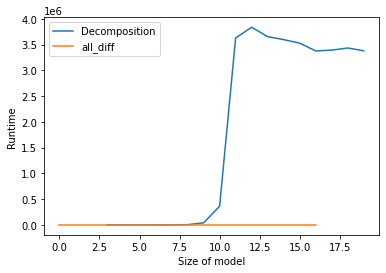

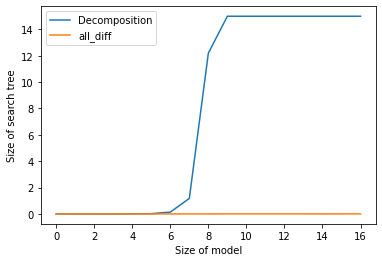

In [32]:
import matplotlib.pyplot as plt
import numpy as np
#x_axis = list(range(3,20))

#Runtime
plt.xlabel("Size of model")
plt.ylabel("Runtime")
plt.plot(list(range(3,20)),[i[0] for i in res], label='Decomposition')
plt.plot([i[0] for i in res_all_diff], label='all_diff')
plt.legend()
plt.show()

#Size of the search tree.*
plt.xlabel("Size of model")
plt.ylabel("Size of search tree")
plt.plot([i[1] for i in res], label='Decomposition')
plt.plot([i[1] for i in res_all_diff], label='all_diff')
plt.legend()
plt.show()

Using the model_alldiff(n), solve this problem for $n=  \{10, 100, 1000, 10000, 100000 \}$. Whar are the values of the runtime and the number of nodes? 

In [33]:
[run(model_using_alldiff(n), params) for n in [10, 100, 1000, 10000, 100000]]

<ipython-input-14-af4ffd06be00>:4(stream:23:1): Warning: The constraint is always false, the model is infeasible.
                                                           allDiff([x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9])
 ! --------------------------------------------------- CP Optimizer 22.1.0.0 --
 ! Satisfiability problem - 10 variables, 1 constraint
 ! Presolve             = Off
 ! TimeLimit            = 15
 ! Workers              = 1
 ! SearchType           = DepthFirst
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 31.7 (before), 31.7 (after)
 !  . Memory usage      : 267.3 kB (before), 267.3 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 ! ----------------------------------------------------------------------------
 ! Search completed, model has no solution.
 ! ----------------------

CpoSolverException: Solver error: Problem size limit exceeded.
CP Optimizer Community Edition solves problems with search spaces up to 2^1000.
Unrestricted version options (including academia) at https://ibm.co/2s0wqSa


What's your overall impression ? what did you learn today? 